# Projet 7 : Implémentez un modèle de scoring


# PARTIE 1 : Exploratory Data Analysis (EDA)

# 1. Lecture des données 

In [6]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

Il y a un total de 9 fichiers avec un fichier principal qui sert de jeu de données d'entraînement avec le target et un fichier test sans le target, 1 fichier contenant un exemple et 6 fichiers contenant des informations additionnelles sur le prêt.  

In [11]:
# Training data
app_train_csv = pd.read_csv(r"C:\Users\kherm\Documents\Openclassrooms\projet 7\application_train.csv")
print('Training data shape: ', app_train_csv.shape)
app_train=app_train_csv.copy()
app_train.head()

Training data shape:  (307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

Il y a 307511 observations pour chaque prêt séparé et 122 features incluant le TARGET (label que l'on souhaite prédire) Le target est 1 si l'individu est éligible pour le prêt, 0 sinon. 

In [12]:
# Testing data features
app_test_csv = pd.read_csv(r"C:\Users\kherm\Documents\Openclassrooms\projet 7\application_test.csv")
print('Testing data shape: ', app_test_csv.shape)
app_test=app_test_csv.copy()
app_test.head()

Testing data shape:  (48744, 121)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

Il y a 48744 observations et 121 variables. Il n'y a pas de TARGET. 

# 1. Étude de la variable TARGET

In [13]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

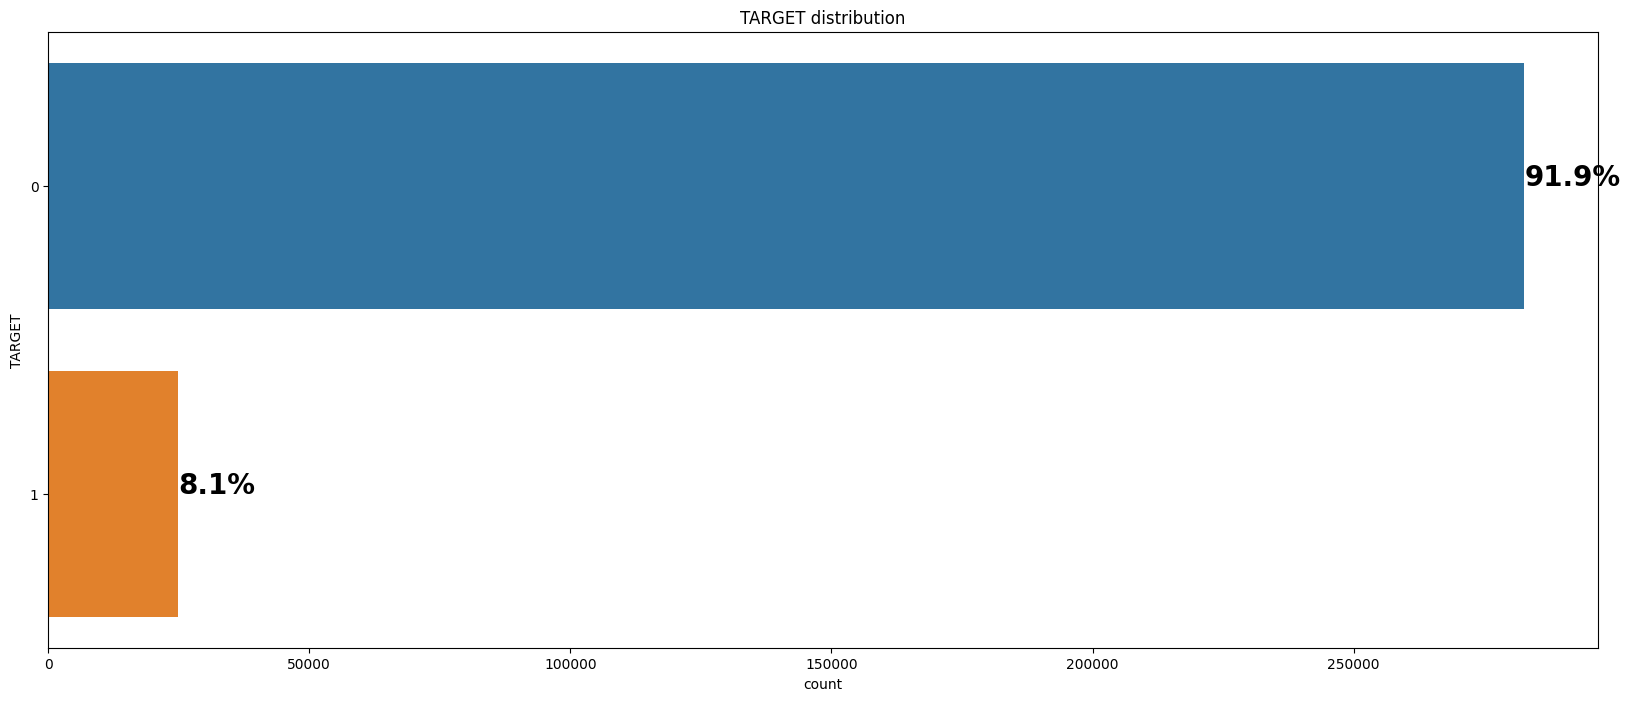

In [17]:
ax, fig = plt.subplots(figsize=(20,8)) 
ax = sns.countplot(y='TARGET', data=app_train)
ax.set_title("TARGET distribution")

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/len(app_train.TARGET))
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

On fait face à un jeu de données non-équilibré.  Il y a beaucoup plus de prêts remboursés à temps que de prêts non remboursés. Une fois que nous entrons dans des modèles d'apprentissage automatique plus sophistiqués, nous pouvons pondérer les classes par leur représentation dans les données pour refléter ce déséquilibre.

# 2. Étude des données manquantes

In [20]:
#Fonction pour résumer les données

def tableau_resume(data,nom,nom_id):
    #Création d'un tableau résumant les données 
    tableau_resume = pd.DataFrame(columns = ["Nombre lignes", "Nombre colonnes", "Taux remplissage moyen","Doublons"],index=[nom])
    
# Calcul du nombre de lignes dans chaque fichier
# La méthode .index() permet de calculer le nombre de lignes total pour chaque fichier
    tableau_resume["Nombre lignes"] = [
        len(data.index)
    ]
# Calcul du nombre de colonnes dans chaque fichier
# La méthode .columns() permet de calculer le nombre de colonnes total pour chaque fichier
    tableau_resume["Nombre colonnes"] = [
        len(data.columns)
    ]
# Fonction pour calculer le pourcentage de remplissage
    def pourcentage(x):
        return "{0:.01f}%".format(x * 100)
# Calcul du taux de remplissage moyen
# On identifie les valeurs avec méthode .notna()
# On utilise la méthode .mean() deux fois : uns fois pour calculer la moyenne de chaque colonne et une deuxième fois pour calculer la moyenne du fichier
    tableau_resume["Taux remplissage moyen"] = [
        pourcentage(data.notna().mean().mean())
    ]
# Calcul des doublons dans chaque fichier
# Les méthodes .duplicated() et .sum() permettent de retrouver les doublons et les sommer per fichier
    tableau_resume["Doublons"] = [
        data.duplicated(subset=[nom_id]).sum()
    ]
    return tableau_resume

In [21]:
# Fonction pour calculer le pourcentage de données manquantes avec classement en ordre décroissant 

def missing(data):
    products_dict = {}
    
    for col in data.columns:
        products_dict[col] = []
        products_dict[col].append(round((data[col].isnull().sum()/data.shape[0])*100,2))
        products_dict[col].append(data[col].isna().sum())
        
    return pd.DataFrame.from_dict(data=products_dict, orient="index", columns = ["Pourcentage Valeurs Manquantes", "Nombre de valeurs manquantes"]).sort_values(by="Pourcentage Valeurs Manquantes", ascending=False)


In [22]:
tableau_resume(app_train,"Fichier Train","SK_ID_CURR")

Nombre lignes  Nombre colonnes Taux remplissage moyen  Doublons
Fichier Train         307511              122                  75.6%         0

In [23]:
missing(app_train)

Pourcentage Valeurs Manquantes  \
COMMONAREA_MEDI                                    69.87   
COMMONAREA_AVG                                     69.87   
COMMONAREA_MODE                                    69.87   
NONLIVINGAPARTMENTS_MODE                           69.43   
NONLIVINGAPARTMENTS_AVG                            69.43   
...                                                  ...   
NAME_FAMILY_STATUS                                  0.00   
NAME_EDUCATION_TYPE                                 0.00   
NAME_INCOME_TYPE                                    0.00   
AMT_ANNUITY                                         0.00   
SK_ID_CURR                                          0.00   

                          Nombre de valeurs manquantes  
COMMONAREA_MEDI                                 214865  
COMMONAREA_AVG                                  214865  
COMMONAREA_MODE                                 214865  
NONLIVINGAPARTMENTS_MODE                        213514  
NONLIVINGAPARTMENTS_AVG                         213514  
...                                                ...  
NAME_FAMILY_STATUS                                   0  
NAME_EDUCATION_TYPE                                  0  
NAME_INCOME_TYPE                                     0  
AMT_ANNUITY                                         12  
SK_ID_CURR                                           0  

[122 rows x 2 columns]

Les valeurs manquantes sont plus présentes dans les caractéristiques des habitats : 

In [24]:
def nan_check(data):
    '''Check Missing Values'''
    total = data.isnull().sum()
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 2))
    missing_data = pd.concat([total, percent_2], 
                             axis=1, keys=['Total', '%']).sort_values('%', ascending=False)
    return missing_data

print('TOP 10 Missing values from Training dataset')
nan_check(app_train)[:10]

TOP 10 Missing values from Training dataset


Total      %
COMMONAREA_MEDI           214865  69.87
COMMONAREA_AVG            214865  69.87
COMMONAREA_MODE           214865  69.87
NONLIVINGAPARTMENTS_MODE  213514  69.43
NONLIVINGAPARTMENTS_AVG   213514  69.43
NONLIVINGAPARTMENTS_MEDI  213514  69.43
FONDKAPREMONT_MODE        210295  68.39
LIVINGAPARTMENTS_MODE     210199  68.35
LIVINGAPARTMENTS_AVG      210199  68.35
LIVINGAPARTMENTS_MEDI     210199  68.35

In [27]:
print("Nb of columns in the training sample: " + str(len(nan_check(app_train))))

print("Nb of columns in the training sample with missing values: " + 
      str(len(nan_check(app_train)[nan_check(app_train)['Total']!=0])))

Nb of columns in the training sample: 122
Nb of columns in the training sample with missing values: 67


# 3. Outilers, valeurs anormales ou atypiques

## 3.1. Birth

In [29]:
#Client's age in days at the time of application (def. from HomeCredit_columns_description.csv)
app_train['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Les nombres de la colonne DAYS_BIRTH sont négatifs car ils sont enregistrés par rapport à la demande de prêt en cours. Il est nécessaire de modifier cette variable pour obtenir des chiffres plus compréhensibles pour l'analyse.

In [30]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Text(0.5, 1.0, 'Age of client')

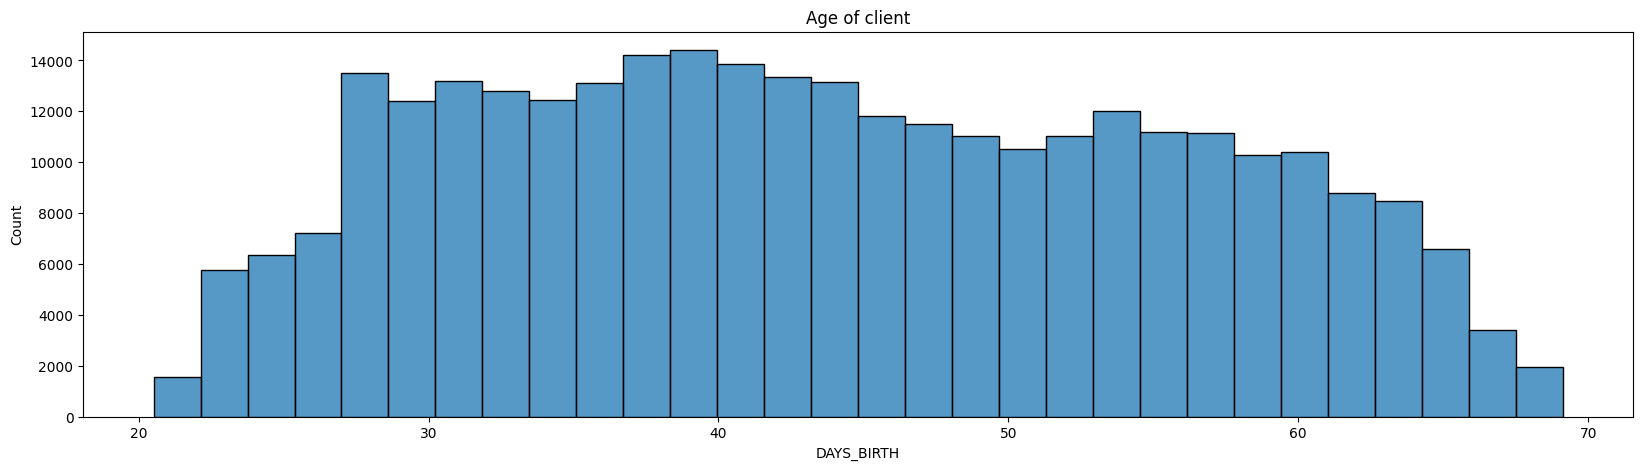

In [32]:
plt.figure(figsize=(20, 5))
sns.histplot((app_train['DAYS_BIRTH'] / -365), bins = 30).set_title('Age of client')


## 3.2. Employment 

Text(0.5, 0, 'Days Employment')

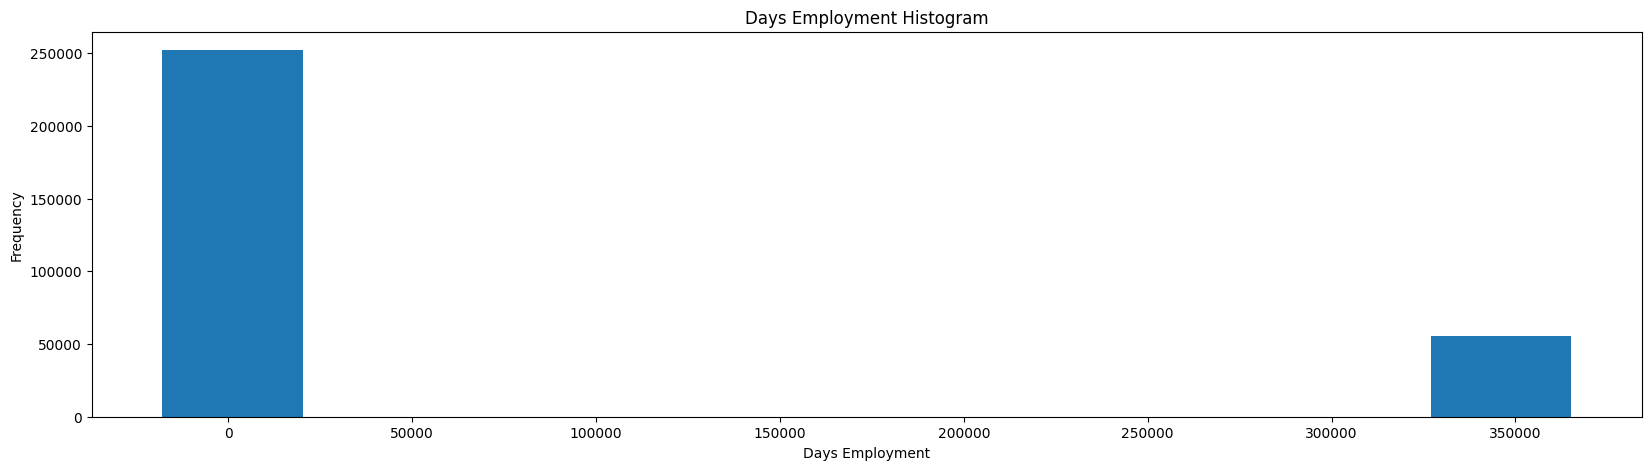

In [34]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram', figsize=(20,5));
plt.xlabel('Days Employment')

Ces données ne sont pas "normales" au sens où le Max. représente 1000 années (365243/365j). 

In [35]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Il s'avère que les anomalies ont un taux de défaut plus faible.

La gestion des anomalies dépend de la situation exacte, sans règles définies. L'une des approches les plus sûres consiste simplement à définir les anomalies sur une valeur manquante, puis à les faire remplir (à l'aide de l'imputation) avant l'apprentissage automatique. Dans ce cas, puisque toutes les anomalies ont exactement la même valeur, nous voulons les remplir avec la même valeur au cas où tous ces prêts auraient quelque chose en commun. Les valeurs anormales semblent avoir une certaine importance, nous voulons donc dire au modèle d'apprentissage automatique si nous avons effectivement rempli ces valeurs. Comme solution, nous allons remplir les valeurs anormales sans un nombre (np.nan) puis créer une nouvelle colonne booléenne indiquant si la valeur était anormale ou non.
Tout ce que nous faisons avec les données d'entraînement, nous devons également le faire avec les données de test. Assurons-nous de créer la nouvelle colonne et de remplir la colonne existante avec np.nan dans les données de test.

In [37]:
#Create an outliers flag column
app_train['DAYS_EMPLOYED_OUTLIERS'] = app_train["DAYS_EMPLOYED"] == 365243
app_test['DAYS_EMPLOYED_OUTLIERS'] = app_test["DAYS_EMPLOYED"] == 365243

#Replace outliers values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

Text(0.5, 0, 'Days Employment')

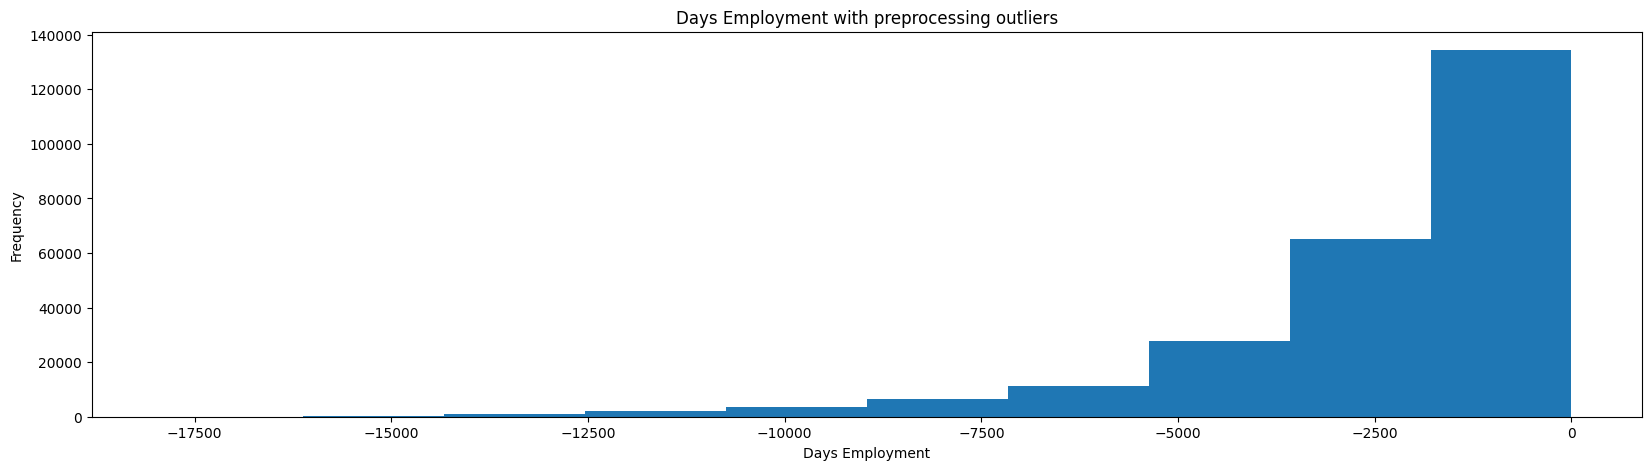

In [38]:
app_train['DAYS_EMPLOYED'].plot.hist(title ='Days Employment with preprocessing outliers', figsize=(20,5))
plt.xlabel('Days Employment')

La distribution semble être beaucoup plus conforme à ce à quoi nous nous attendions, et nous avons également créé une nouvelle colonne pour indiquer au modèle que ces valeurs étaient à l'origine anormales (car nous devrons remplir les nans avec une certaine valeur, probablement la médiane de la colonne). Les autres colonnes avec DAYS dans la base de données semblent correspondre à ce que nous attendons sans valeurs aberrantes évidentes.

### Fonctions principales pour faciliter l'analyse des autres variables 

In [43]:
def plot_stat(data, feature, title) : 
    
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.countplot(y=feature, data=data, order=data[feature].value_counts(ascending=False).index)
    ax.set_title(title)

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width()/len(data[feature]))
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

    

In [45]:
def plot_percent_target1(data, feature, title) : 
    
    cat_perc = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    ax, fig = plt.subplots(figsize=(20,8)) 
    ax = sns.barplot(y=feature, x='TARGET', data=cat_perc)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel("Percent of target with value 1")

    for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width())
                x = p.get_x() + p.get_width()
                y = p.get_y() + p.get_height()/2
                ax.annotate(percentage, (x, y), fontsize=20, fontweight='bold')

   

## 3.3 Type de Contrat 

                                   -------------------------------------------------------


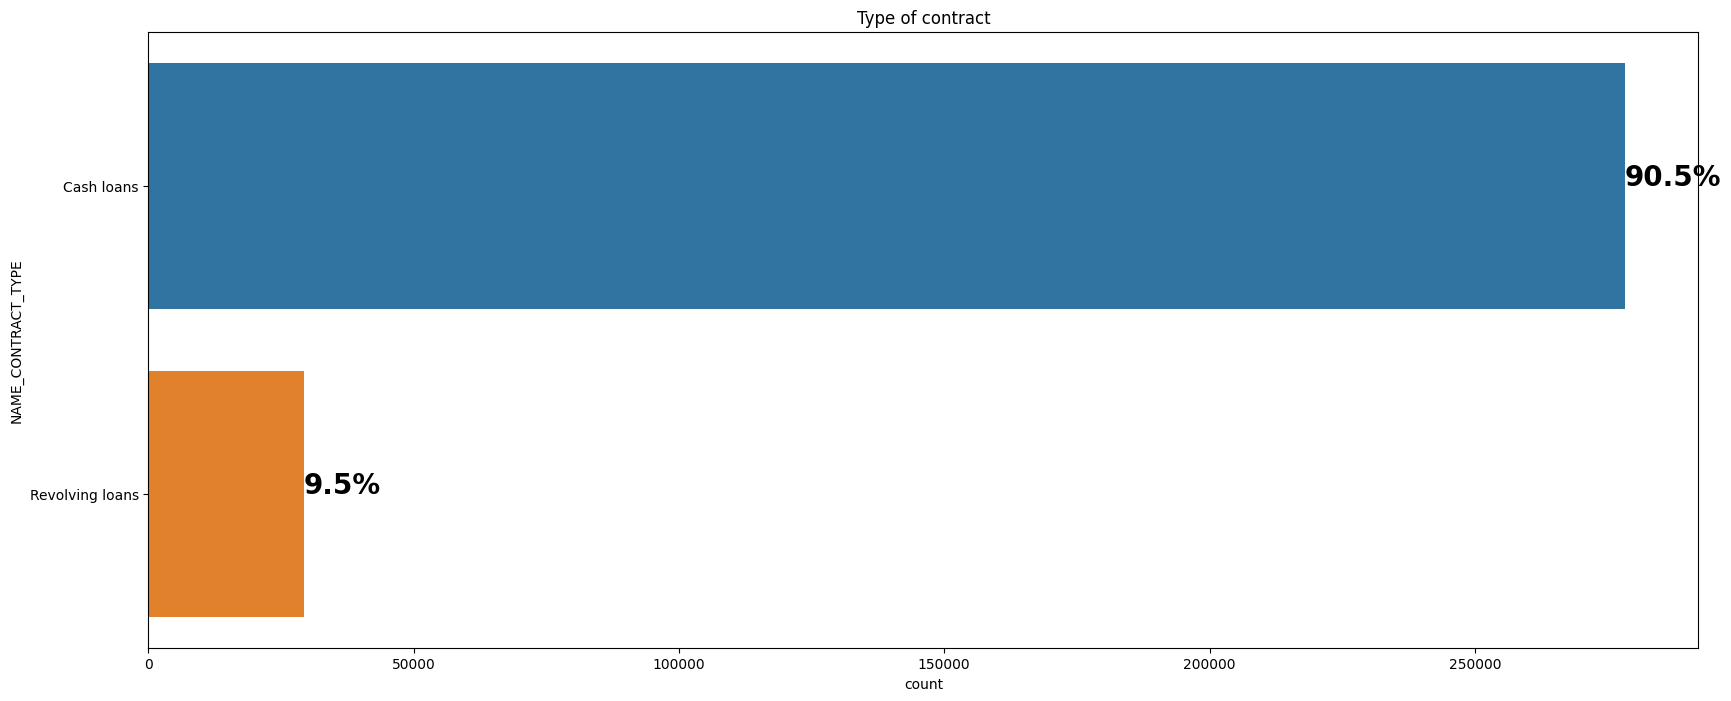

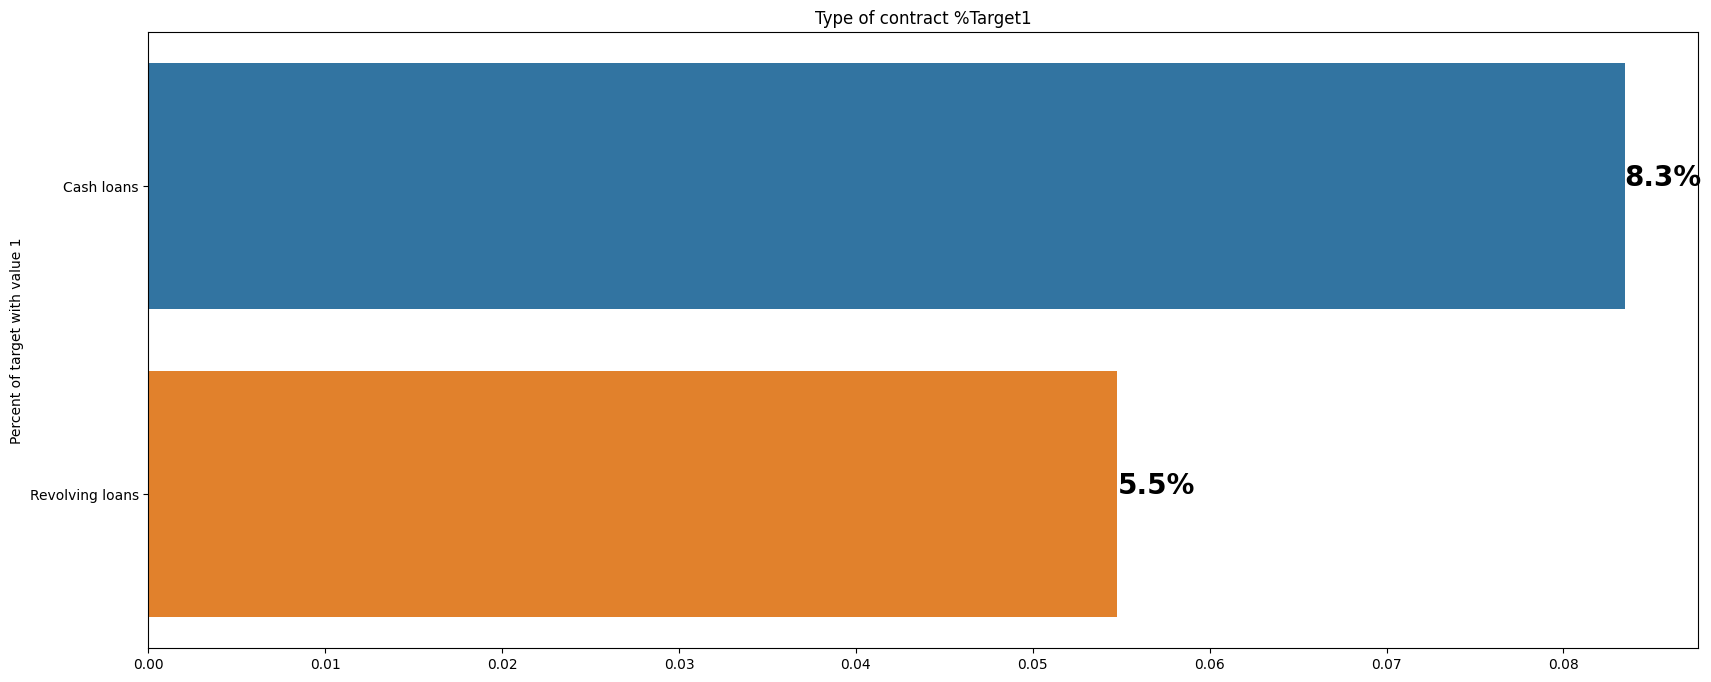

In [46]:
#NAME_CONTRACT_TYPE
plot_stat(app_train, 'NAME_CONTRACT_TYPE',"Type of contract")
print("                                   -------------------------------------------------------")
plot_percent_target1(app_train, 'NAME_CONTRACT_TYPE',"Type of contract %Target1")

Les prêts renouvelables ne représentent qu'une petite fraction (10%) du nombre total de prêts; dans le même temps, un plus grand nombre de crédits renouvelables, par rapport à leur fréquence, ne sont pas remboursés.

## 3.4. Genre

                                   -------------------------------------------------------


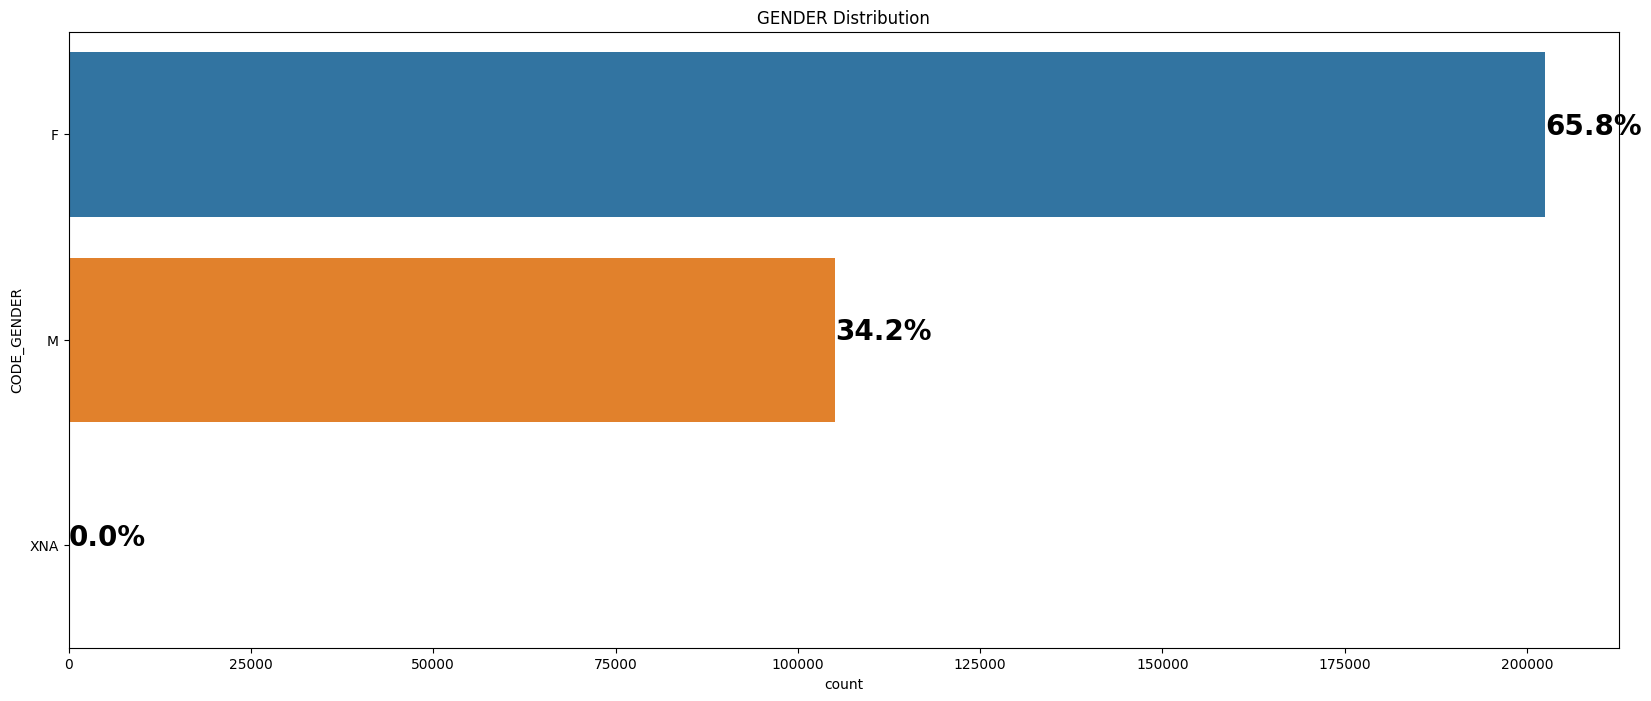

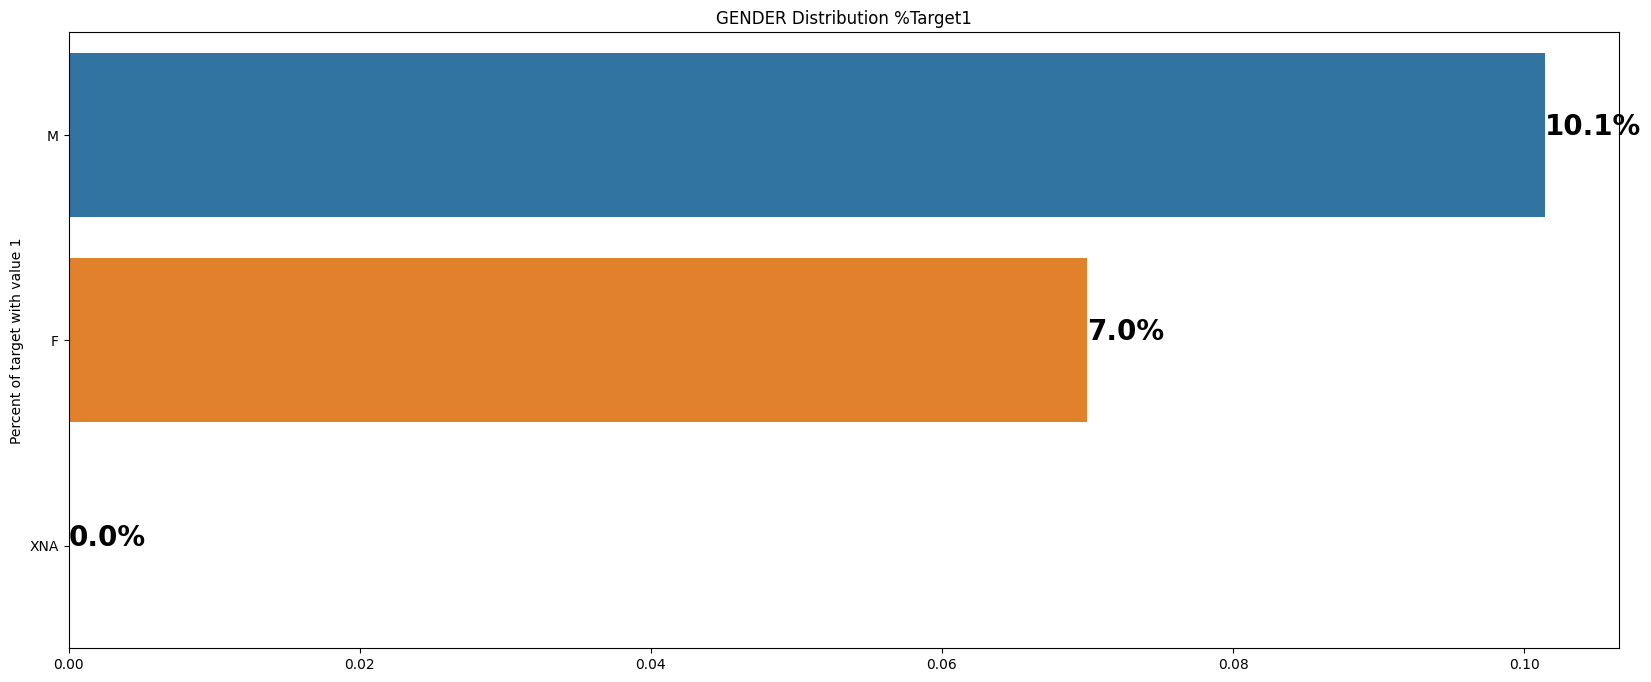

In [48]:
#CODE_GENDER
plot_stat(app_train, 'CODE_GENDER',"GENDER Distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(app_train, 'CODE_GENDER',"GENDER Distribution %Target1")

Le nombre de clients féminins est presque le double du nombre de clients masculins. En ce qui concerne le pourcentage de crédits en souffrance, les hommes ont plus de chances de ne pas rembourser leurs prêts (10%), comparativement aux femmes (7%).

## 3.5. Possession d'une voiture

                                   -------------------------------------------------------


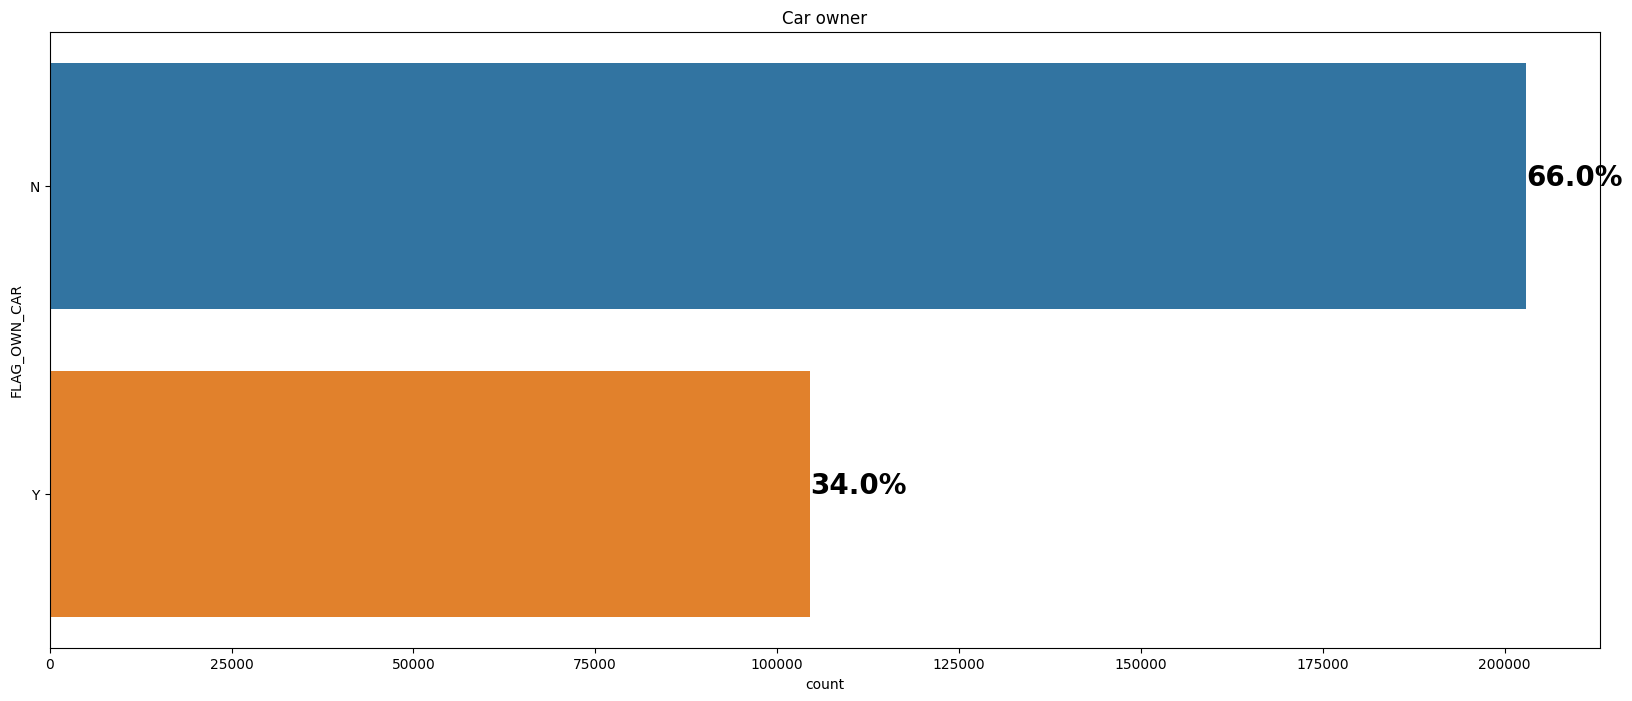

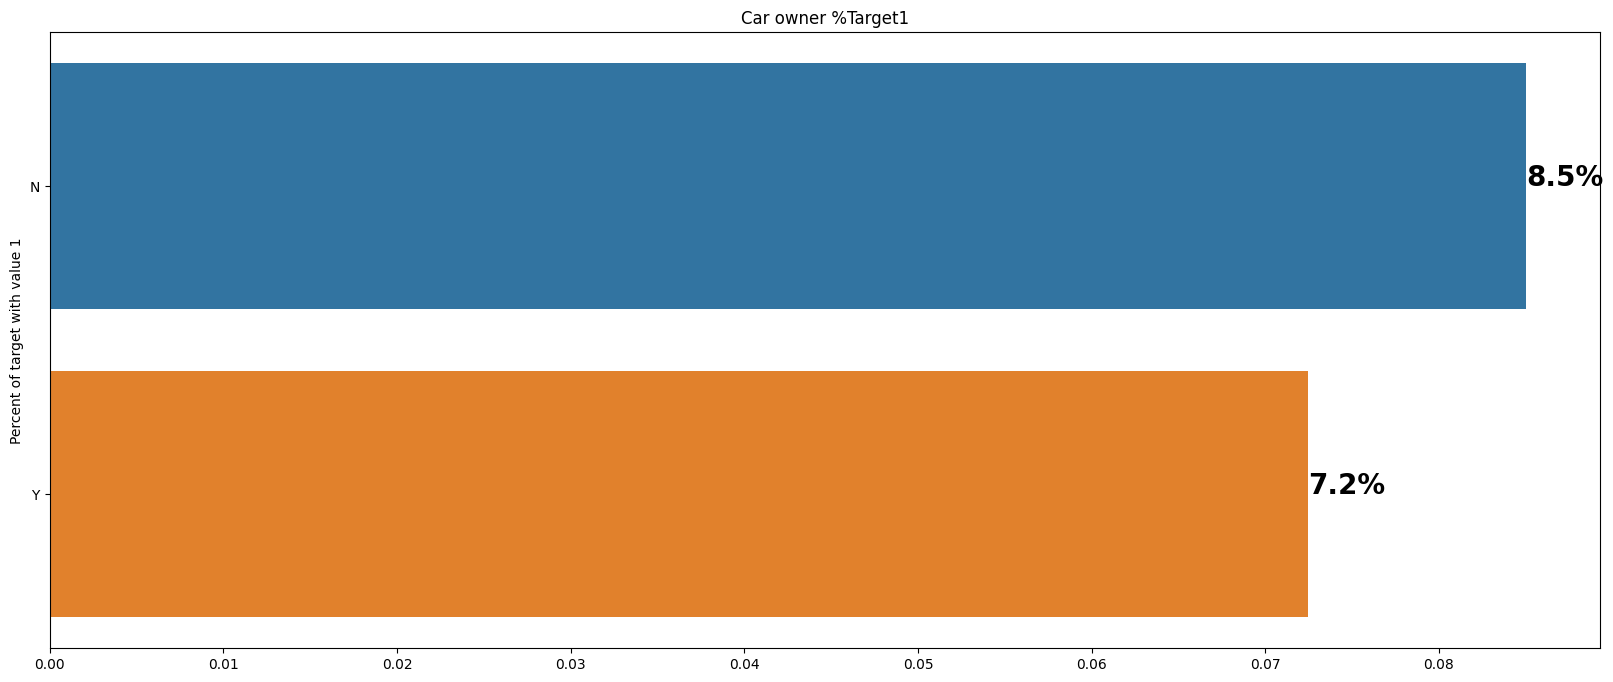

In [49]:
#FLAG_OWN_CAR
plot_stat(app_train, 'FLAG_OWN_CAR',"Car owner")
print("                                   -------------------------------------------------------")
plot_percent_target1(app_train, 'FLAG_OWN_CAR',"Car owner %Target1")

Les deux catégories (propriétaire ou non) ont des taux de non-remboursement d'environ 8%.

## 3.5. Statut Familiale

                                   -------------------------------------------------------


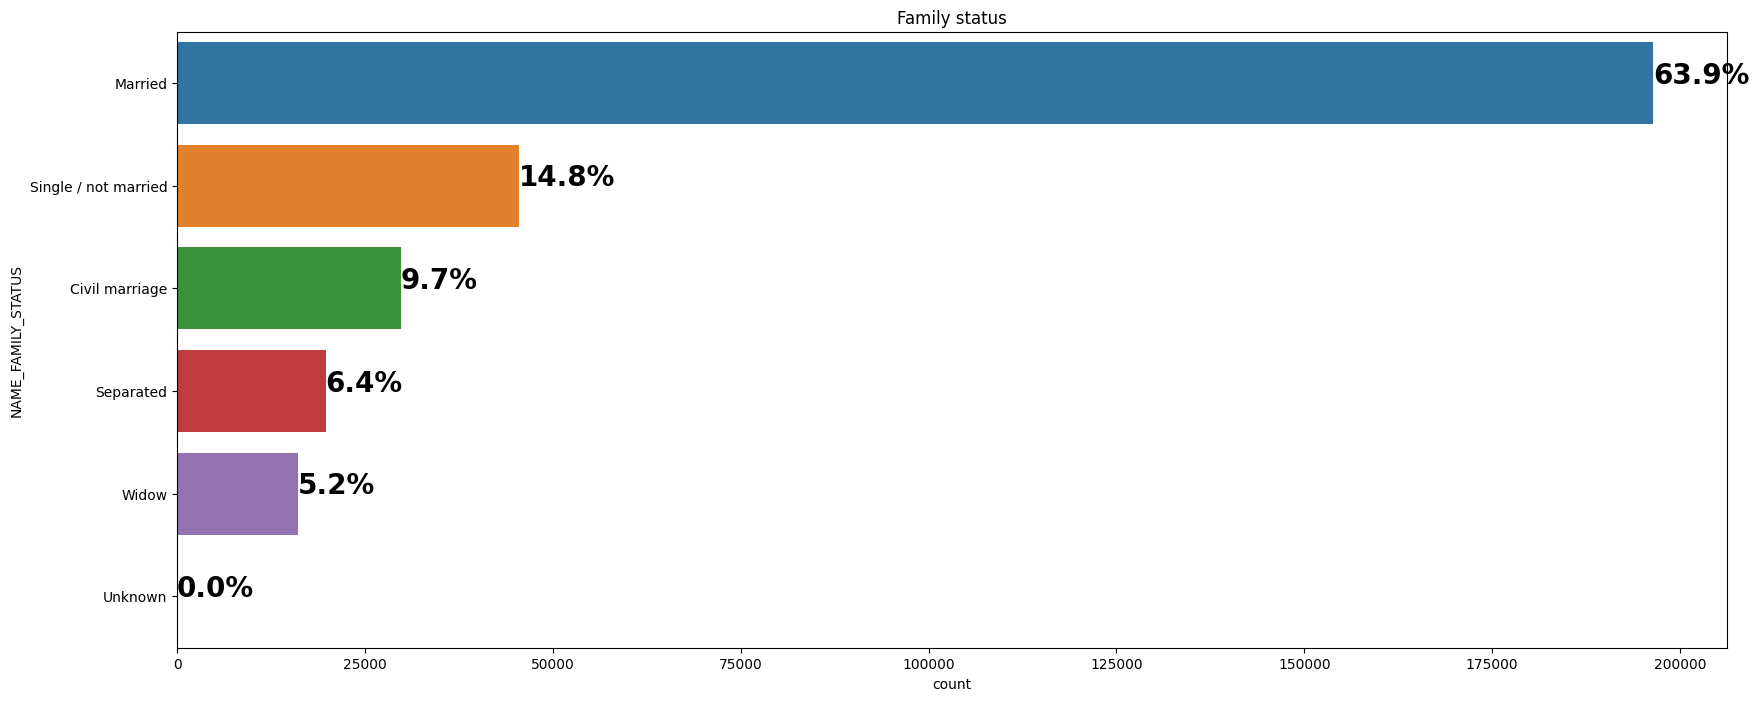

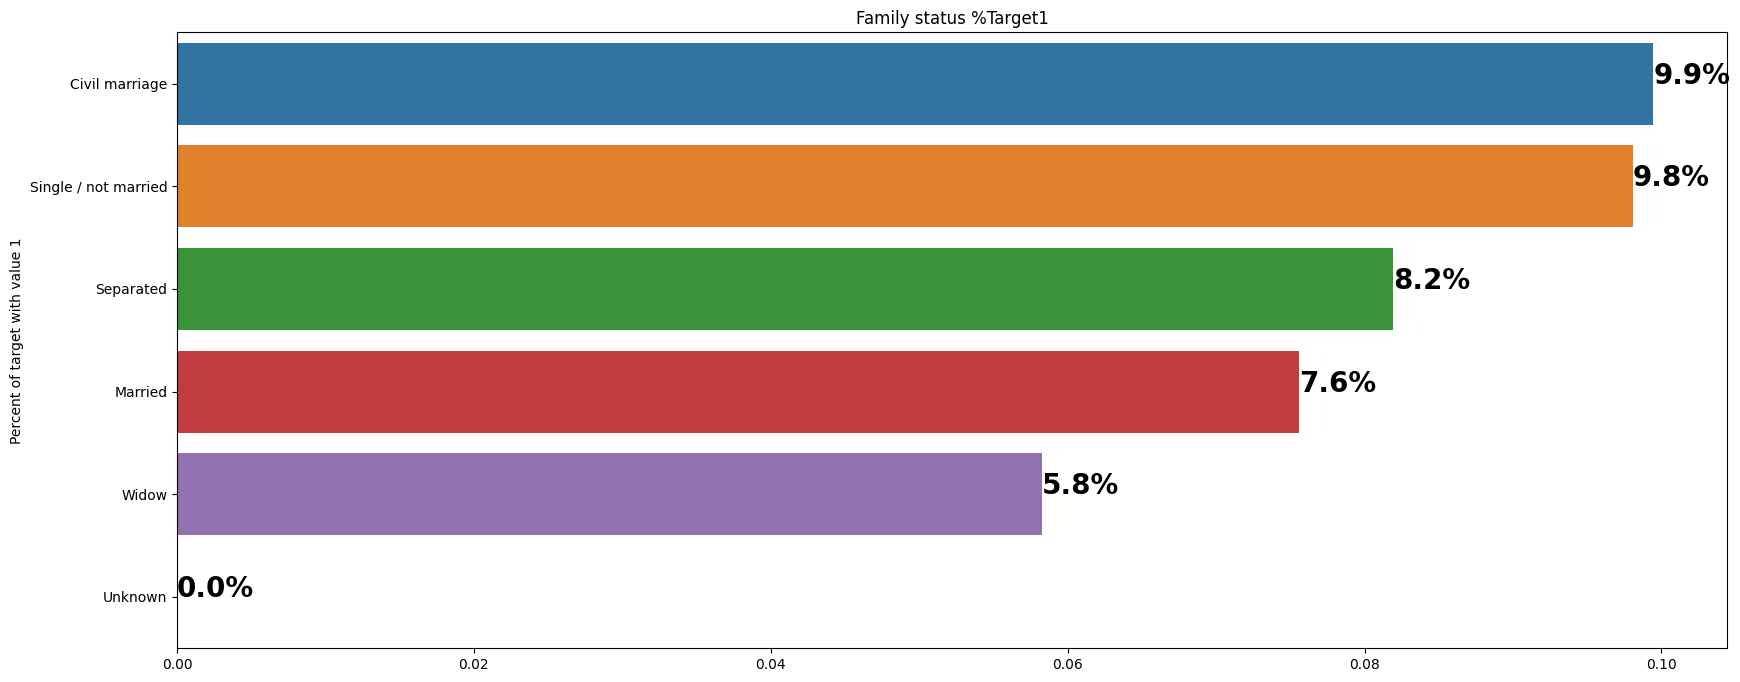

In [50]:
#NAME_FAMILY_STATUS
plot_stat(app_train, 'NAME_FAMILY_STATUS',"Family status")
print("                                   -------------------------------------------------------")
plot_percent_target1(app_train, 'NAME_FAMILY_STATUS',"Family status %Target1")

La plupart des clients sont mariés, suivis des célibataires / non mariés et des mariages civils.

En termes de pourcentage de non-remboursement du prêt, le mariage civil a le pourcentage le plus élevé de non-remboursement (10%), la veuve étant le plus bas (à l'exception de l'inconnu).

## 3.6. Type de salaire

                                   -------------------------------------------------------


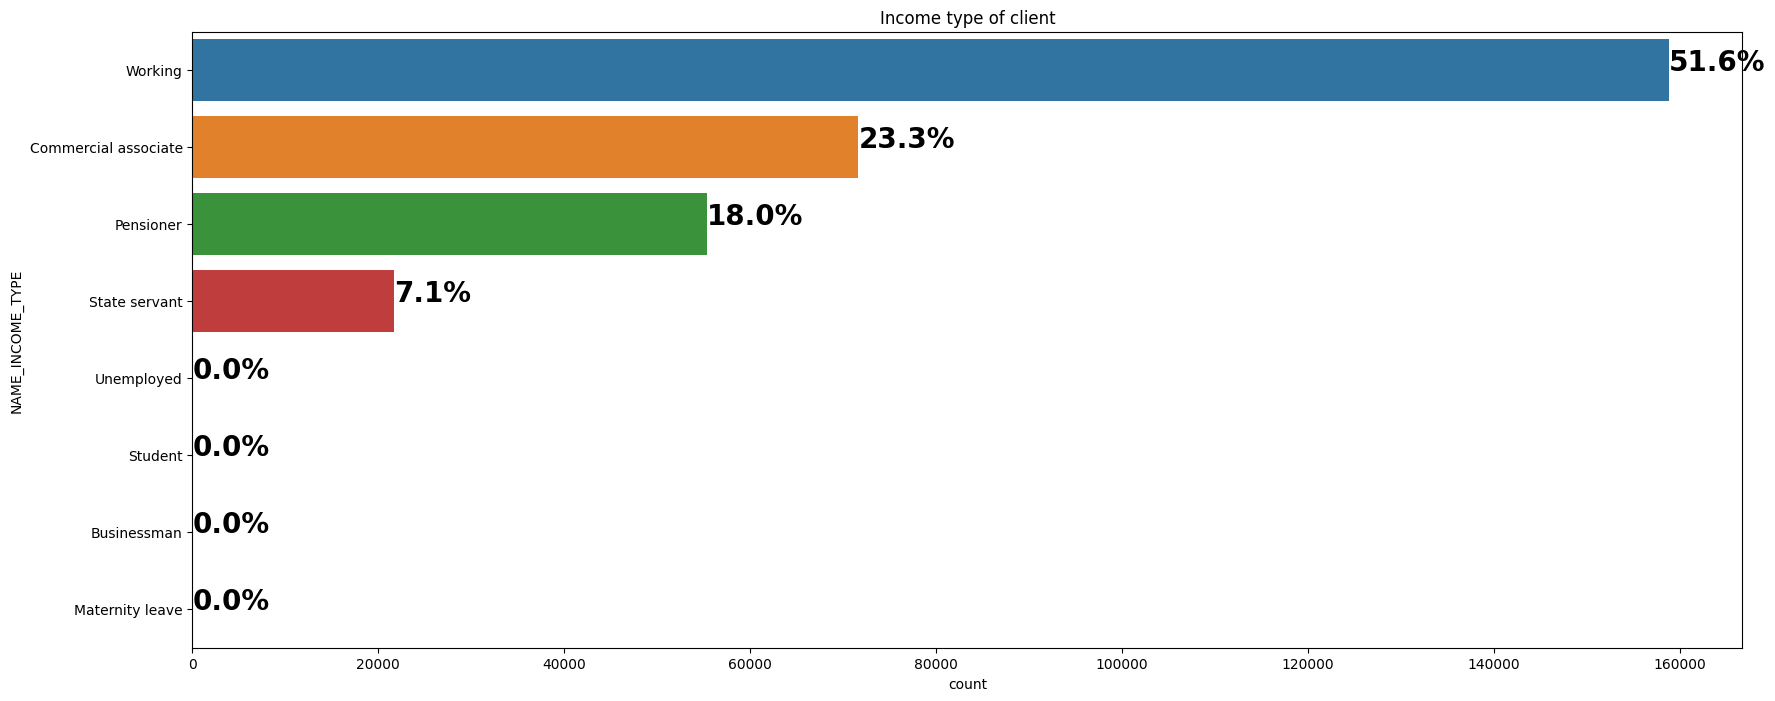

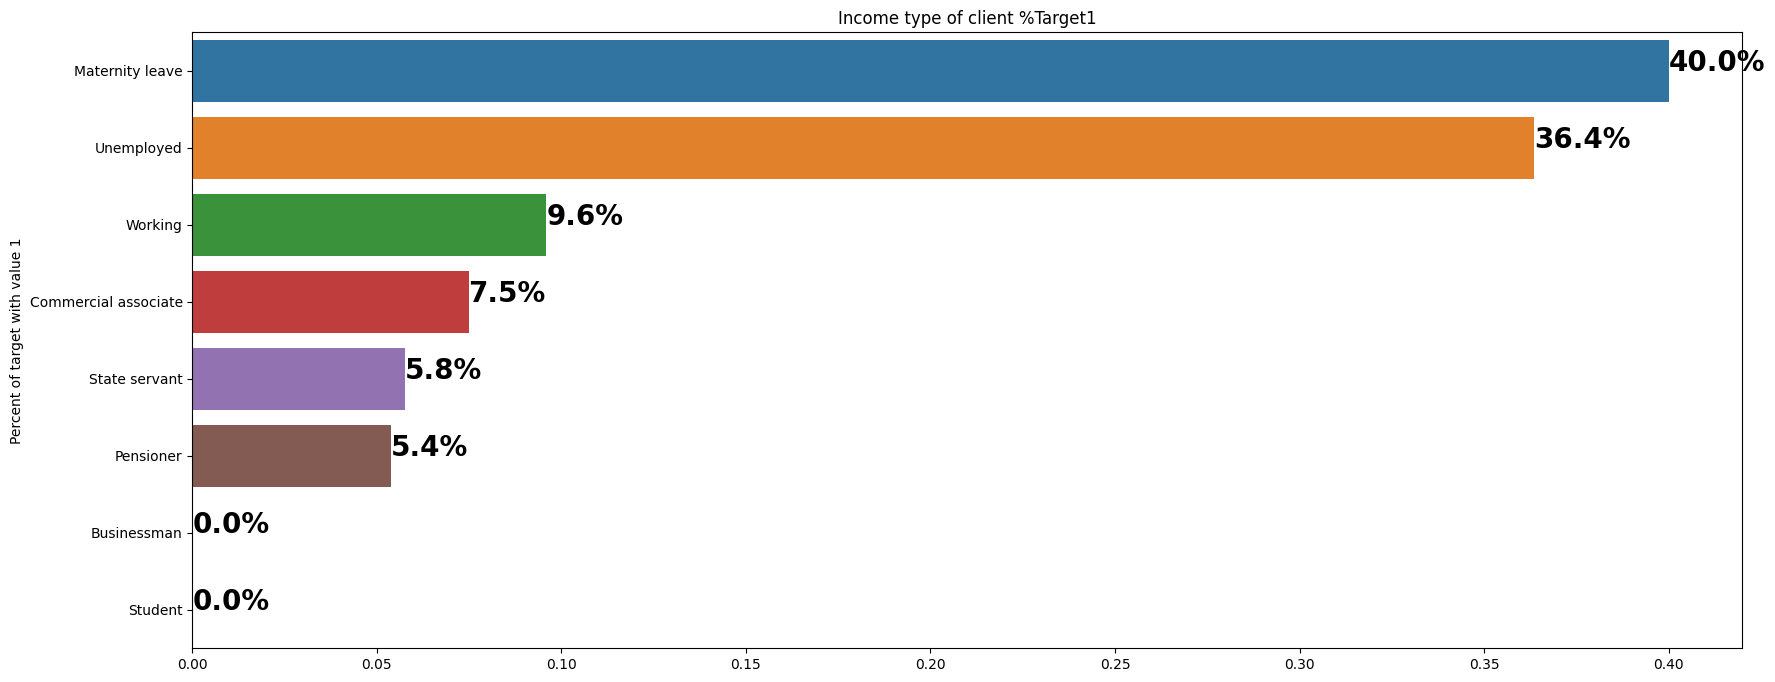

In [51]:
#NAME_INCOME_TYPE
plot_stat(app_train, 'NAME_INCOME_TYPE',"Income type of client")
print("                                   -------------------------------------------------------")
plot_percent_target1(app_train, 'NAME_INCOME_TYPE',"Income type of client %Target1")

La plupart des demandeurs de prêts sont des revenus du travail, suivis par un associé commercial, un retraité et un fonctionnaire.

Les demandeurs avec le type de revenu Congé de maternité ont un ratio de près de 40% de prêts non remboursés, suivis des chômeurs (37%). Les autres types de revenus sont inférieurs à la moyenne de 10% pour ne pas rembourser les prêts.

## 3.7. Type de travail du client

                                   -------------------------------------------------------


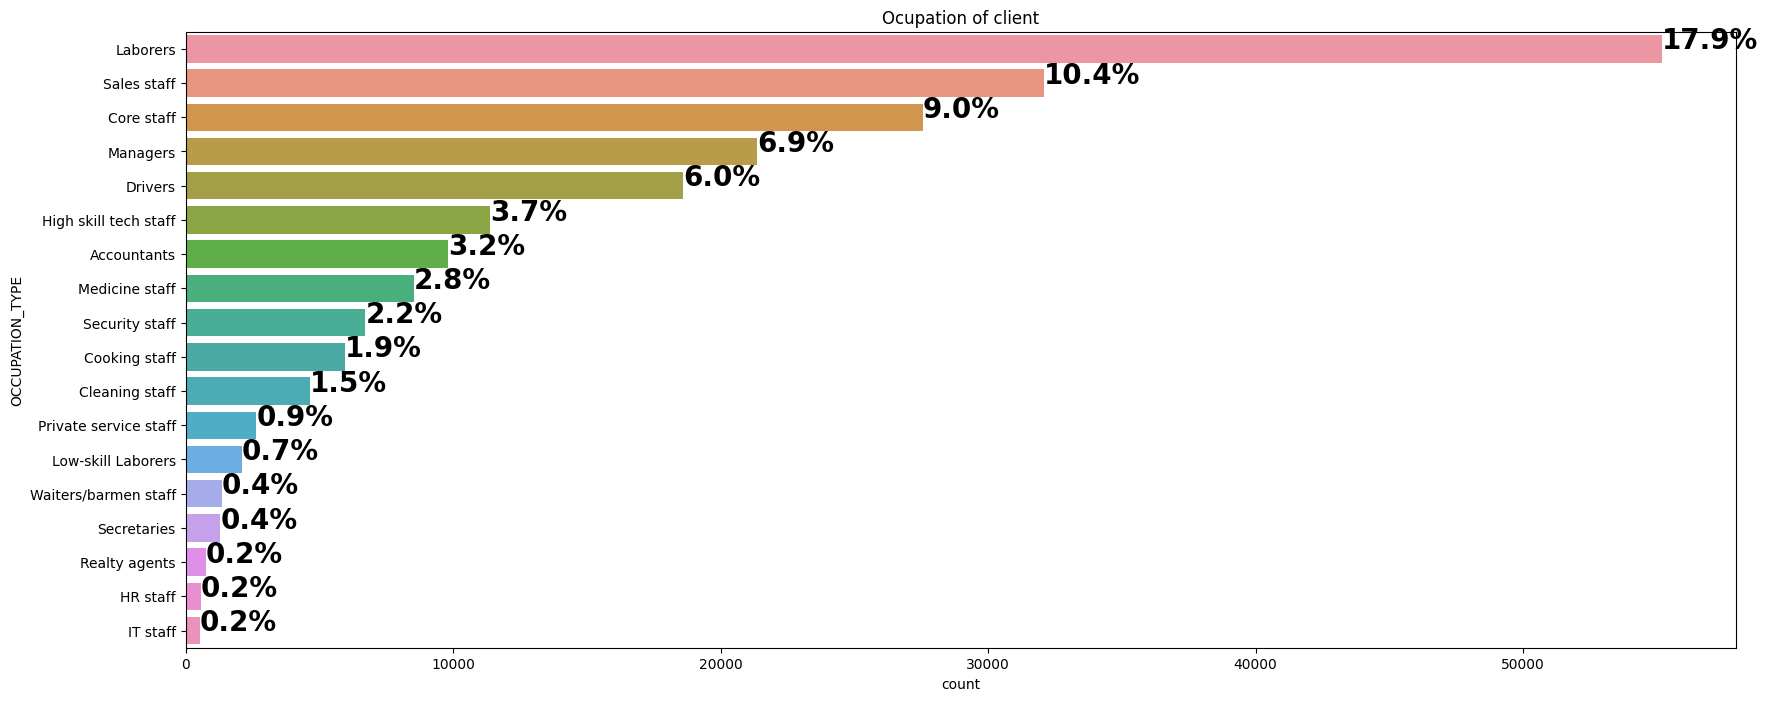

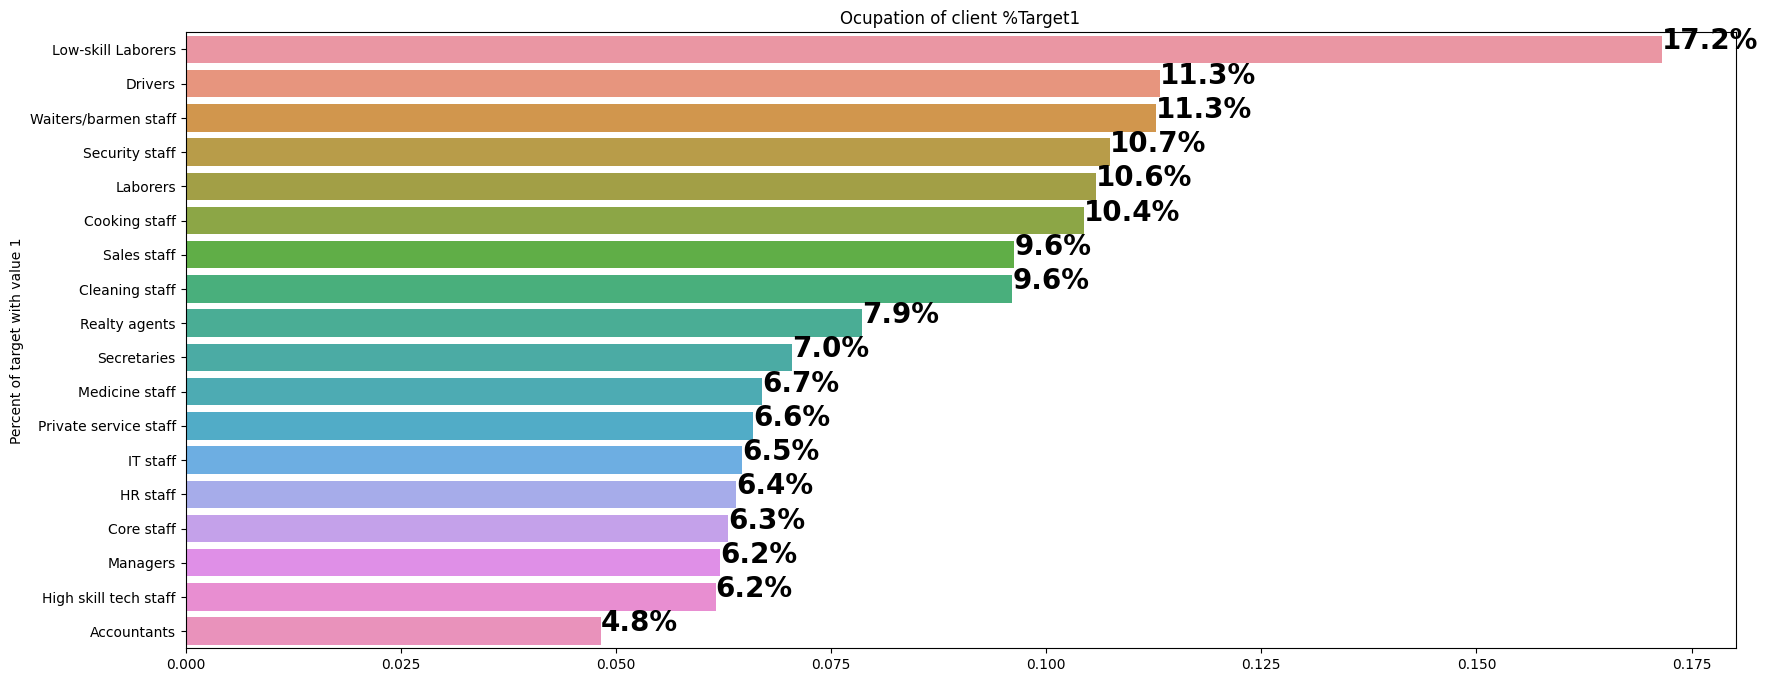

In [52]:
#OCCUPATION_TYPE
plot_stat(app_train, 'OCCUPATION_TYPE',"Ocupation of client")
print("                                   -------------------------------------------------------")
plot_percent_target1(app_train, 'OCCUPATION_TYPE',"Ocupation of client %Target1")

La plupart des prêts sont contractés par des ouvriers, suivis par les vendeurs/commerciaux. Le personnel informatique prend le montant de prêts le plus bas.

La catégorie avec le pourcentage le plus élevé de prêts non remboursés est celle des ouvriers peu qualifiés (plus de 17%), suivis des chauffeurs et des serveurs / barmen, du personnel de sécurité, des ouvriers et du personnel de cuisine.

## 3.8. Niveau d'éducation

                                   -------------------------------------------------------


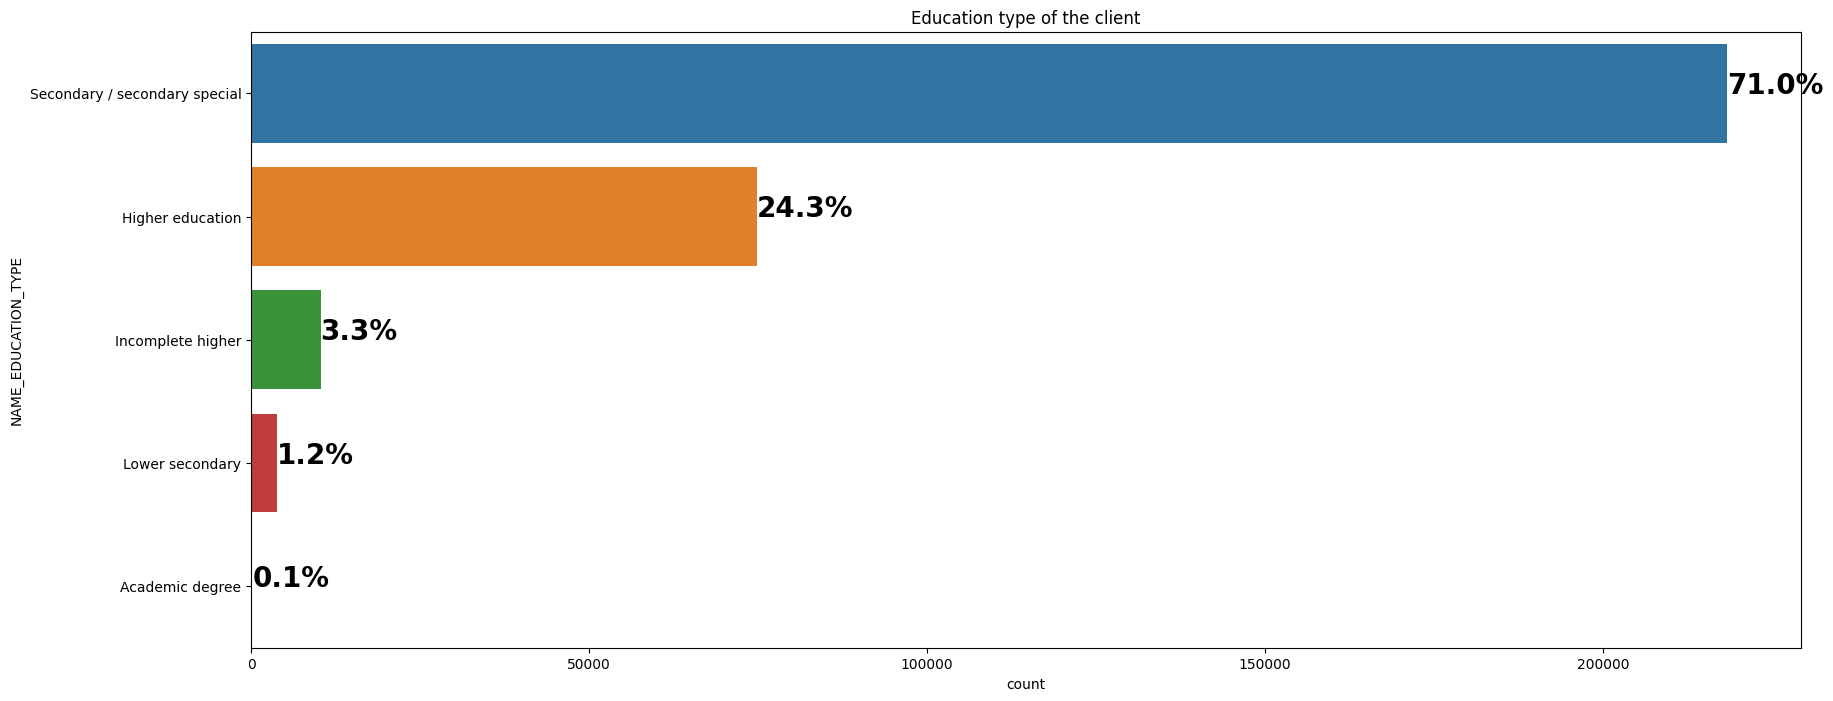

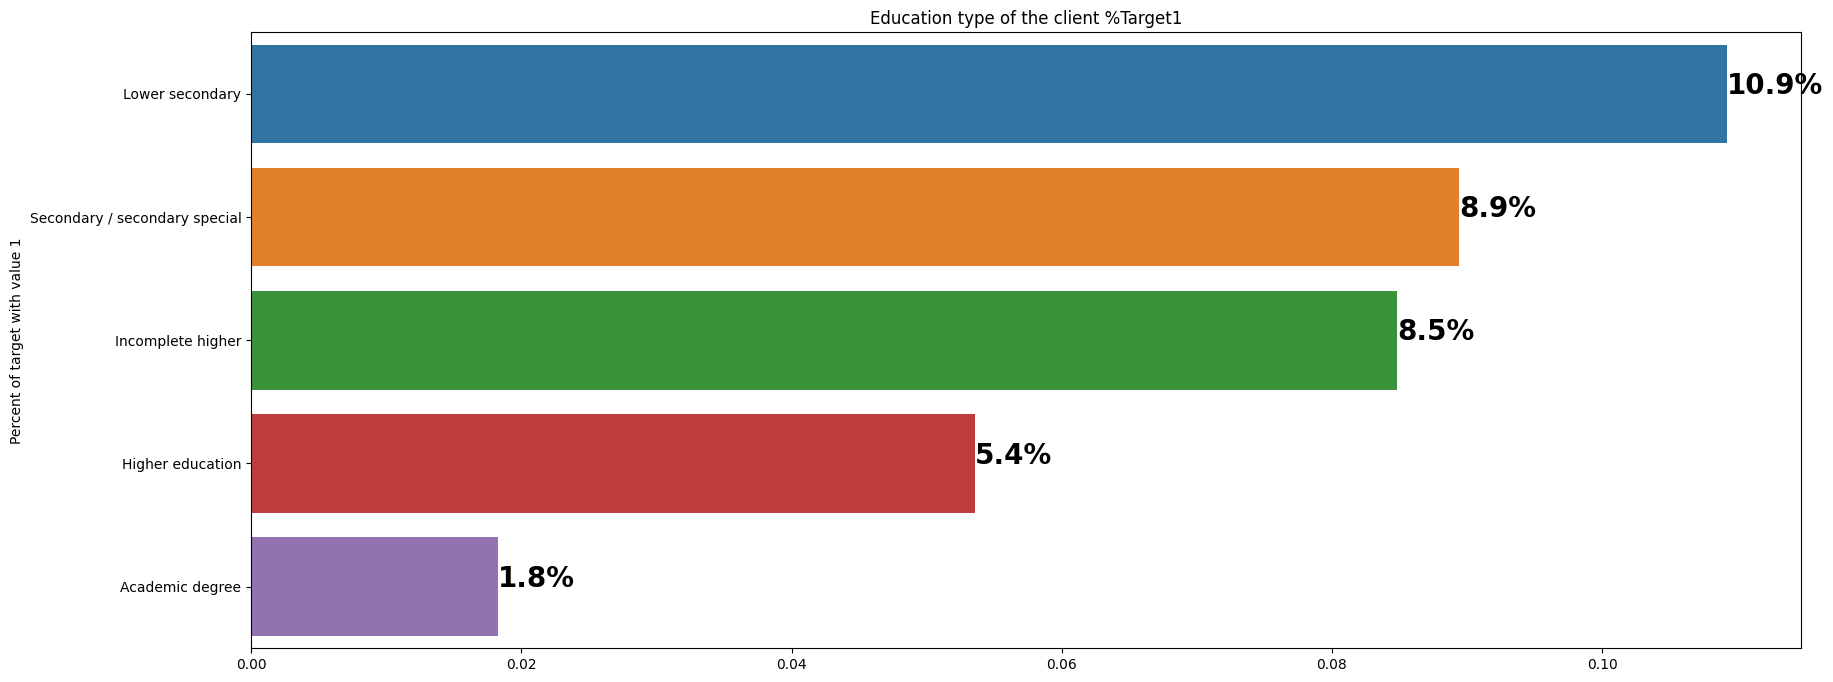

In [53]:
#NAME_EDUCATION_TYPE
plot_stat(app_train, 'NAME_EDUCATION_TYPE',"Education type of the client")
print("                                   -------------------------------------------------------")
plot_percent_target1(app_train, 'NAME_EDUCATION_TYPE',"Education type of the client %Target1")


La majorité des clients ont une éducation dans l'éducation secondaire, suivis des clients avec une éducation supérieure. Un très petit nombre d'emprunteur possède un diplôme universitaire.

La catégorie du premier cycle du secondaire, bien que rare, a le taux le plus élevé de non-remboursement du prêt (11%). Les personnes ayant un diplôme universitaire ont un taux de non-remboursement inférieur à 2%.

## 3.9. Type d'habitation 

                                   -------------------------------------------------------


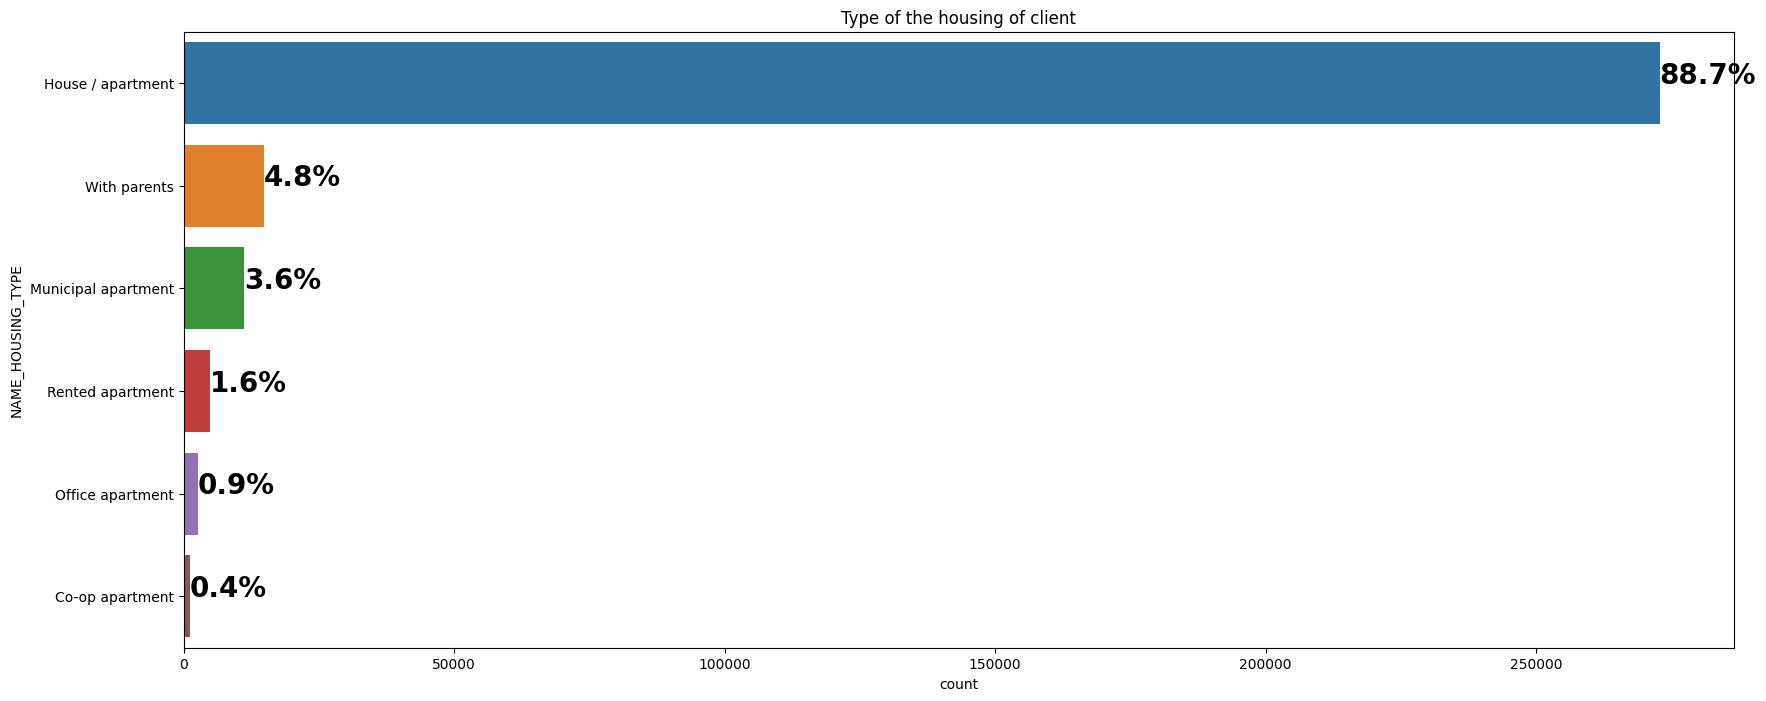

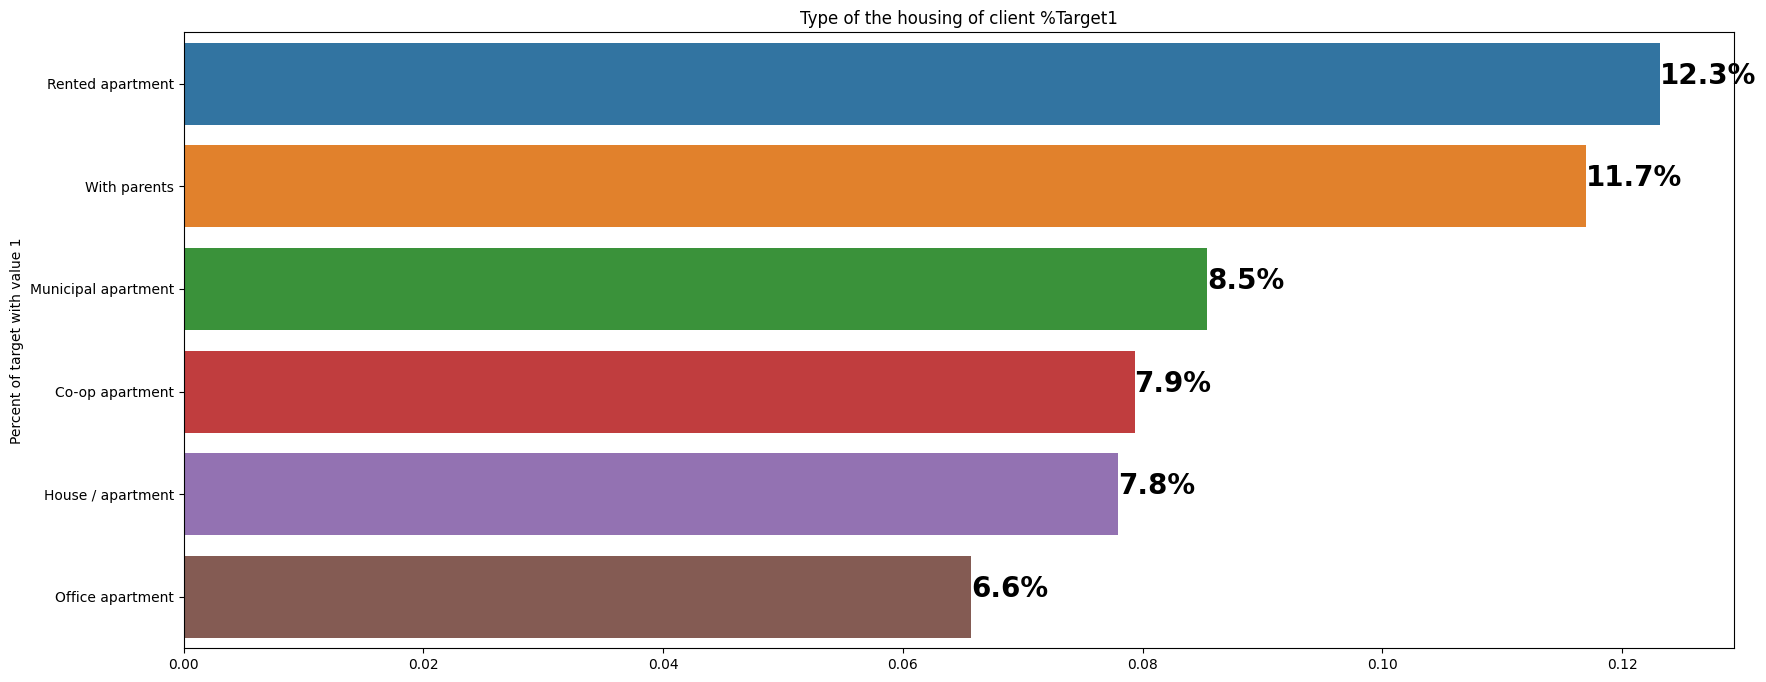

In [54]:
#NAME_HOUSING_TYPE
plot_stat(app_train, 'NAME_HOUSING_TYPE',"Type of the housing of client")
print("                                   -------------------------------------------------------")
plot_percent_target1(app_train, 'NAME_HOUSING_TYPE',"Type of the housing of client %Target1")

Plus de 250 000 demandeurs de crédits vivent en maison ou appartement. Les catégories suivantes, faible pourcentage, représentent une population moins "indépendante" (vivre chez ses parents, etc…).

Dans ces catégories, les loueurs d'appartements (non propriétaires de leur résidence principale), ainsi que ceux qui vivent chez leurs parents, ont un taux de non-remboursement supérieur à 10%.

# 4. Étude des corrélations 

Le coefficient de corrélation n'est pas la meilleure méthode pour représenter la "pertinence" d'une caractéristique, mais il nous donne une idée des relations possibles au sein des données. Voici quelques interprétations générales de la valeur absolue du coefficient de corrélation :

- .00-.19 "très faible"
- .20-.39 "faible"
- .40-.59 "modéré"
- .60-.79 "fort"
- .80-1.0 "très fort"

In [57]:
## Keep numerical columns only 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_app_train = app_train.select_dtypes(include=numerics)

In [58]:
#Display correlations
print('Most Positive Correlations:\n', num_app_train.corr()['TARGET'].sort_values().tail(15))
print("--------------------------")
print('Most Negative Correlations:\n', num_app_train.corr()['TARGET'].sort_values().head(15))

Most Positive Correlations:
 DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
--------------------------
Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULA

Examinons quelques-unes des corrélations les plus significatives : DAYS_BIRTH est la corrélation la plus positive. (sauf pour TARGET car la corrélation d'une variable avec elle-même est toujours 1 !) En regardant la documentation, DAYS_BIRTH est l'âge en jours du client au moment du prêt en jours négatifs (quelle qu'en soit la raison !). La corrélation est positive, mais la valeur de cette caractéristique est en fait négative, ce qui signifie qu'à mesure que le client vieillit, il est moins susceptible de faire défaut sur son prêt (c'est-à-dire la cible == 0). C'est un peu déroutant, nous prendrons donc la valeur absolue de la caractéristique, puis la corrélation sera négative.

###  L'effet de l'âge sur le renboursement

In [59]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982709

À mesure que le client vieillit, il existe une relation linéaire négative avec la cible, ce qui signifie qu'à mesure que les clients vieillissent, ils ont tendance à rembourser leurs prêts à temps plus souvent.

Commençons à regarder cette variable. Tout d'abord, nous pouvons faire un histogramme de l'âge. Nous mettrons l'axe des x en années pour rendre l'intrigue un peu plus compréhensible.

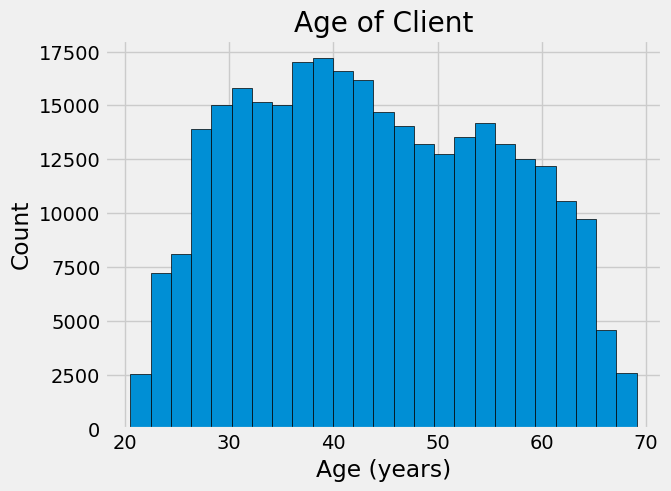

In [60]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

En soi, la distribution de l'âge ne nous dit pas grand-chose d'autre que le fait qu'il n'y a pas de valeurs aberrantes car tous les âges sont raisonnables. Pour visualiser l'effet de l'âge sur la cible, nous allons ensuite créer un graphique d'estimation de la densité du noyau (KDE) coloré par la valeur de la cible. Un diagramme d'estimation de la densité du noyau montre la distribution d'une seule variable et peut être considéré comme un histogramme lissé (il est créé en calculant un noyau, généralement un gaussien, à chaque point de données, puis en faisant la moyenne de tous les noyaux individuels pour développer un seul noyau lisse. courbe). Nous utiliserons le Seaborn kdeplot pour ce graphique.

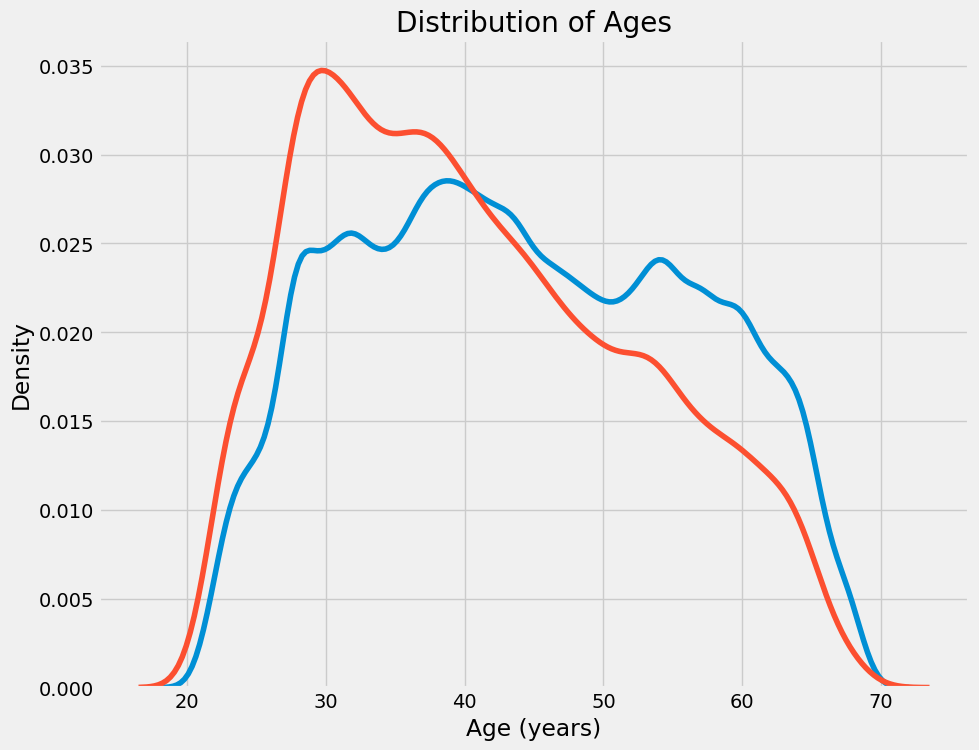

In [61]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

La courbe cible == 1 s'incline vers l'extrémité la plus jeune de la plage. Bien qu'il ne s'agisse pas d'une corrélation significative (coefficient de corrélation de -0,07), cette variable sera probablement utile dans un modèle d'apprentissage automatique car elle affecte la cible. Regardons cette relation sous un autre angle : incapacité moyenne à rembourser les crédits par tranche d'âge.

Pour faire ce graphique, nous avons d'abord découpé la catégorie d'âge en tranches de 5 ans chacune. Ensuite, pour chaque bac, nous calculons la valeur moyenne de la cible, qui nous indique le ratio de prêts non remboursés dans chaque catégorie d'âge.

In [62]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [63]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

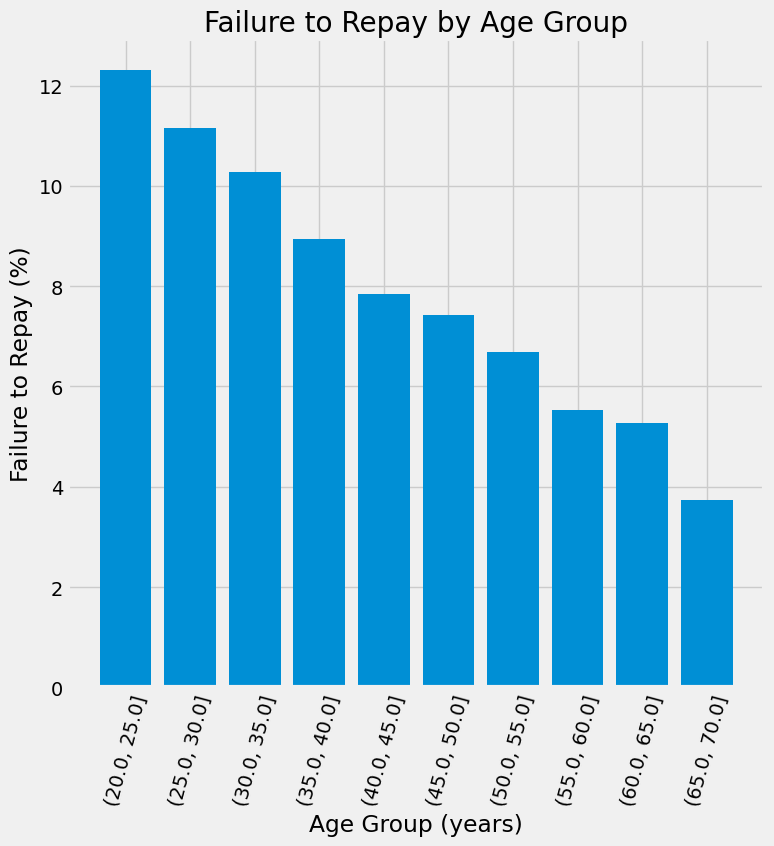

In [64]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

Il y a une tendance claire : les jeunes demandeurs sont plus susceptibles de ne pas rembourser le prêt ! Le taux d'impayés est supérieur à 10 % pour les trois tranches d'âge les plus jeunes et inférieur à 5 % pour la tranche d'âge la plus élevée.

Il s'agit d'informations qui pourraient être directement utilisées par la banque : étant donné que les clients plus jeunes sont moins susceptibles de rembourser le prêt, il faudrait peut-être leur fournir davantage de conseils ou de conseils de planification financière. Cela ne signifie pas que la banque devrait discriminer les jeunes clients, mais il serait judicieux de prendre des mesures de précaution pour aider les jeunes clients à payer à temps.

### L'effet des sources extérieures

Les 3 variables avec les corrélations négatives les plus fortes avec la cible sont EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3. Selon la documentation, ces fonctionnalités représentent un "score normalisé à partir d'une source de données externe".

In [65]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000

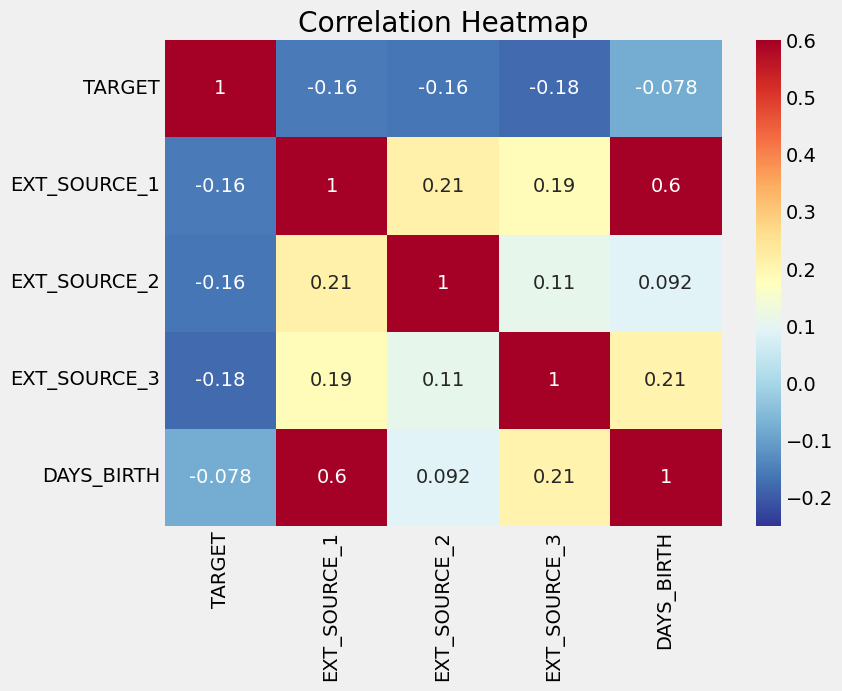

In [66]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Les trois caractéristiques EXT_SOURCE ont des corrélations négatives avec la cible, ce qui indique qu'à mesure que la valeur de EXT_SOURCE augmente, le client est plus susceptible de rembourser le prêt. Nous pouvons également voir que DAYS_BIRTH est positivement corrélé avec EXT_SOURCE_1 indiquant que l'un des facteurs de ce score est peut-être l'âge du client.

Ensuite, nous pouvons examiner la distribution de chacune de ces caractéristiques colorées par la valeur de la cible. Cela nous permettra de visualiser l'effet de cette variable sur la cible.

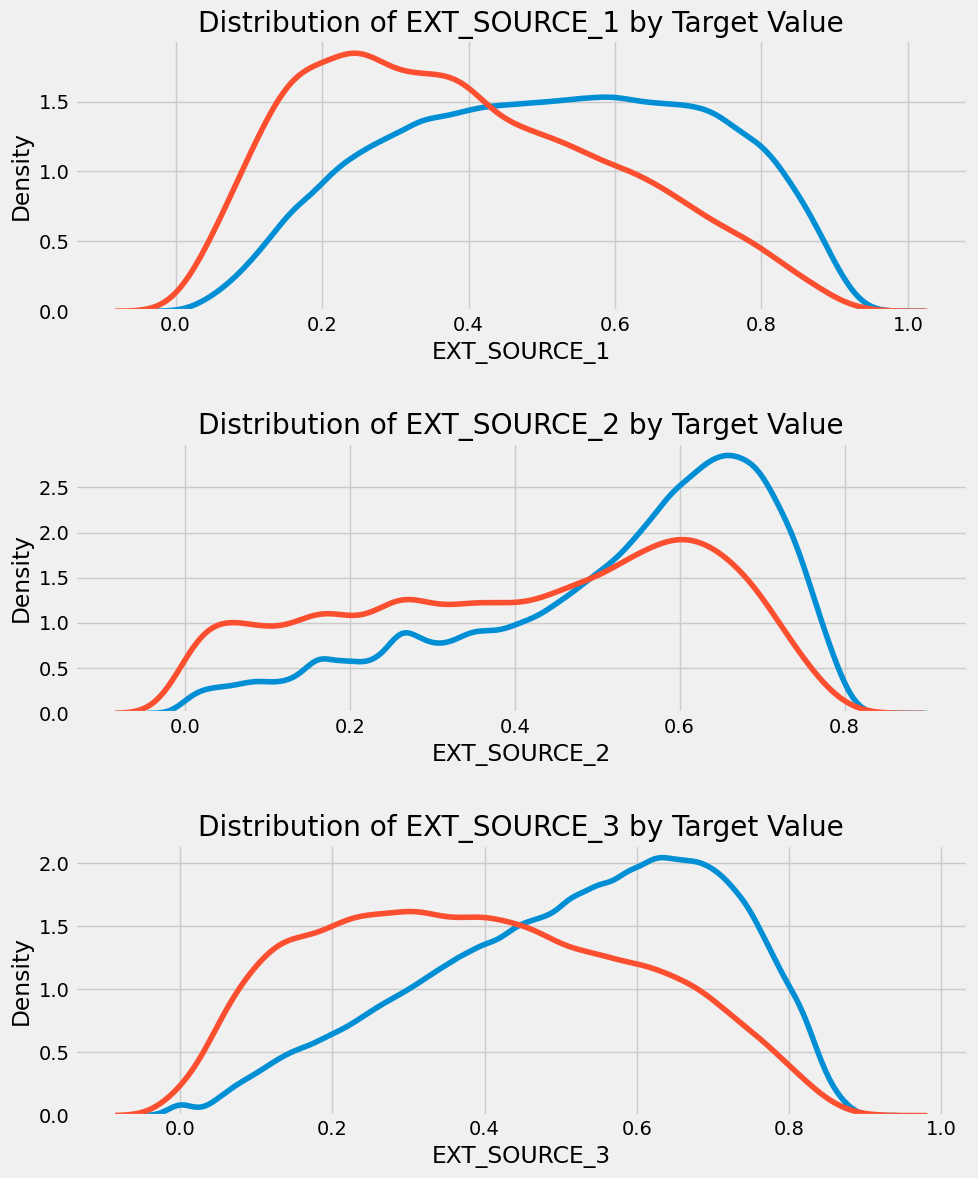

In [67]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 affiche la plus grande différence entre les valeurs de la cible. Nous pouvons clairement voir que cette caractéristique a une certaine relation avec la probabilité qu'un demandeur rembourse un prêt. La relation n'est pas très forte (en fait elles sont toutes considérées comme très faibles, mais ces variables seront tout de même utiles pour un modèle d'apprentissage automatique pour prédire si oui ou non un demandeur remboursera un prêt à temps.

### Autres features 

In [72]:

#Plot distribution of one feature
def plot_distribution(feature, title):
    plt.figure(figsize=(20,6))

    t0 = app_train.loc[app_train['TARGET'] == 0]
    t1 = app_train.loc[app_train['TARGET'] == 1]

    
    sns.kdeplot(t0[feature].dropna(), color='blue', label="TARGET = 0")
    sns.kdeplot(t1[feature].dropna(), color='red', label="TARGET = 1")
    plt.title(title)
    plt.ylabel('')
    plt.legend()

                                   -------------------------------------------------------
                                   -------------------------------------------------------
                                   -------------------------------------------------------
                                   -------------------------------------------------------


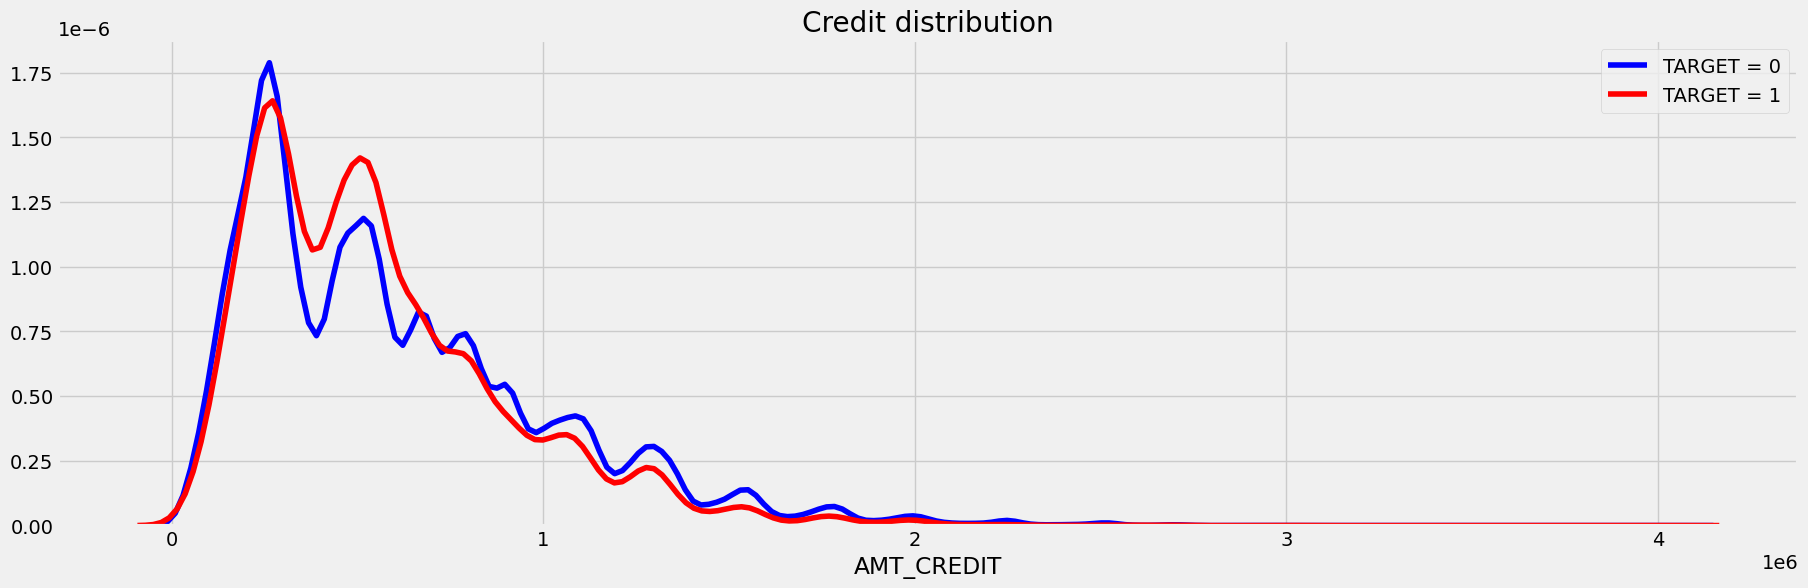

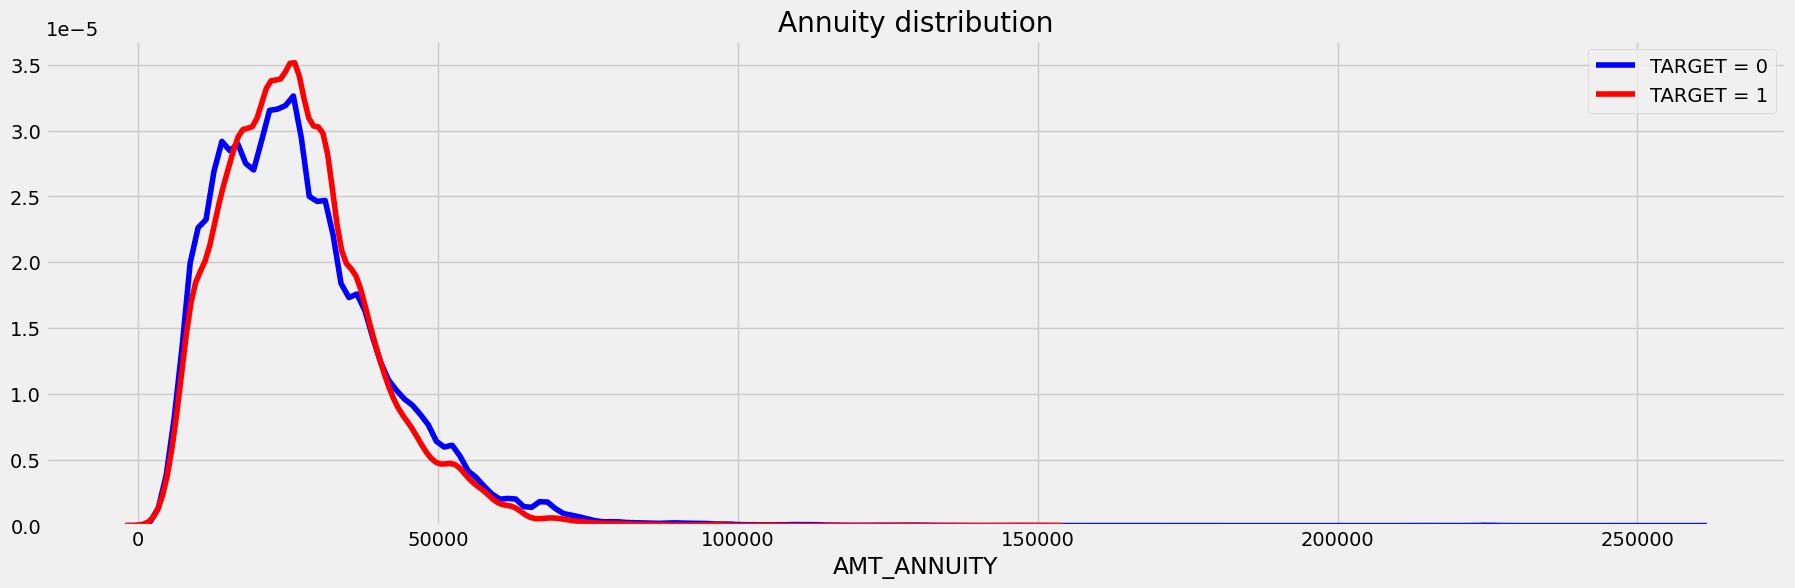

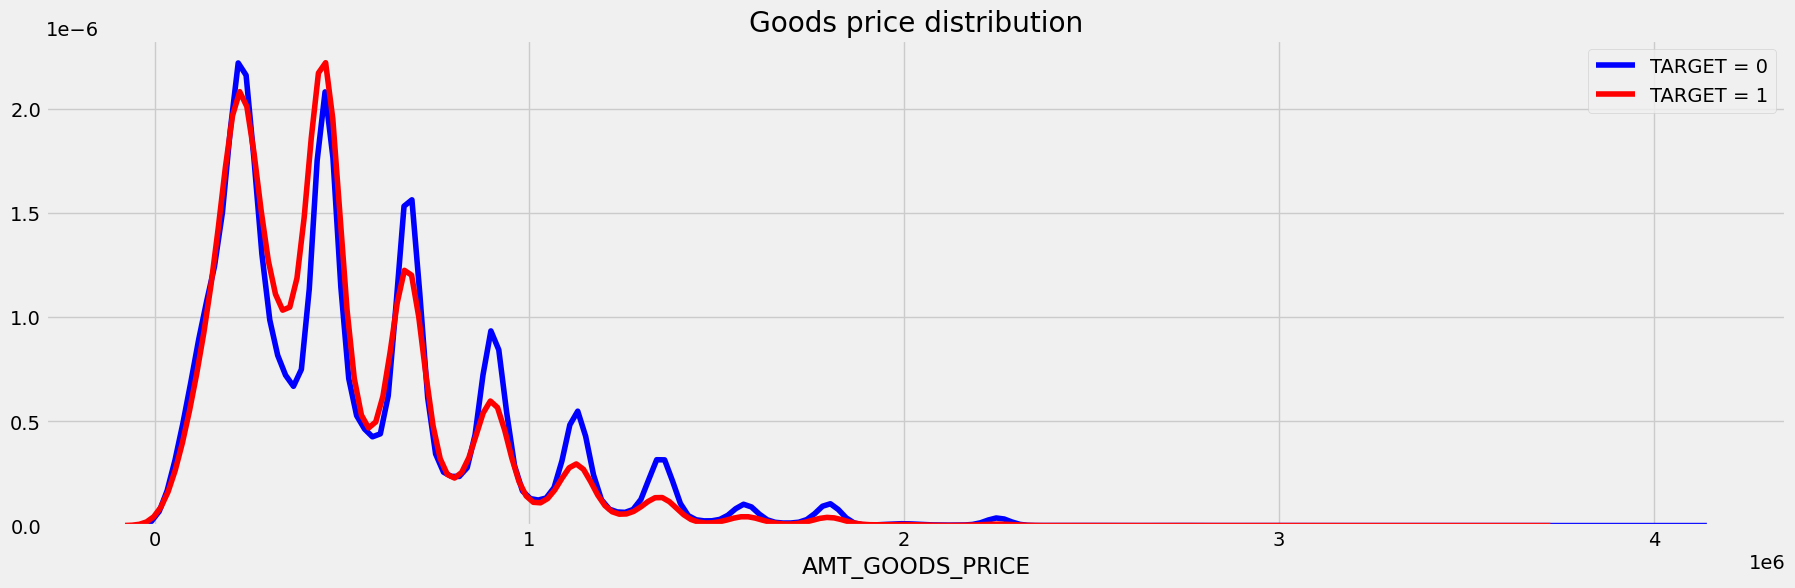

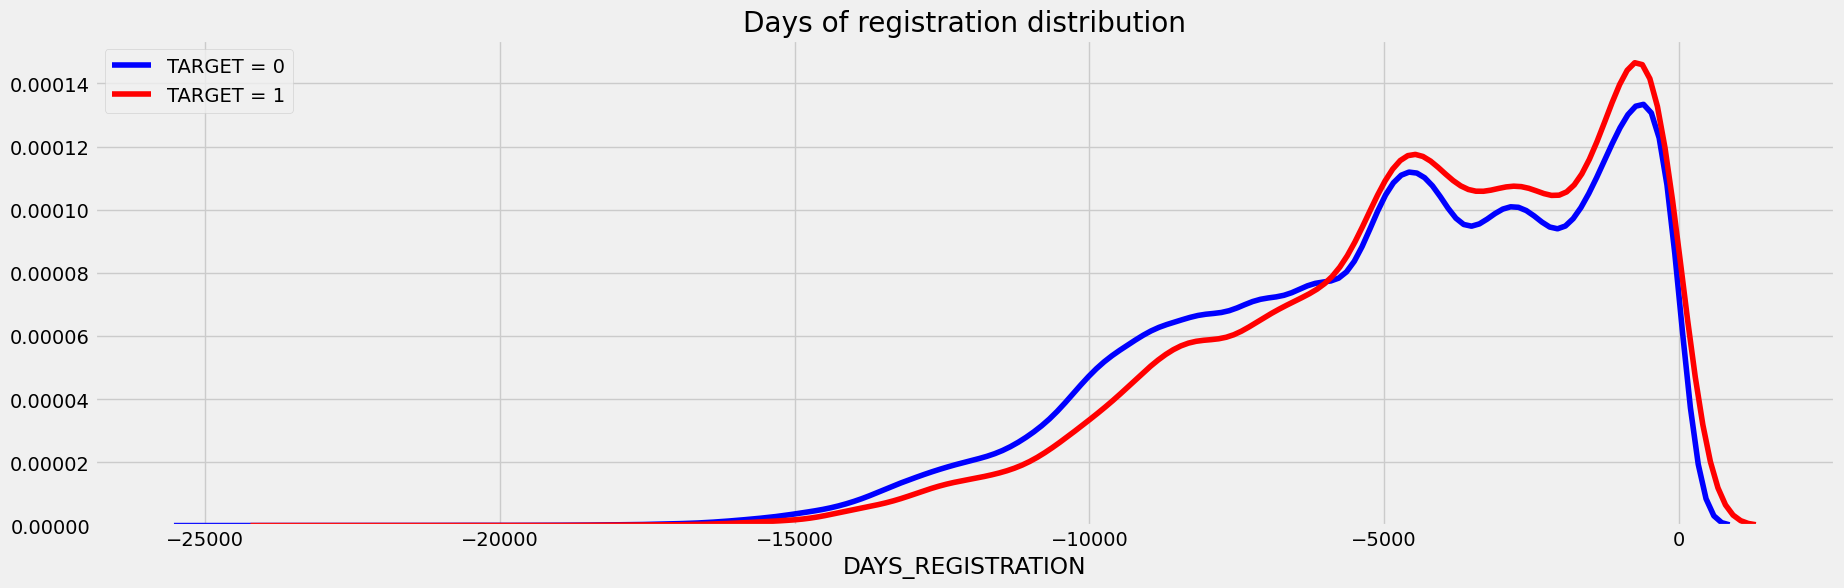

In [73]:
plot_distribution('AMT_CREDIT', "Credit distribution")
print("                                   -------------------------------------------------------")
plot_distribution('AMT_ANNUITY', "Annuity distribution")
print("                                   -------------------------------------------------------")
plot_distribution('AMT_GOODS_PRICE', "Goods price distribution")
print("                                   -------------------------------------------------------")
plot_distribution('DAYS_REGISTRATION', "Days of registration distribution")
print("                                   -------------------------------------------------------")

# 5. Étude des autres fichiers et fusion avec les autres fichiers 

## 5.1. Bureau.csv

Ce fichier contient tous les crédits antérieurs des clients fournis par d'autres institutions financières qui ont été déclarés au Bureau de crédit (pour les clients qui ont un prêt dans l'échantillon). Pour chaque prêt de l'échantillon, il y a autant de lignes que de nombre de crédits que le client avait au bureau de crédit avant la date de la demande. SK_ID_CURR est la clé reliant les données application_train | test aux données du bureau.

Il est nécessaire de fusionner "application_train" avec "bureau" pour pour pouvoir extraire la part de TARGET == 1.

In [75]:
bureau=pd.read_csv(r"C:\Users\kherm\Documents\Openclassrooms\projet 7\bureau.csv")

application_bureau_train = app_train.merge(bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')


                                   -------------------------------------------------------


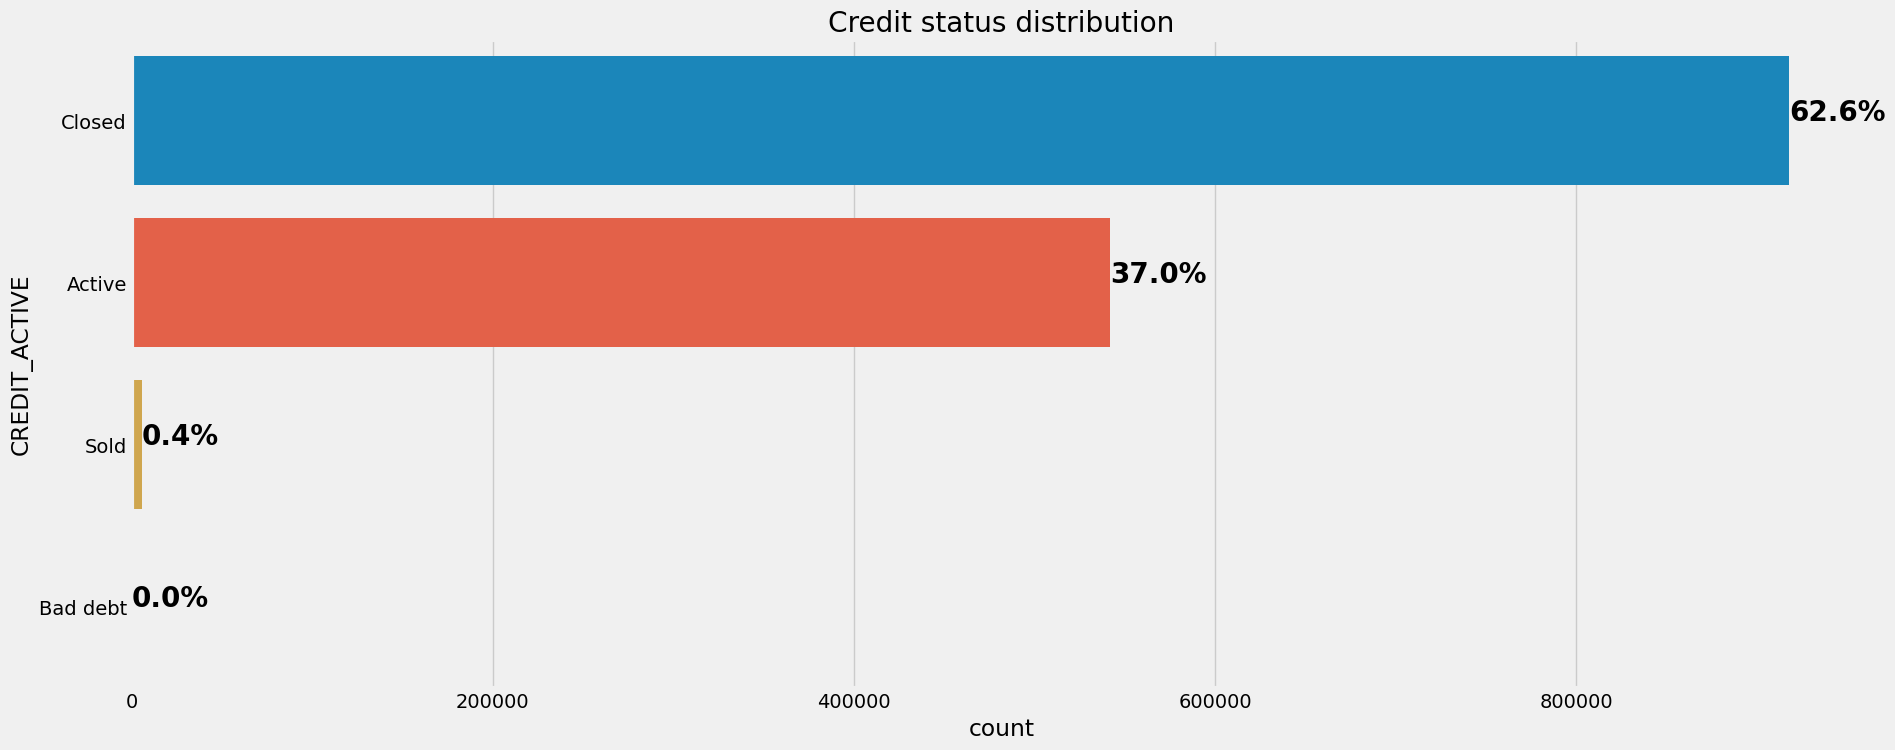

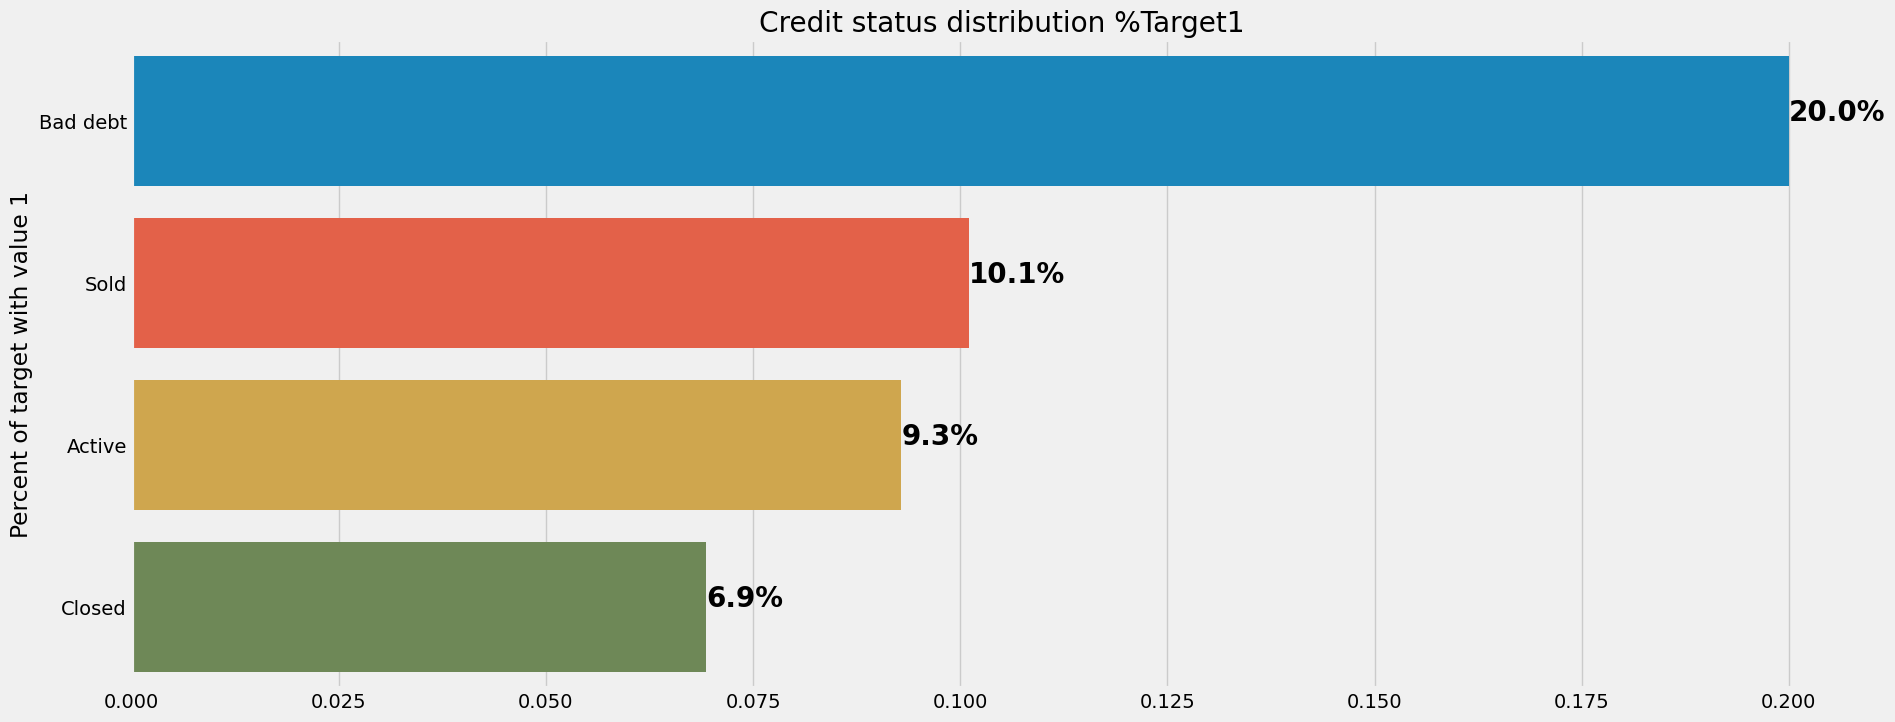

In [76]:
#CREDIT_ACTIVE
plot_stat(application_bureau_train, 'CREDIT_ACTIVE',"Credit status distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_bureau_train, 'CREDIT_ACTIVE',"Credit status distribution %Target1")

                                   -------------------------------------------------------


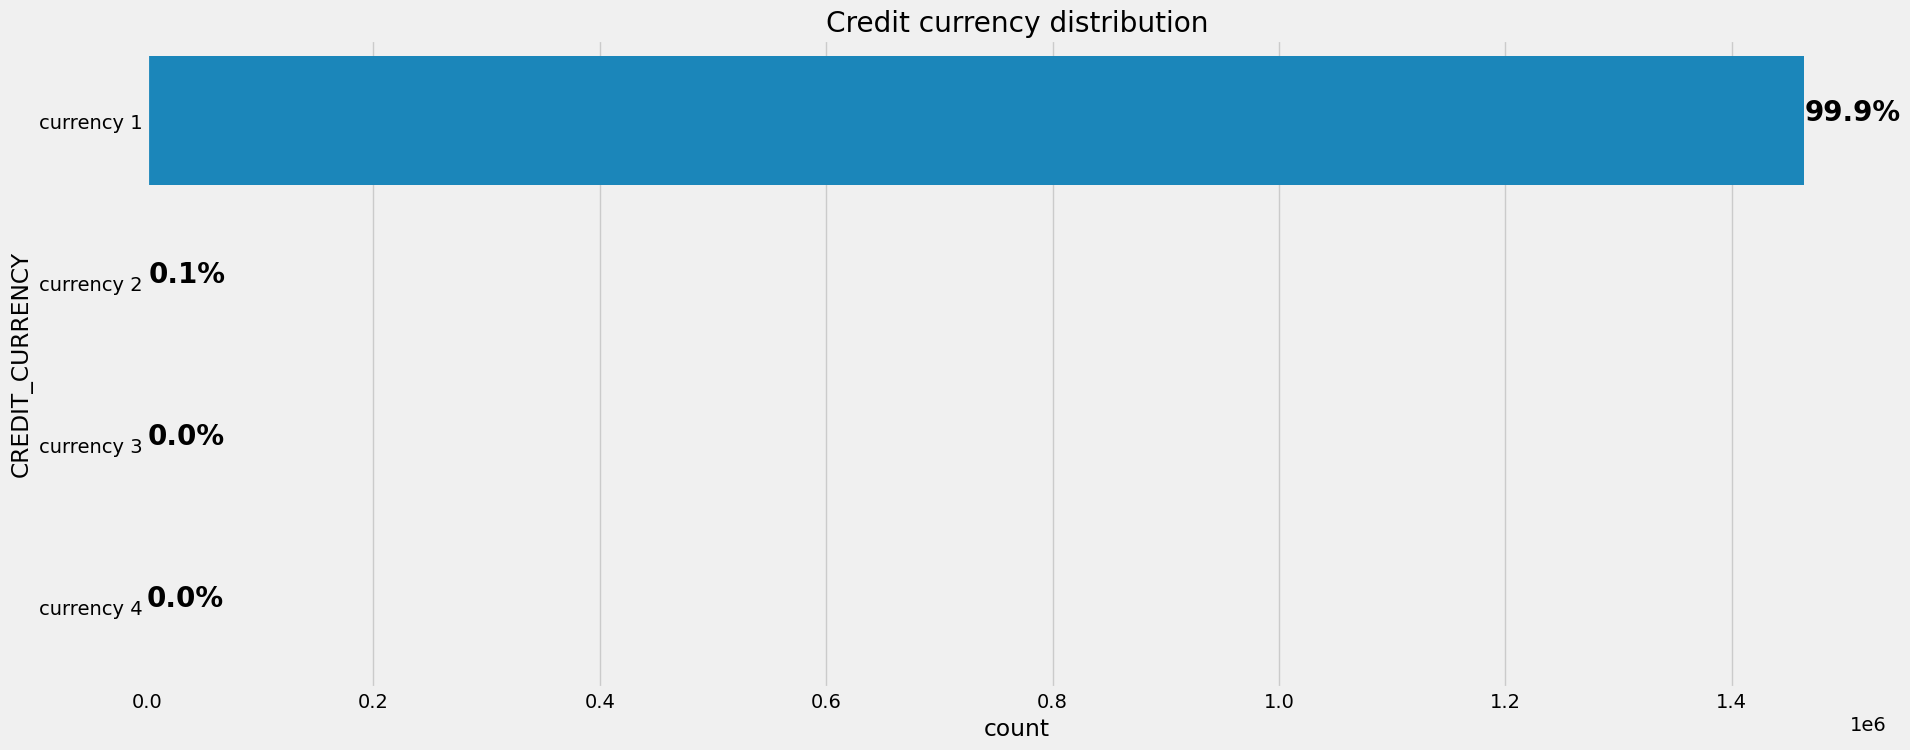

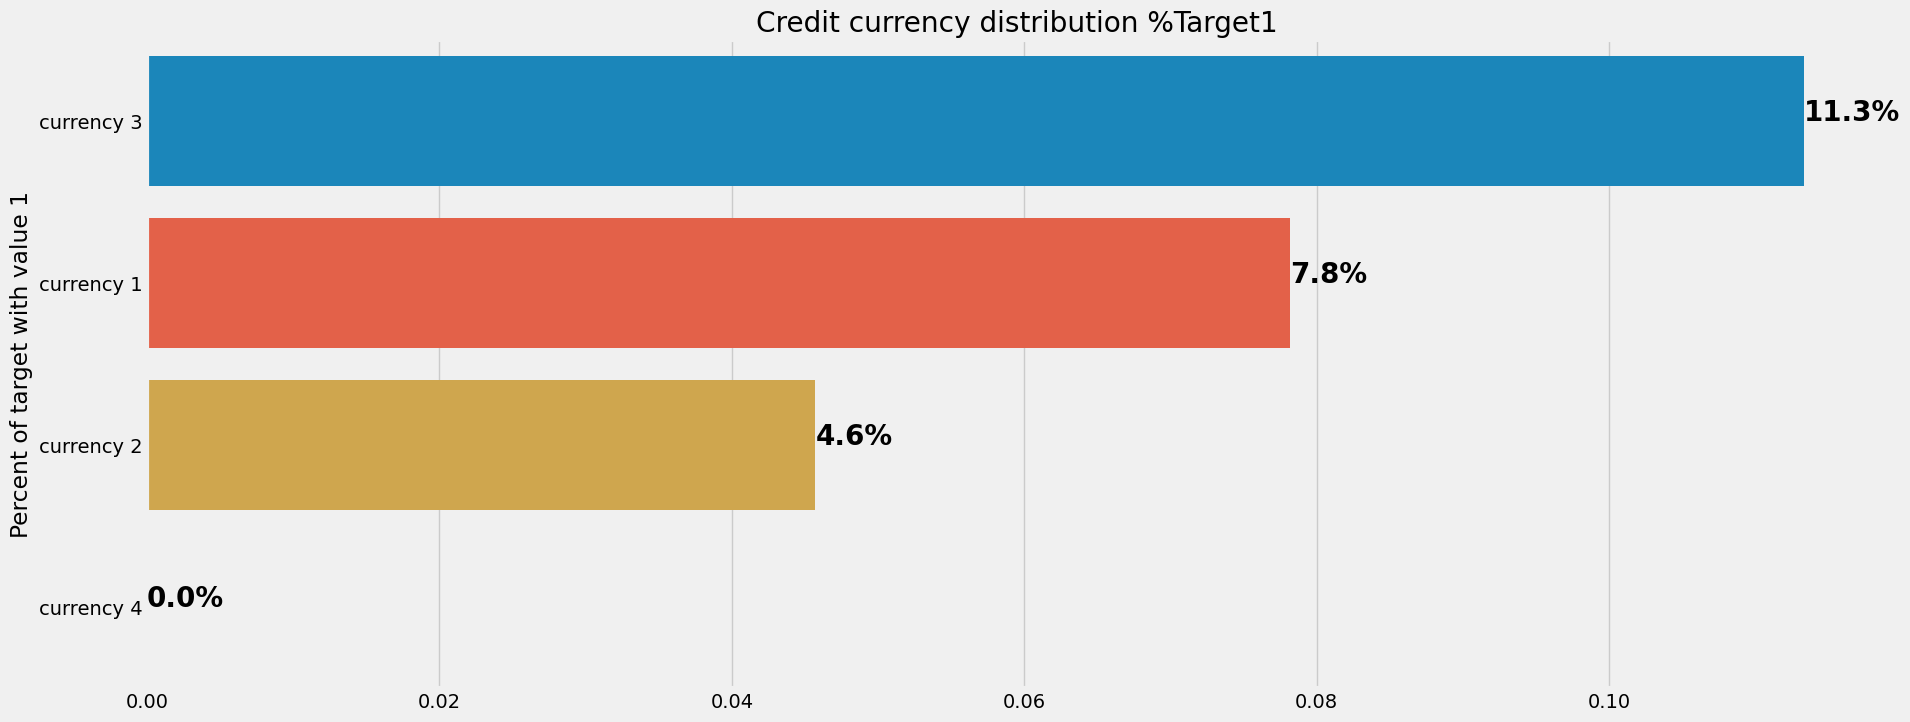

In [77]:
#CREDIT_CURRENCY
plot_stat(application_bureau_train, 'CREDIT_CURRENCY',"Credit currency distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_bureau_train, 'CREDIT_CURRENCY',"Credit currency distribution %Target1")

                                   -------------------------------------------------------


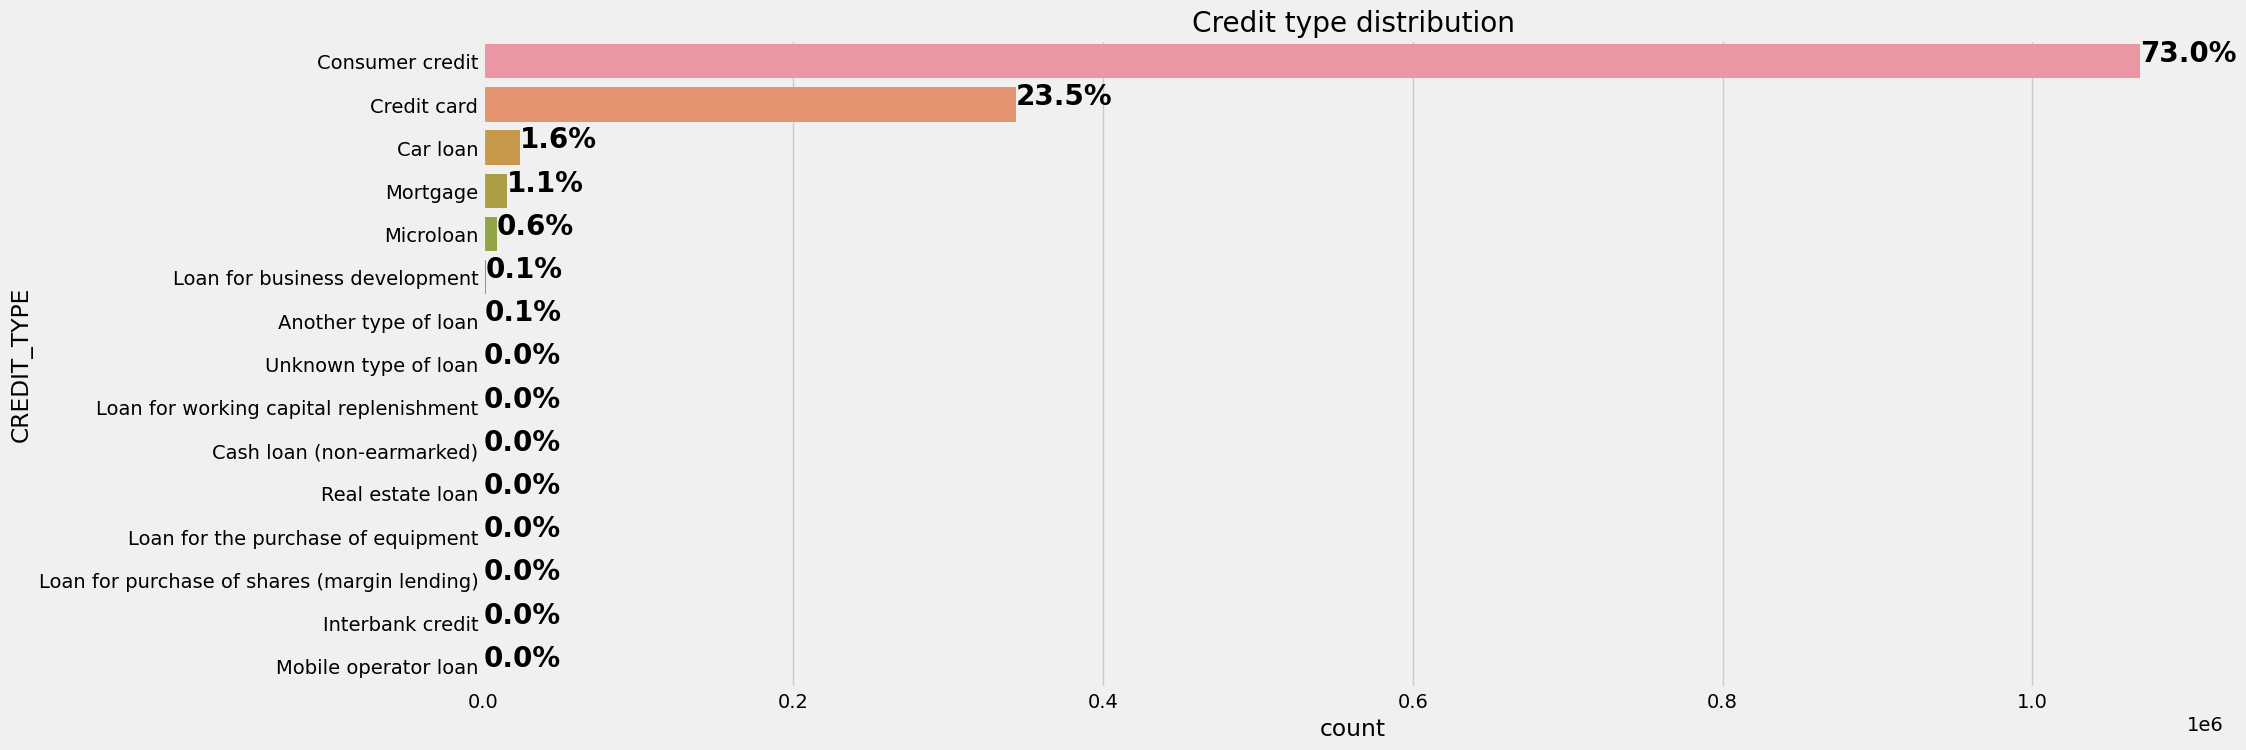

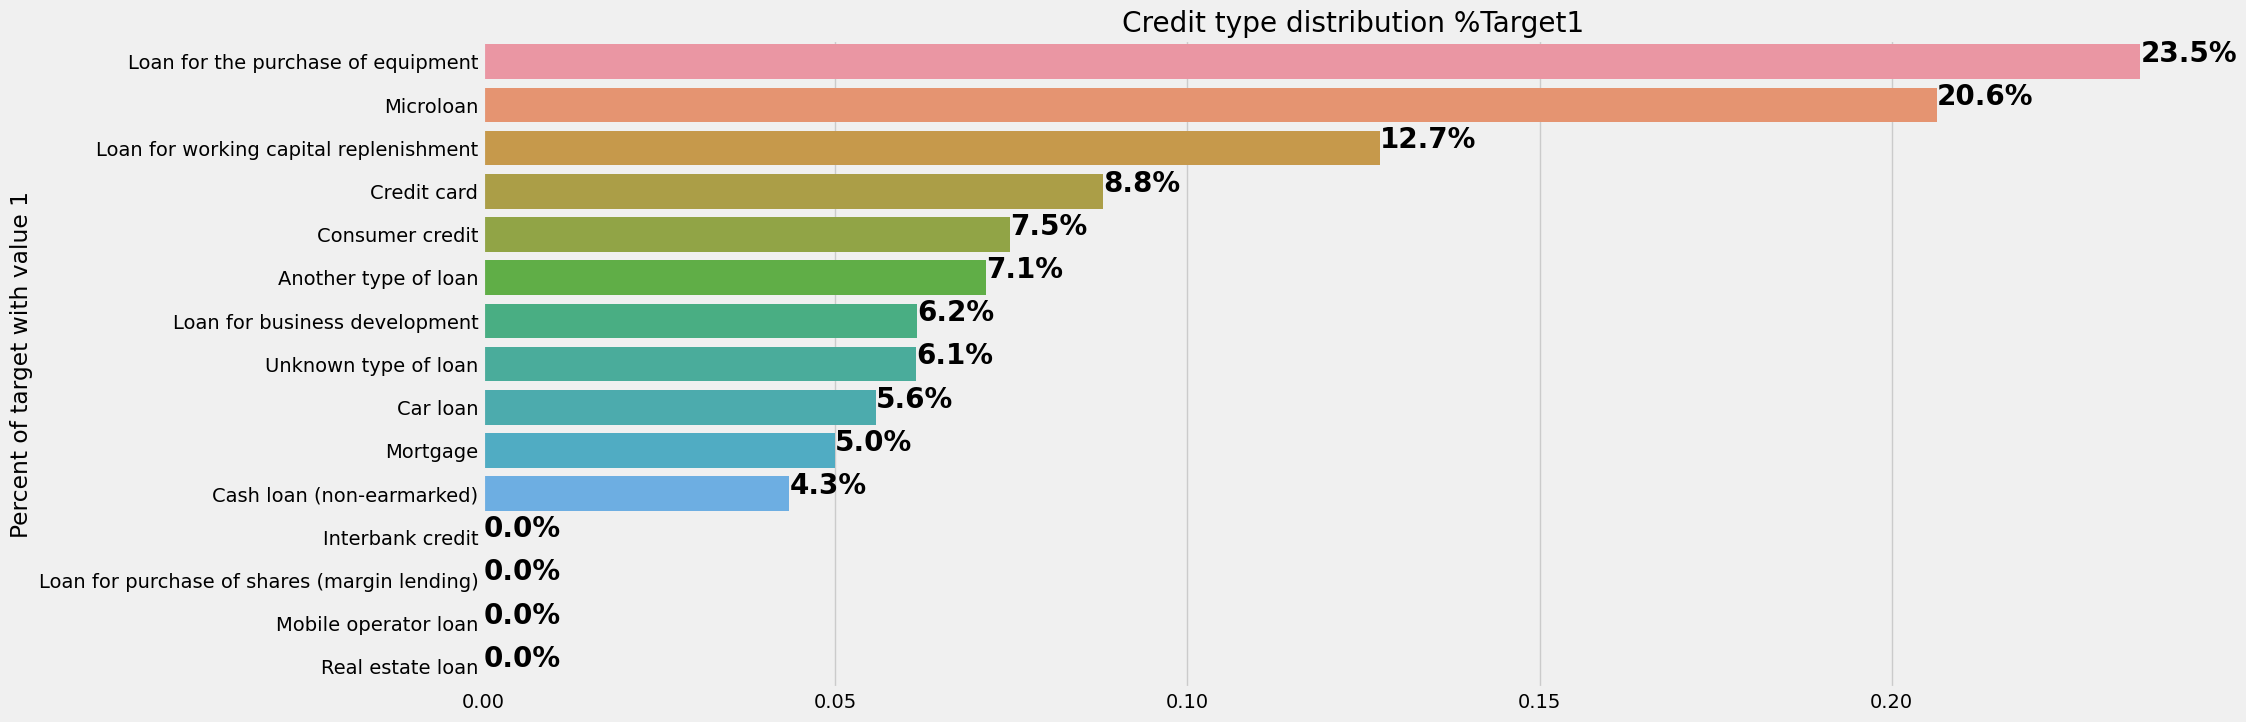

In [78]:
#CREDIT_TYPE
plot_stat(application_bureau_train, 'CREDIT_TYPE',"Credit type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_bureau_train, 'CREDIT_TYPE',"Credit type distribution %Target1")

## 5.2. Previous application data

"previous_application" contient des informations sur toutes les demandes précédentes de crédit immobilier des clients qui ont des prêts dans l'échantillon. Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données. SK_ID_CURR est la clé reliant les données application_train | test aux données previous_application.

Il est nécessaire de fusionner "application_train" avec "previous_application" pour pour pouvoir extraire la part de TARGET == 1.

In [80]:
previous_application=pd.read_csv(r"C:\Users\kherm\Documents\Openclassrooms\projet 7\previous_application.csv")
application_prev_train = app_train.merge(previous_application, 
                                                 left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

                                   -------------------------------------------------------


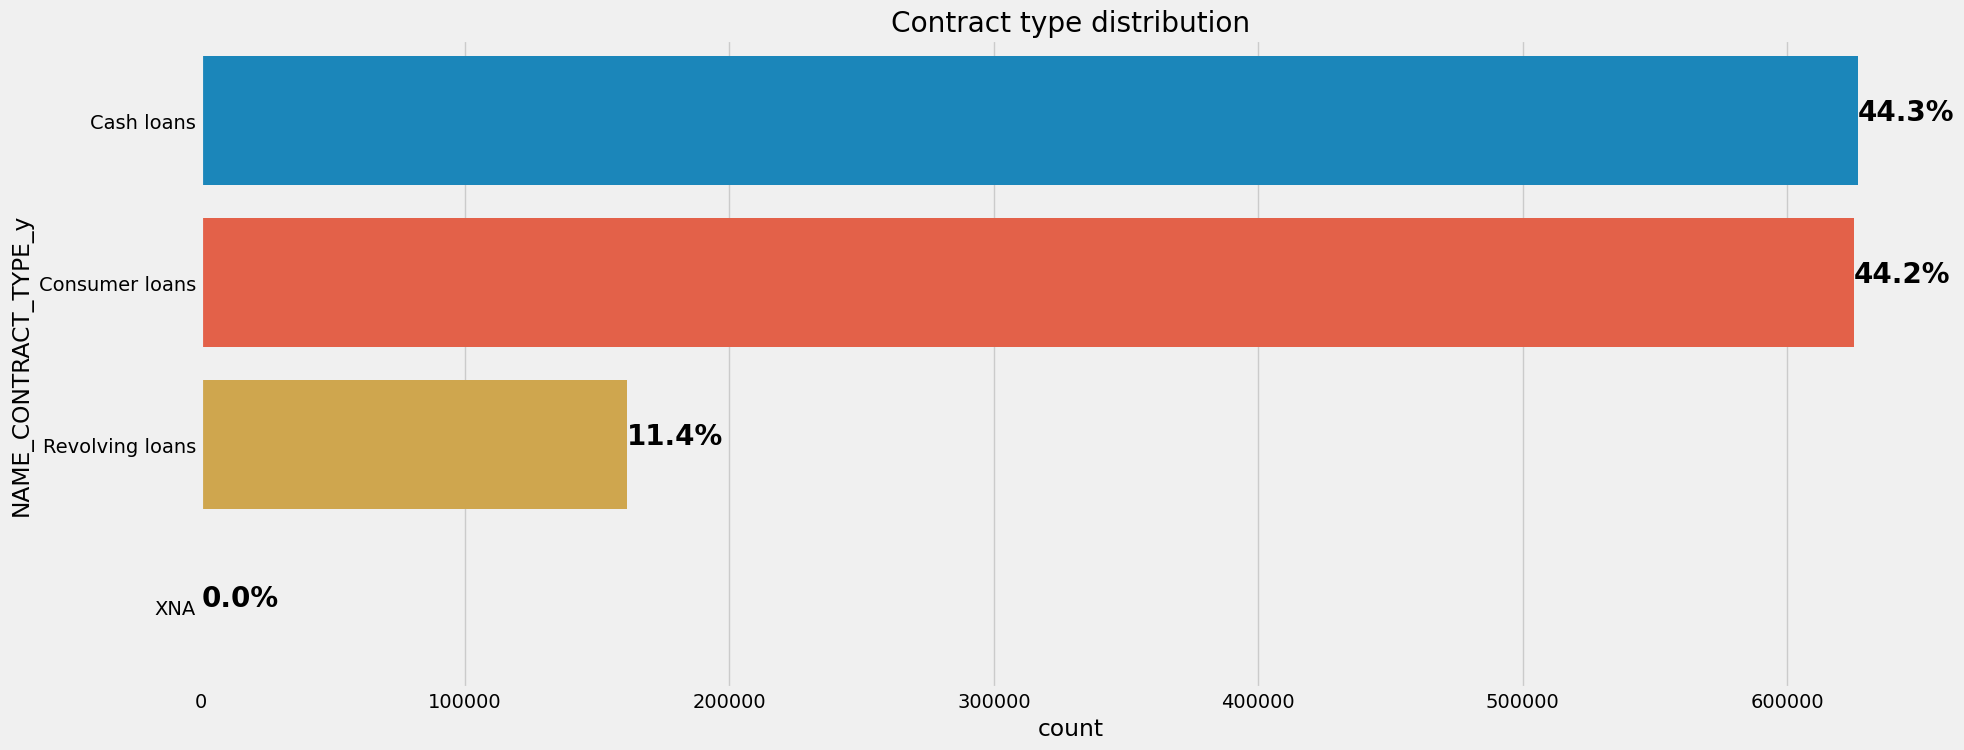

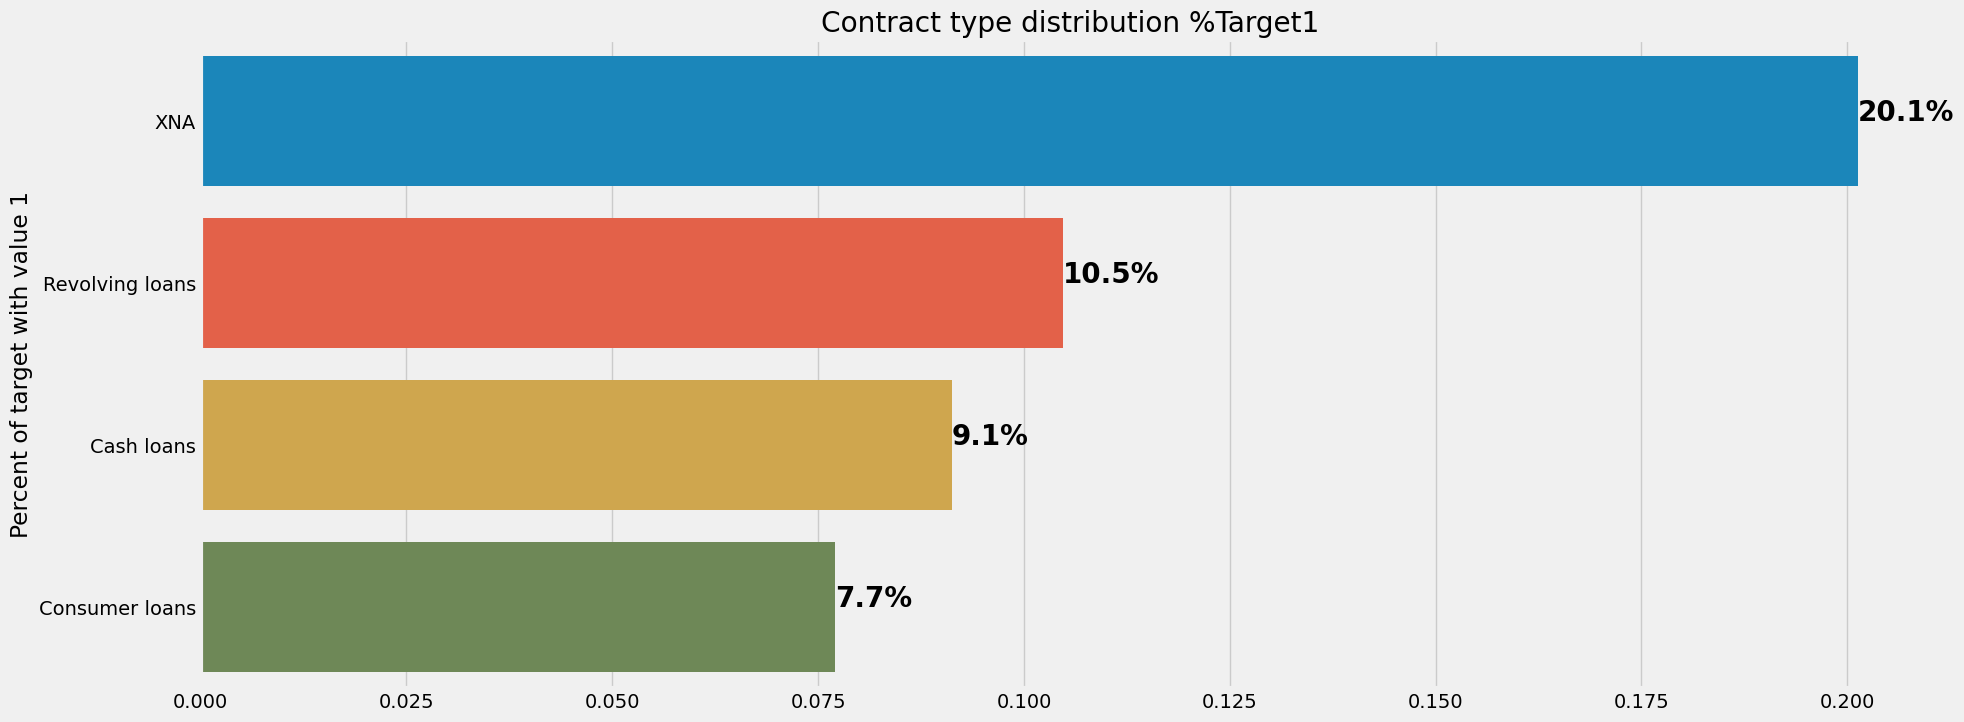

In [81]:
#NAME_CONTRACT_TYPE_y
plot_stat(application_prev_train, 'NAME_CONTRACT_TYPE_y',"Contract type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_prev_train, 'NAME_CONTRACT_TYPE_y',"Contract type distribution %Target1")


                                   -------------------------------------------------------


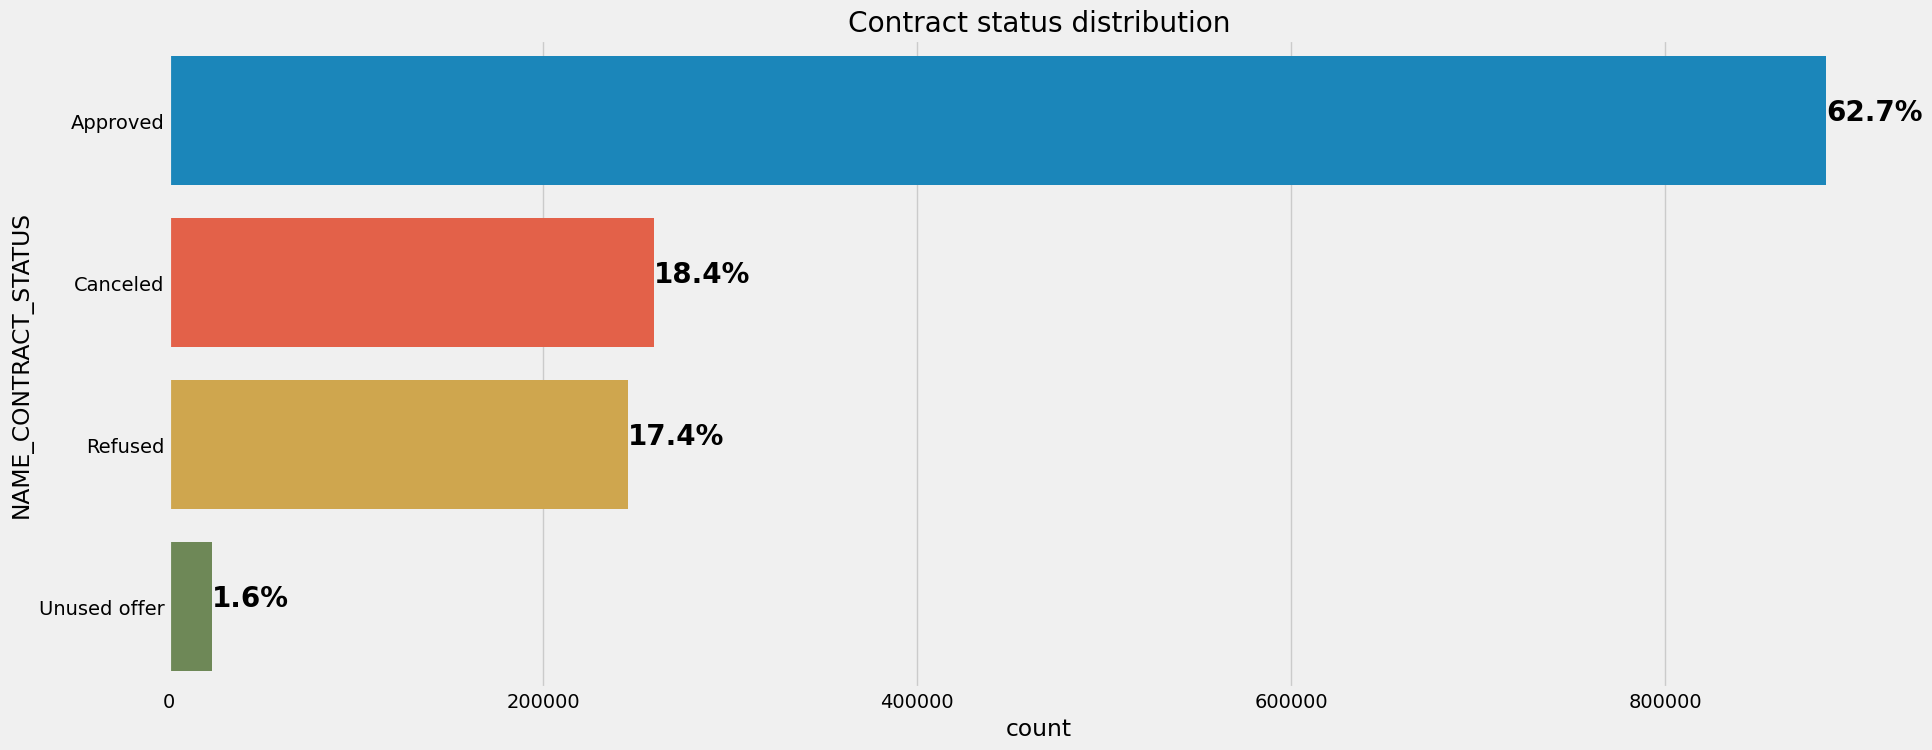

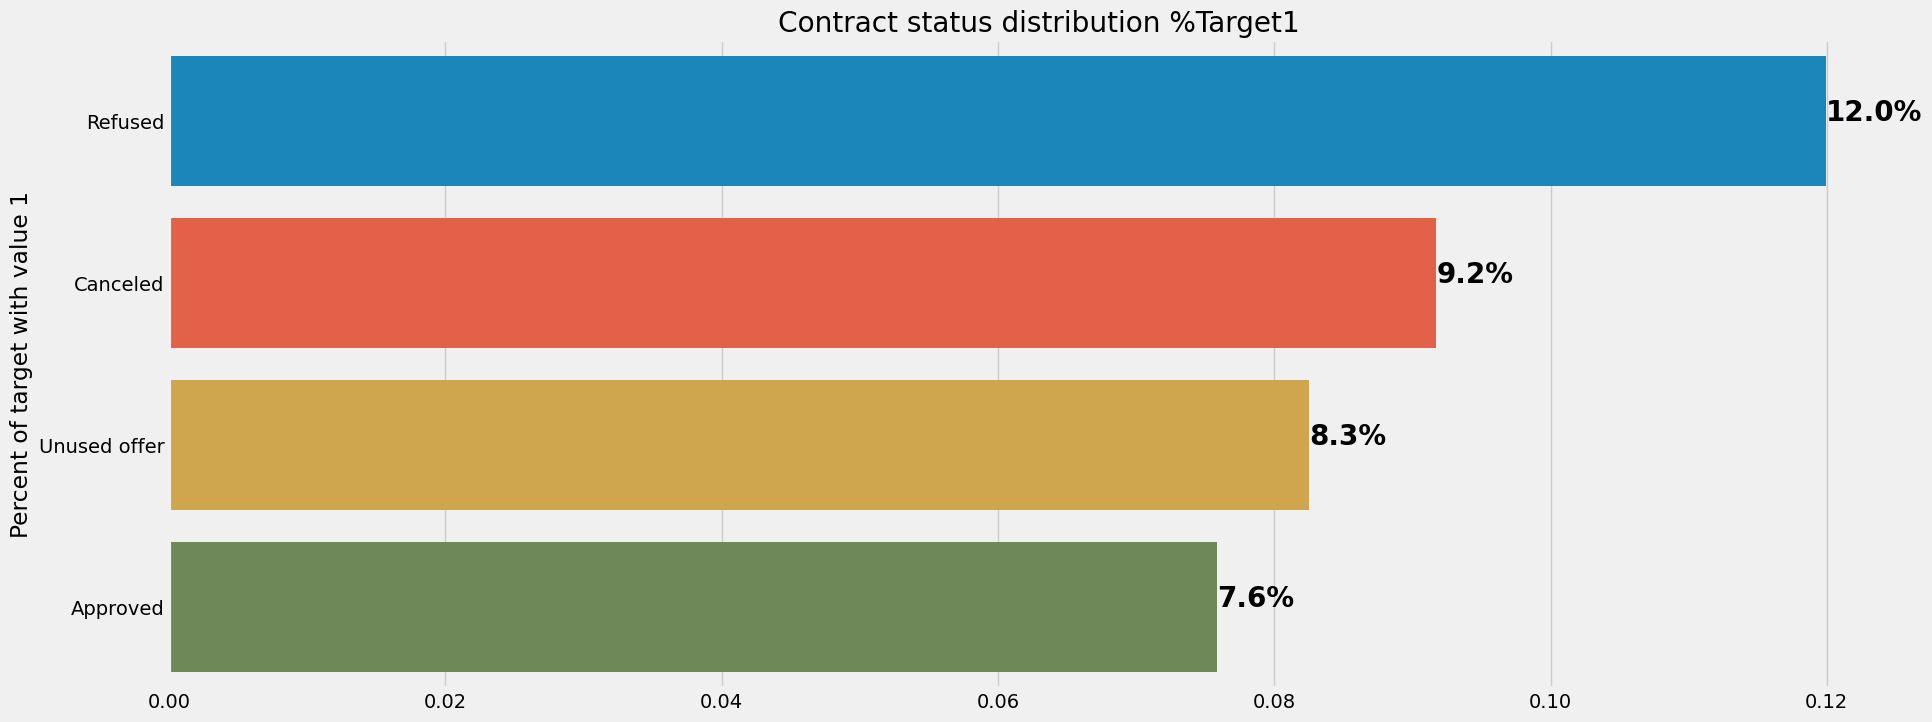

In [84]:
#NAME_CONTRACT_STATUS
plot_stat(application_prev_train, 'NAME_CONTRACT_STATUS',"Contract status distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_prev_train, 'NAME_CONTRACT_STATUS',"Contract status distribution %Target1")

                                   -------------------------------------------------------


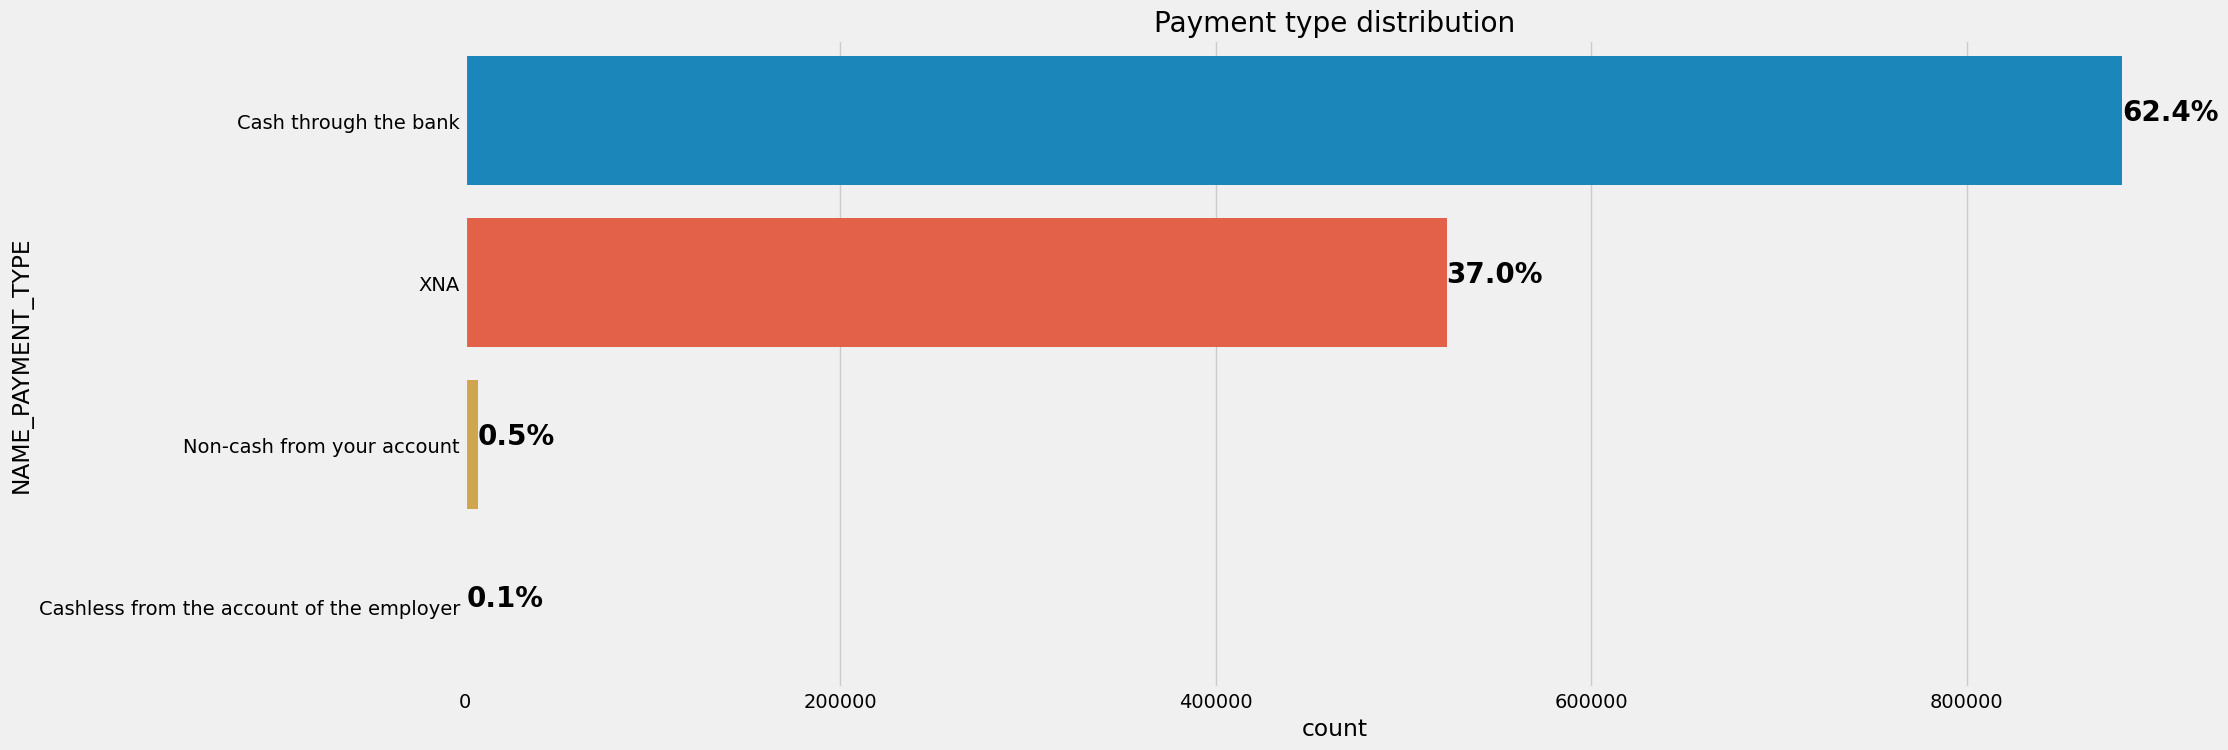

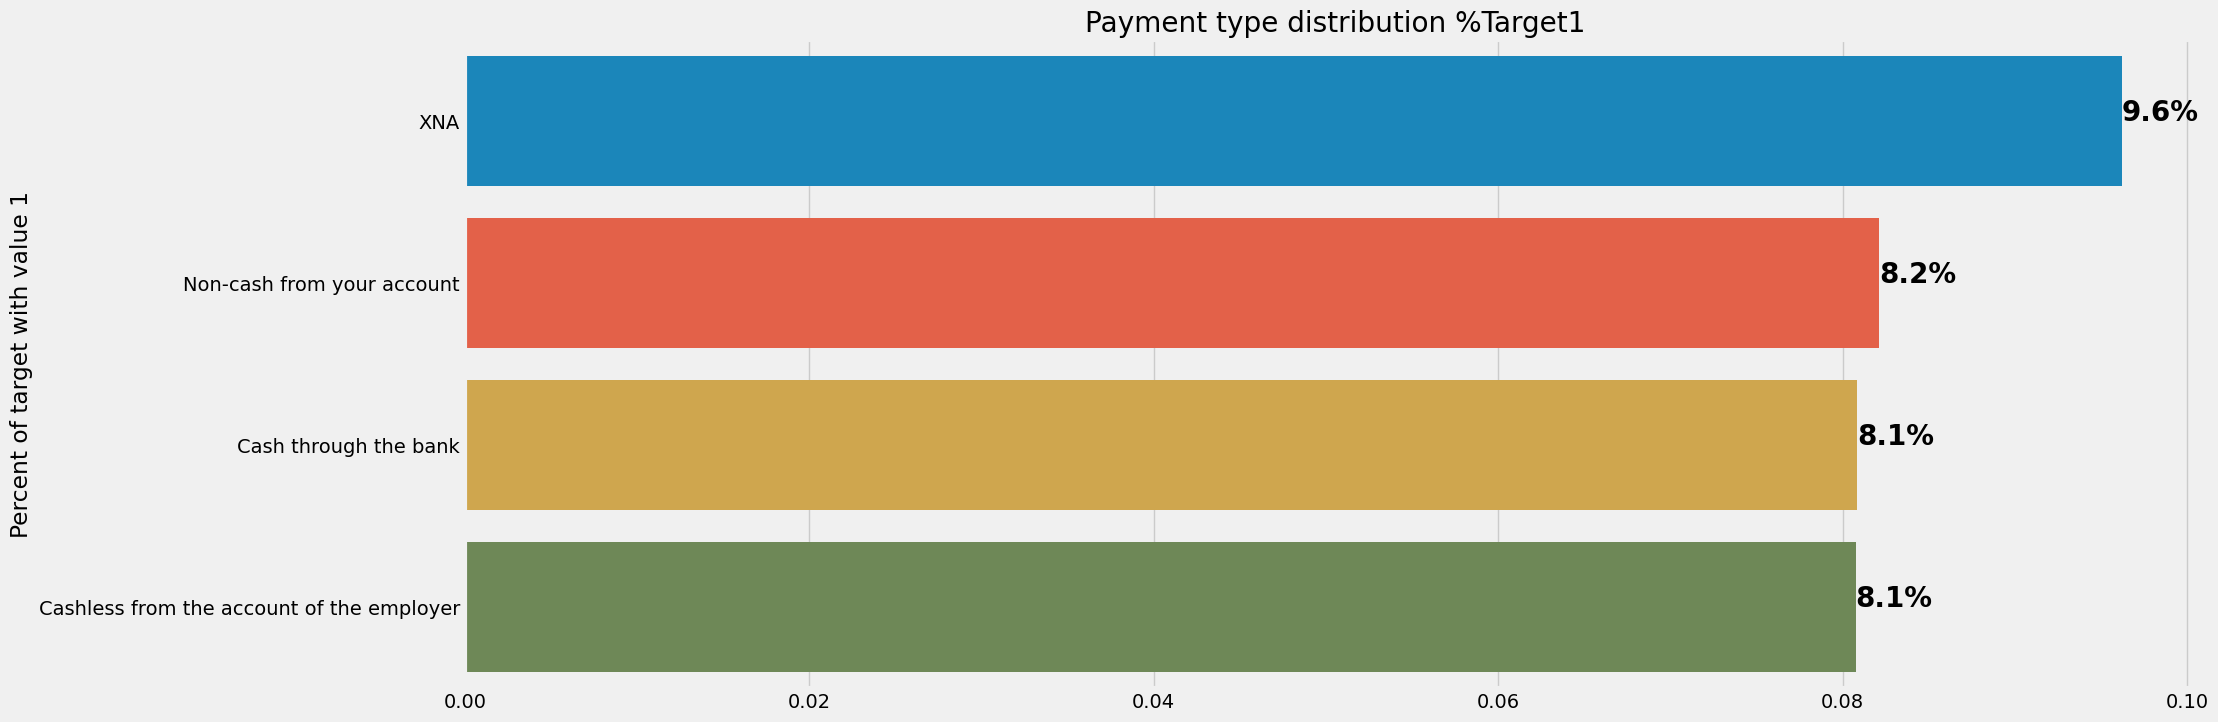

In [85]:
#NAME_PAYMENT_TYPE
plot_stat(application_prev_train, 'NAME_PAYMENT_TYPE',"Payment type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_prev_train, 'NAME_PAYMENT_TYPE',"Payment type distribution %Target1")

Le mode de paiement se fait majoritairement en Cash via la banque. Le remboursement du crédit en cas de défaillance (Target 1) ne se dintingue sur aucun type de paiement, l'égalité est quasi parfaite.

                                   -------------------------------------------------------


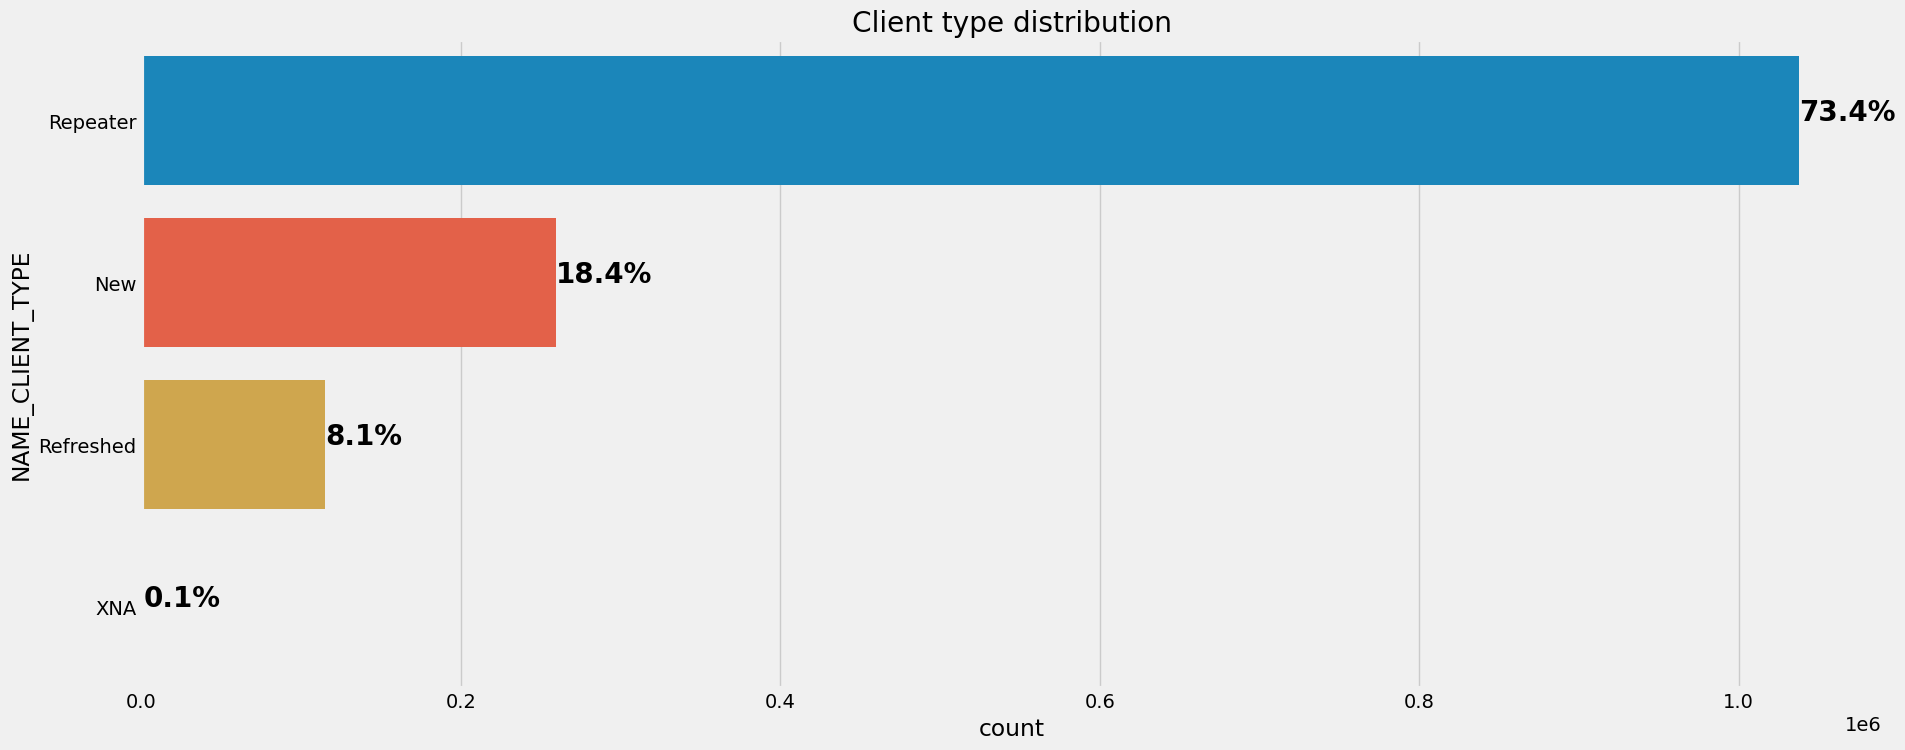

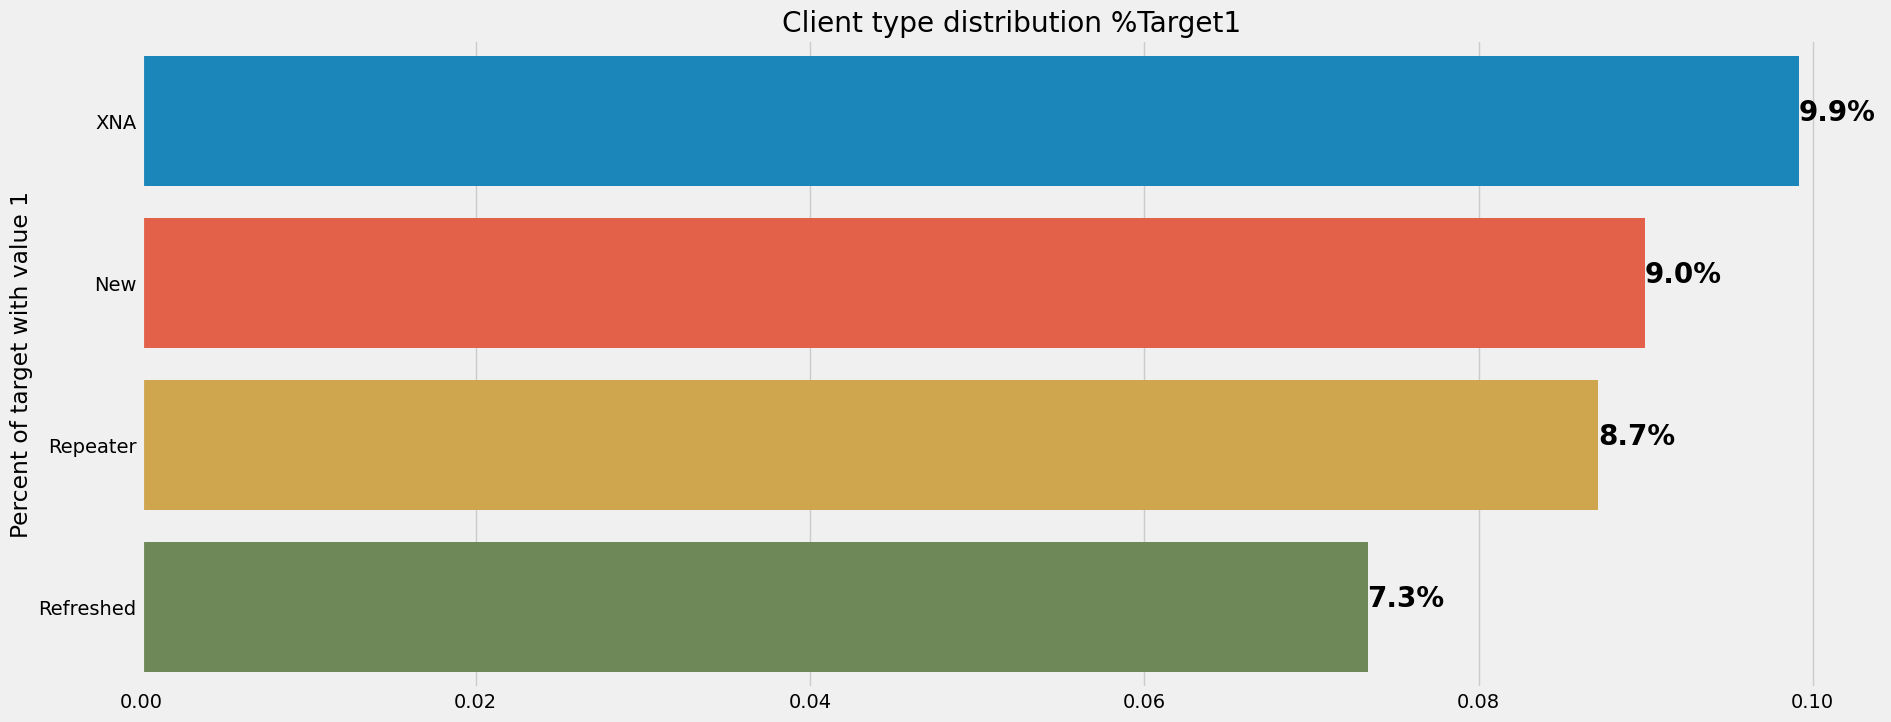

In [86]:
#NAME_CLIENT_TYPE
plot_stat(application_prev_train, 'NAME_CLIENT_TYPE',"Client type distribution")
print("                                   -------------------------------------------------------")
plot_percent_target1(application_prev_train, 'NAME_CLIENT_TYPE',"Client type distribution %Target1")

# 6. Pairs Plot 

En tant que graphique exploratoire final, nous pouvons créer un graphique de paires des variables EXT_SOURCE et de la variable DAYS_BIRTH. Le diagramme de paires est un excellent outil d'exploration car il nous permet de voir les relations entre plusieurs paires de variables ainsi que les distributions de variables uniques. Ici, nous utilisons la bibliothèque de visualisation Seaborn et la fonction PairGrid pour créer un diagramme de paires avec des diagrammes de dispersion sur le triangle supérieur, des histogrammes sur la diagonale et des diagrammes de densité de noyau 2D et des coefficients de corrélation sur le triangle inférieur.

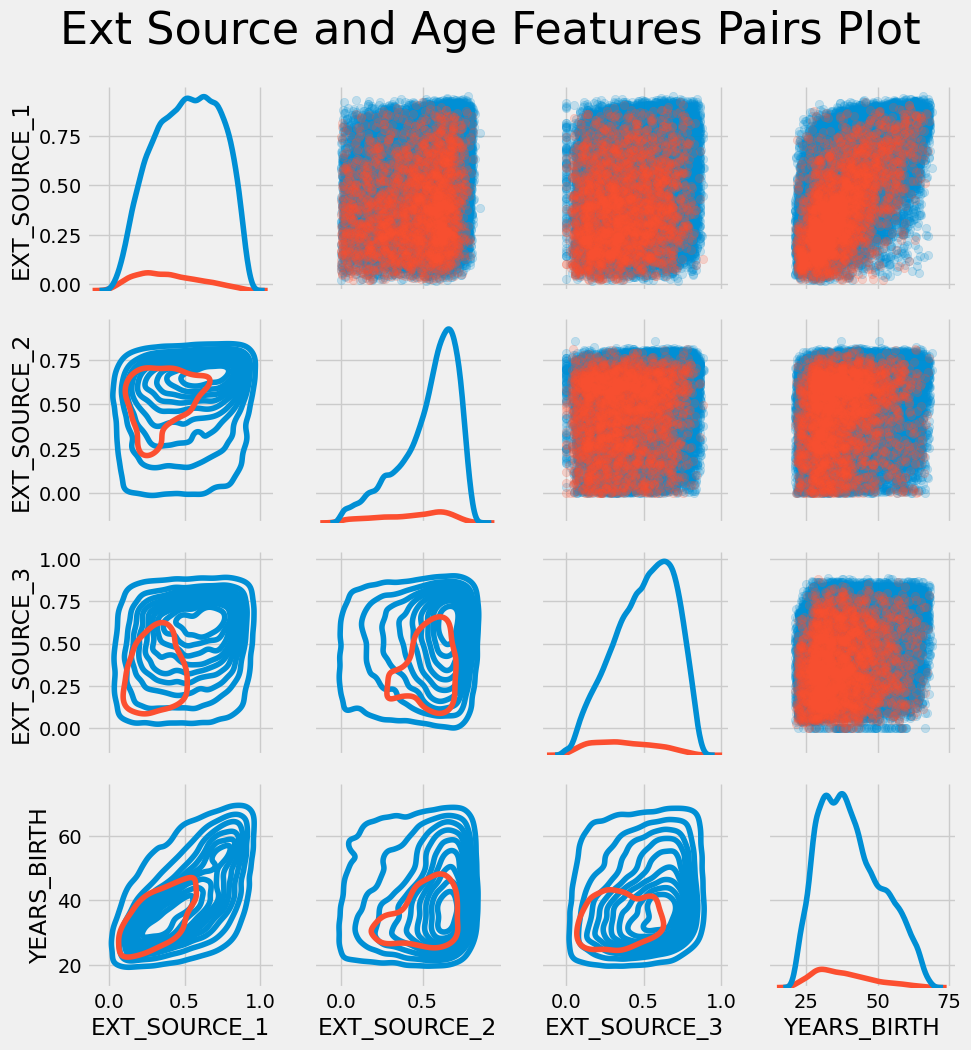

In [89]:

# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

Dans ce graphique, le rouge indique les prêts qui n'ont pas été remboursés et le bleu les prêts qui sont payés. Nous pouvons voir les différentes relations au sein des données. Il semble y avoir une relation linéaire positive modérée entre EXT_SOURCE_1 et DAYS_BIRTH (ou de manière équivalente YEARS_BIRTH), indiquant que cette caractéristique peut prendre en compte l'âge du client.

# PARTIE 2 : Merging et Aggrégations des données 

## 1. Fusion du train et du test 

In [94]:
#Create a simple dataset with the train / test merge app
data = pd.concat([app_train, app_test], ignore_index=True)
#data = app_train.append(app_test,ignore_index = True)

In [95]:
print('Train:' + str(app_train.shape))
print('Test:' + str(app_test.shape))
print('>>> Data:' + str(data.shape))

Train:(307511, 123)
Test:(48744, 122)
>>> Data:(356255, 123)


Vérifions que la variable TARGET est bien vide pour 48744 observations. 

In [96]:
#Now just in case, let's check if we've got it right
data.TARGET.isna().sum()

48744

## 2. Extraction des informations à partir du fichier bureau.csv 

In [99]:
display(bureau.head())
display(bureau.shape)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

(1716428, 17)

Calcul du nombre total des précédents crédits pris par chaque client : 

In [100]:
#Total number of previous credits taken by each customer
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(
                                       columns = {'SK_ID_BUREAU': 'PREVIOUS_LOANS_COUNT'})
previous_loan_counts.head()

SK_ID_CURR  PREVIOUS_LOANS_COUNT
0      100001                     7
1      100002                     8
2      100003                     4
3      100004                     2
4      100005                     3

In [101]:
#Merge this new column in our data sample
data = data.merge(previous_loan_counts, on='SK_ID_CURR', how='left')
data.shape

(356255, 124)

## 3. Extraction des informations à partir du fichier bureau_balance.csv 

In [102]:
bureau_balance=pd.read_csv(r"C:\Users\kherm\Documents\Openclassrooms\projet 7\bureau_balance.csv")

In [103]:
display(bureau_balance.head())
display(bureau_balance.shape)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

(27299925, 3)

In [107]:
bureau_balance=bureau_balance.drop(columns='STATUS')
display(bureau_balance.head())

SK_ID_BUREAU  MONTHS_BALANCE
0       5715448               0
1       5715448              -1
2       5715448              -2
3       5715448              -3
4       5715448              -4

In [108]:
#Monthly average balances of previous credits in Credit Bureau.
bureau_bal_mean = bureau_balance.groupby('SK_ID_BUREAU', as_index=False).mean().rename(columns = 
                                        {'MONTHS_BALANCE': 'MONTHS_BALANCE_MEAN'})
bureau_bal_mean.head()

SK_ID_BUREAU  MONTHS_BALANCE_MEAN
0       5001709                -48.0
1       5001710                -41.0
2       5001711                 -1.5
3       5001712                 -9.0
4       5001713                -10.5

In [109]:
bureau_full = bureau.merge(bureau_bal_mean, on='SK_ID_BUREAU', how='left')
bureau_full.drop('SK_ID_BUREAU', axis=1, inplace=True)
display(bureau_full.head())
display(bureau_full.shape)

SK_ID_CURR CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0      215354        Closed      currency 1         -497                   0   
1      215354        Active      currency 1         -208                   0   
2      215354        Active      currency 1         -203                   0   
3      215354        Active      currency 1         -203                   0   
4      215354        Active      currency 1         -629                   0   

   DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
0               -153.0             -153.0                     NaN   
1               1075.0                NaN                     NaN   
2                528.0                NaN                     NaN   
3                  NaN                NaN                     NaN   
4               1197.0                NaN                 77674.5   

   CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0                   0         91323.0                  0.0   
1                   0        225000.0             171342.0   
2                   0        464323.5                  NaN   
3                   0         90000.0                  NaN   
4                   0       2700000.0                  NaN   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
0                   NaN                     0.0  Consumer credit   
1                   NaN                     0.0      Credit card   
2                   NaN                     0.0  Consumer credit   
3                   NaN                     0.0      Credit card   
4                   NaN                     0.0  Consumer credit   

   DAYS_CREDIT_UPDATE  AMT_ANNUITY  MONTHS_BALANCE_MEAN  
0                -131          NaN                  NaN  
1                 -20          NaN                  NaN  
2                 -16          NaN                  NaN  
3                 -16          NaN                  NaN  
4                 -21          NaN                  NaN

(1716428, 17)

In [112]:
bureau_full=bureau_full.drop(['CREDIT_TYPE','CREDIT_ACTIVE','CREDIT_CURRENCY'],axis=1)
bureau_mean = bureau_full.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_BUR_MEAN_')
bureau_mean = bureau_mean.rename(columns = {'PREV_BUR_MEAN_SK_ID_CURR' : 'SK_ID_CURR'})
bureau_mean.shape

(305811, 14)

In [113]:
#Merge all this features with our data sample
data = data.merge(bureau_mean, on='SK_ID_CURR', how='left')
data.shape

(356255, 137)

Notons l'enrichissement avec 13 nouvelles features, créées et ajoutées à notre ensemble de données application train/test appelé data.

## 4. Extraction des informations à partir du fichier previous_application

In [114]:
display(previous_application.head())
display(previous_application.shape)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

(1670214, 37)

In [115]:
#Number of previous applications of the clients to Home Credit
previous_application_counts = previous_application.groupby('SK_ID_CURR', 
                                                           as_index=False)['SK_ID_PREV'].count().rename(
                                                           columns = {'SK_ID_PREV': 'PREVIOUS_APPLICATION_COUNT'})
previous_application_counts.head()

SK_ID_CURR  PREVIOUS_APPLICATION_COUNT
0      100001                           1
1      100002                           1
2      100003                           3
3      100004                           1
4      100005                           2

In [116]:
#Merge this new column in our data sample
data = data.merge(previous_application_counts, on='SK_ID_CURR', how='left')
data.shape

(356255, 138)

## 5. Extraction des informations à partir du fichier credit_card_balance

In [117]:
credit_card_balance=pd.read_csv(r"C:\Users\kherm\Documents\Openclassrooms\projet 7\credit_card_balance.csv")
display(credit_card_balance.head())
display(credit_card_balance.shape)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

(3840312, 23)

In [118]:
credit_card_balance.drop('SK_ID_CURR', axis=1, inplace=True)

In [120]:
credit_card_balance.drop('NAME_CONTRACT_STATUS', axis=1, inplace=True)

In [121]:
credit_card_balance_mean = credit_card_balance.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('CARD_MEAN_')
credit_card_balance_mean.rename(columns = {'CARD_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)
credit_card_balance_mean.shape

(104307, 21)

In [122]:
#Merge with previous_application
previous_application = previous_application.merge(credit_card_balance_mean, on='SK_ID_PREV', how='left')
previous_application.shape

(1670214, 57)

## 6. Extraction des informations à partir du fichier installments_payments

In [123]:
installments_payments=pd.read_csv(r"C:\Users\kherm\Documents\Openclassrooms\projet 7\installments_payments.csv")
display(installments_payments.head())
display(installments_payments.shape)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

(13605401, 8)

In [124]:
installments_payments.drop('SK_ID_CURR', axis=1, inplace=True)

In [125]:
install_pay_mean = installments_payments.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('INSTALL_MEAN_')
install_pay_mean.rename(columns = {'INSTALL_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)
install_pay_mean.shape

(997752, 7)

In [126]:
#Merge with previous_application
previous_application = previous_application.merge(install_pay_mean, on='SK_ID_PREV', how='left')
previous_application.shape

(1670214, 63)

## 6. Extraction des informations à partir du fichier POS_CASH_balance

In [127]:
POS_CASH_balance=pd.read_csv(r"C:\Users\kherm\Documents\Openclassrooms\projet 7\POS_CASH_balance.csv")
display(POS_CASH_balance.head())
display(POS_CASH_balance.shape)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

(10001358, 8)

In [128]:
POS_CASH_balance.drop('SK_ID_CURR', axis=1, inplace=True)

In [129]:
POS_CASH_balance.drop('NAME_CONTRACT_STATUS', axis=1, inplace=True)

In [130]:
POS_mean = installments_payments.groupby('SK_ID_PREV', as_index=False).mean().add_prefix('POS_MEAN_')
POS_mean.rename(columns = {'POS_MEAN_SK_ID_PREV' : 'SK_ID_PREV'}, inplace=True)
POS_mean.shape

(997752, 7)

In [131]:
#Merge with previous_application
previous_application = previous_application.merge(POS_mean, on='SK_ID_PREV', how='left')
previous_application.shape

(1670214, 69)

## 7. Extraction des informations à partir du fichier previous_application

In [132]:
display(previous_application.head())
display(previous_application.shape)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... INSTALL_MEAN_DAYS_INSTALMENT  \
0                       15  ...                        -42.0   
1                       11  ...                        -74.0   
2                       11  ...                       -151.0   
3                        7  ...                       -332.0   
4                        9  ...                          NaN   

   INSTALL_MEAN_DAYS_ENTRY_PAYMENT  INSTALL_MEAN_AMT_INSTALMENT  \
0                       -42.000000                 17284.275000   
1                       -83.200000                 25188.615000   
2                      -159.222222                 15060.735000   
3                      -339.090909                 51193.943182   
4                              NaN                          NaN   

   INSTALL_MEAN_AMT_PAYMENT  POS_MEAN_NUM_INSTALMENT_VERSION  \
0              17284.275000                         2.000000   
1              25188.615000                         1.000000   
2              15060.735000                         1.000000   
3              51193.943182                         1.090909   
4                       NaN                              NaN   

  POS_MEAN_NUM_INSTALMENT_NUMBER POS_MEAN_DAYS_INSTALMENT  \
0                            1.0                    -42.0   
1                            3.0                    -74.0   
2                            5.0                   -151.0   
3                            6.0                   -332.0   
4                            NaN                      NaN   

   POS_MEAN_DAYS_ENTRY_PAYMENT POS_MEAN_AMT_INSTALMENT POS_MEAN_AMT_PAYMENT  
0                   -42.000000            17284.275000         17284.275000  
1                   -83.200000            25188.615000         25188.615000  
2                  -159.222222            15060.735000         15060.735000  
3                  -339.090909            51193.943182         51193.943182  
4                          NaN                     NaN                  NaN  

[5 rows x 69 columns]

(1670214, 69)

In [135]:
## Keep numerical columns only 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
previous_application = previous_application.select_dtypes(include=numerics)

In [136]:
prev_appl_mean = previous_application.groupby('SK_ID_CURR', as_index=False).mean().add_prefix('PREV_APPL_MEAN_')
prev_appl_mean.rename(columns = {'PREV_APPL_MEAN_SK_ID_CURR' : 'SK_ID_CURR'}, inplace=True)
prev_appl_mean = prev_appl_mean.drop('PREV_APPL_MEAN_SK_ID_PREV', axis=1)

In [137]:
display(prev_appl_mean.head())
display(prev_appl_mean.shape)

SK_ID_CURR  PREV_APPL_MEAN_AMT_ANNUITY  PREV_APPL_MEAN_AMT_APPLICATION  \
0      100001                    3951.000                        24835.50   
1      100002                    9251.775                       179055.00   
2      100003                   56553.990                       435436.50   
3      100004                    5357.250                        24282.00   
4      100005                    4813.200                        22308.75   

   PREV_APPL_MEAN_AMT_CREDIT  PREV_APPL_MEAN_AMT_DOWN_PAYMENT  \
0                   23787.00                           2520.0   
1                  179055.00                              0.0   
2                  484191.00                           3442.5   
3                   20106.00                           4860.0   
4                   20076.75                           4464.0   

   PREV_APPL_MEAN_AMT_GOODS_PRICE  PREV_APPL_MEAN_HOUR_APPR_PROCESS_START  \
0                         24835.5                               13.000000   
1                        179055.0                                9.000000   
2                        435436.5                               14.666667   
3                         24282.0                                5.000000   
4                         44617.5                               10.500000   

   PREV_APPL_MEAN_NFLAG_LAST_APPL_IN_DAY  PREV_APPL_MEAN_RATE_DOWN_PAYMENT  \
0                                    1.0                          0.104326   
1                                    1.0                          0.000000   
2                                    1.0                          0.050030   
3                                    1.0                          0.212008   
4                                    1.0                          0.108964   

   PREV_APPL_MEAN_RATE_INTEREST_PRIMARY  ...  \
0                                   NaN  ...   
1                                   NaN  ...   
2                                   NaN  ...   
3                                   NaN  ...   
4                                   NaN  ...   

   PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT  \
0                                 -1664.000000   
1                                  -295.000000   
2                                 -1164.333333   
3                                  -754.000000   
4                                  -586.000000   

   PREV_APPL_MEAN_INSTALL_MEAN_DAYS_ENTRY_PAYMENT  \
0                                    -1679.500000   
1                                     -315.421053   
2                                    -1171.781746   
3                                     -761.666667   
4                                     -609.555556   

   PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT  \
0                                 7312.725000   
1                                11559.247105   
2                                78558.479286   
3                                 7096.155000   
4                                 6240.205000   

   PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT  \
0                              7312.725000   
1                             11559.247105   
2                             78558.479286   
3                              7096.155000   
4                              6240.205000   

   PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION  \
0                                        1.250000   
1                                        1.052632   
2                                        1.047619   
3                                        1.333333   
4                                        1.111111   

   PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER  \
0                                       2.500000   
1                                      10.000000   
2                                       4.666667   
3                                       2.000000   
4                                       5.000000   

   PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT  \
0                             -1664.000000   
1           

(338857, 52)

In [138]:
#Reminder…
print('data shape', data.shape)

data shape (356255, 138)


## 8. Merge final 

In [139]:
#Last merge with our data sample
data = data.merge(prev_appl_mean, on='SK_ID_CURR', how='left')
#data.set_index('SK_ID_CURR', inplace=True)
display(data.head())
display(data.shape)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002     1.0         Cash loans           M            N   
1      100003     0.0         Cash loans           F            N   
2      100004     0.0    Revolving loans           M            Y   
3      100006     0.0         Cash loans           F            N   
4      100007     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT  \
0  ...                                  -295.000000   
1  ...                                 -1164.333333   
2  ...                                  -754.000000   
3  ...                                  -260.666667   
4  ...                                 -1087.881319   

  PREV_APPL_MEAN_INSTALL_MEAN_DAYS_ENTRY_PAYMENT  \
0                                    -315.421053   
1                                   -1171.781746   
2                                    -761.666667   
3                                    -285.966667   
4                                   -1090.768539   

  PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT  \
0                               11559.247105   
1                               78558.479286   
2                                7096.155000   
3                              241944.225000   
4                               12122.995738   

  PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT  \
0                            11559.247105   
1                            78558.479286   
2                             7096.155000   
3                           241944.225000   
4                            11671.540210   

  PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION  \
0                                       1.052632   
1                                       1.047619   
2                                       1.333333   
3                                       1.400000   
4                                       1.129412   

  PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER  \
0                                     10.000000   
1                                      4.666667   
2                                      2.000000   
3                                      3.166667   
4                                      6.843956   

   PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT  \
0                              -295.000000   
1                             -1164.333333   
2                              -754.000000   
3                              -260.666667   
4                             -1087.881319   

   PREV_APPL_MEAN_POS_MEAN_DAYS_ENTRY_PAYMENT  \
0                                 -315.421053   
1                                -1171.781746   
2                                 -761.666667   
3                                 -285.966667   
4                                -1090.768539   

   PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT  PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT  
0                            11559.247105                         11559.247105  
1                            78558.479286                         78558.479286  
2                             7096.155000                          7096.155000  
3                           241944.225000                        241944.225000  
4                            12122.995738                         11671.540210  

[5 rows x 189 columns]

(356255, 189)

50 nouvelles features ont été rajoutées. 

In [140]:
data.to_csv('merged_dataset.csv')

# PARTIE 3 : Feature Engineering 

Les étapes précédentes consistaient uniquement à établir des liens entre nos fichiers, des fusions de table dans le but d'enrichir la base de données. 

On a pu facilement extraire 3 variables de moyenne et de comptage :

- PREVIOUS_LOANS_COUNT from bureau.csv: Nombre total des précédents crédits pris par chaque client
- MONTHS_BALANCE_MEAN from bureau_balance.csv: Solde moyen mensuel des précédents crédits
- PREVIOUS_APPLICATION_COUNT from previous_application.csv: Nombre de demandes antérieures des clients au crédit immobilier

## 1. Création de nouvelles variables 

- CREDIT_INCOME_PERCENT: Pourcentage du montant du crédit par rapport au revenu d'un client
- ANNUITY_INCOME_PERCENT: Pourcentage de la rente de prêt par rapport au revenu d'un client
- CREDIT_TERM: Durée du paiement en mois
- DAYS_EMPLOYED_PERCENT: Pourcentage des jours employés par rapport à l'âge du client.

In [141]:
df=pd.read_csv(r"C:\Users\kherm\Documents\Openclassrooms\projet 7\merged_dataset.csv")

In [143]:
data=df.drop(columns='Unnamed: 0')
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002     1.0         Cash loans           M            N   
1      100003     0.0         Cash loans           F            N   
2      100004     0.0    Revolving loans           M            Y   
3      100006     0.0         Cash loans           F            N   
4      100007     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  PREV_APPL_MEAN_INSTALL_MEAN_DAYS_INSTALMENT  \
0  ...                                  -295.000000   
1  ...                                 -1164.333333   
2  ...                                  -754.000000   
3  ...                                  -260.666667   
4  ...                                 -1087.881319   

  PREV_APPL_MEAN_INSTALL_MEAN_DAYS_ENTRY_PAYMENT  \
0                                    -315.421053   
1                                   -1171.781746   
2                                    -761.666667   
3                                    -285.966667   
4                                   -1090.768539   

  PREV_APPL_MEAN_INSTALL_MEAN_AMT_INSTALMENT  \
0                               11559.247105   
1                               78558.479286   
2                                7096.155000   
3                              241944.225000   
4                               12122.995738   

  PREV_APPL_MEAN_INSTALL_MEAN_AMT_PAYMENT  \
0                            11559.247105   
1                            78558.479286   
2                             7096.155000   
3                           241944.225000   
4                            11671.540210   

  PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION  \
0                                       1.052632   
1                                       1.047619   
2                                       1.333333   
3                                       1.400000   
4                                       1.129412   

  PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER  \
0                                     10.000000   
1                                      4.666667   
2                                      2.000000   
3                                      3.166667   
4                                      6.843956   

   PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT  \
0                              -295.000000   
1                             -1164.333333   
2                              -754.000000   
3                              -260.666667   
4                             -1087.881319   

   PREV_APPL_MEAN_POS_MEAN_DAYS_ENTRY_PAYMENT  \
0                                 -315.421053   
1                                -1171.781746   
2                                 -761.666667   
3                                 -285.966667   
4                                -1090.768539   

   PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT  PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT  
0                            11559.247105                         11559.247105  
1                            78558.479286                         78558.479286  
2                             7096.155000                          7096.155000  
3                           241944.225000                        241944.225000  
4                            12122.995738                         11671.540210  

[5 rows x 189 columns]

In [144]:
#Before…
data.shape

(356255, 189)

In [145]:
data['CREDIT_INCOME_PERCENT'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['ANNUITY_INCOME_PERCENT'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['CREDIT_TERM'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
data['DAYS_EMPLOYED_PERCENT'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']

In [146]:
#After…
data.shape

(356255, 193)

In [147]:
#New Variables from features engineering
features_engin = ['PREVIOUS_LOANS_COUNT', 'MONTHS_BALANCE_MEAN', 'PREVIOUS_APPLICATION_COUNT',
                   'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']

#### Visualisation des nouvelles variables 

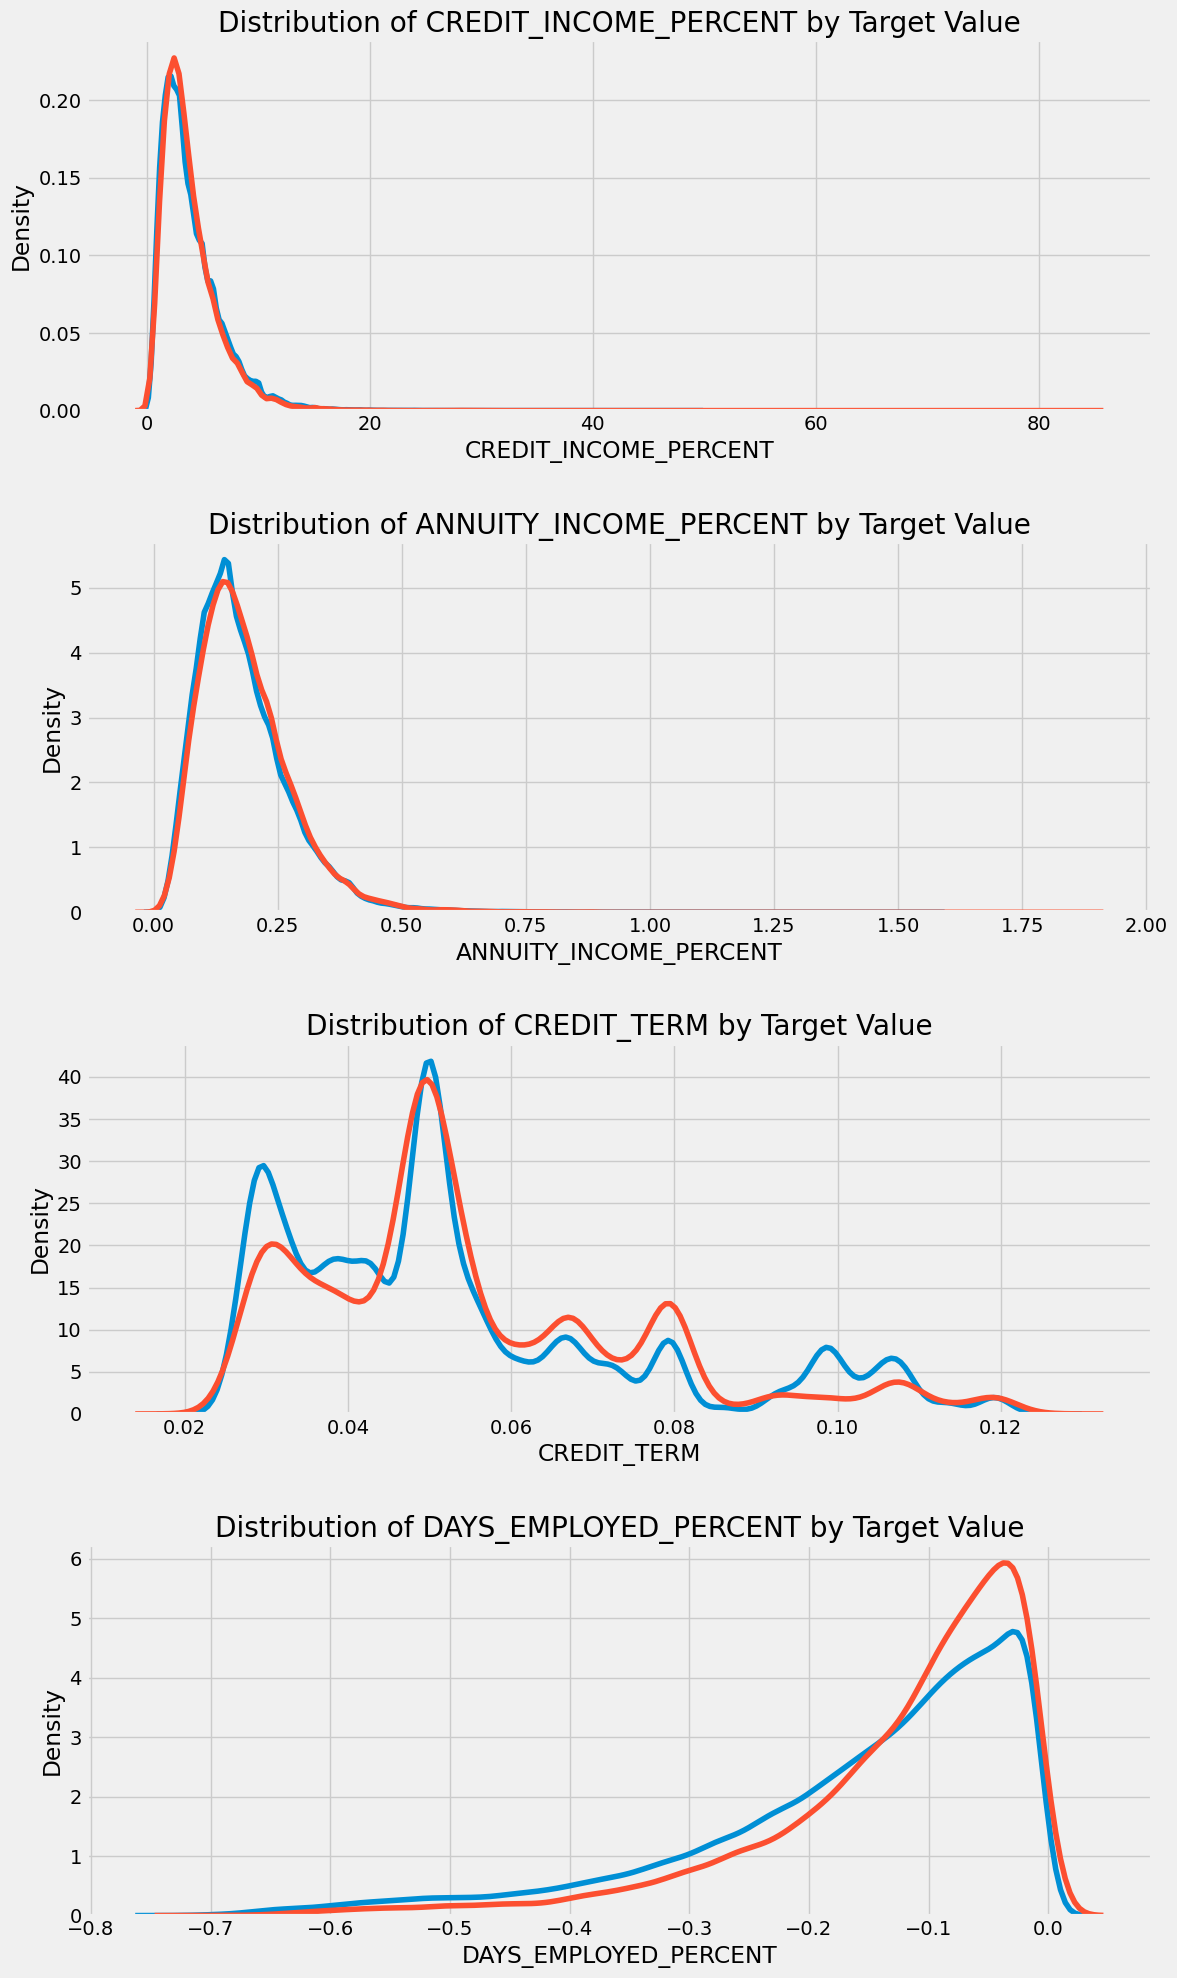

In [152]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(data.loc[data['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(data.loc[data['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [149]:
## Keep numerical columns only 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_data=data.select_dtypes(include=numerics)

In [150]:
#Display correlations with features engineering
print('Most Positive Correlations:\n', num_data.corr()['TARGET'].sort_values().tail(15))
print("--------------------------")
print('Most Negative Correlations:\n', num_data.corr()['TARGET'].sort_values().head(15))

Most Positive Correlations:
 REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED_PERCENT                                0.067955
PREV_BUR_MEAN_DAYS_CREDIT_UPDATE                     0.068927
PREV_APPL_MEAN_CARD_MEAN_AMT_INST_MIN_REGULARITY     0.074204
DAYS_EMPLOYED                                        0.074958
PREV_BUR_MEAN_MONTHS_BALANCE_MEAN                    0.076424
PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_CURRENT        0.080885
PREV_APPL_MEAN_CARD_MEAN_AMT_RECEIVABLE_PRINCIPAL    0.085491
PREV_APPL_MEAN_CARD_MEAN_AMT_RECIVABLE               0.085963
PREV_APPL_MEAN_CARD_MEAN_AMT_TOTAL_RECEIVABLE        0.085967
PREV_APPL_MEAN_CARD_MEAN_AMT_BALANCE                 0.086693
PREV_BUR_MEAN_DAYS_CREDIT                            0.089729
PREV_APPL_MEAN_CARD_MEAN_CNT_DRAWINGS_ATM_CURRENT    0.102917
TARGET                                               1.000000
Name: TARGET, dtype: float64
------------

Les corrélations explicitées précédemment n'ont pas évoluées suite à l'extraction des 7 features.

In [153]:
#Sauvegarde fichier apres featured engineering
data.to_csv('merged_data_feat_eng.csv')

# PARTIE 4 : Preprocessing des données 

## 4.1. Splitting en train/test

In [225]:
df=pd.read_csv(r"C:\Users\kherm\Documents\Openclassrooms\projet 7\merged_data_feat_eng.csv")

In [226]:
data=df.drop(columns='Unnamed: 0')
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002     1.0         Cash loans           M            N   
1      100003     0.0         Cash loans           F            N   
2      100004     0.0    Revolving loans           M            Y   
3      100006     0.0         Cash loans           F            N   
4      100007     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_VERSION  \
0  ...                                        1.052632   
1  ...                                        1.047619   
2  ...                                        1.333333   
3  ...                                        1.400000   
4  ...                                        1.129412   

  PREV_APPL_MEAN_POS_MEAN_NUM_INSTALMENT_NUMBER  \
0                                     10.000000   
1                                      4.666667   
2                                      2.000000   
3                                      3.166667   
4                                      6.843956   

  PREV_APPL_MEAN_POS_MEAN_DAYS_INSTALMENT  \
0                             -295.000000   
1                            -1164.333333   
2                             -754.000000   
3                             -260.666667   
4                            -1087.881319   

  PREV_APPL_MEAN_POS_MEAN_DAYS_ENTRY_PAYMENT  \
0                                -315.421053   
1                               -1171.781746   
2                                -761.666667   
3                                -285.966667   
4                               -1090.768539   

  PREV_APPL_MEAN_POS_MEAN_AMT_INSTALMENT PREV_APPL_MEAN_POS_MEAN_AMT_PAYMENT  \
0                           11559.247105                        11559.247105   
1                           78558.479286                        78558.479286   
2                            7096.155000                         7096.155000   
3                          241944.225000                       241944.225000   
4                           12122.995738                        11671.540210   

   CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  CREDIT_TERM  \
0               2.007889                0.121978     0.060749   
1               4.790750                0.132217     0.027598   
2               2.000000                0.100000     0.050000   
3               2.316167                0.219900     0.094941   
4               4.222222                0.179963     0.042623   

   DAYS_EMPLOYED_PERCENT  
0              -0.067329  
1              -0.070862  
2              -0.011814  
3              -0.159905  
4              -0.152418  

[5 rows x 193 columns]

In [227]:
data.shape

(356255, 193)

In [228]:
data_train = data[data['SK_ID_CURR'].isin(app_train.SK_ID_CURR)]
data_test = data[data['SK_ID_CURR'].isin(app_test.SK_ID_CURR)]

data_test = data_test.drop('TARGET', axis=1)

In [229]:
data_train.set_index('SK_ID_CURR', inplace=True)
data_test.set_index('SK_ID_CURR', inplace=True)

In [230]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307511, 192)
Testing Features shape with categorical columns:  (48744, 191)


## 4.2. Encodage des features catégorielles 

### Label Encoding 

In [231]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
count = 0

# Iterate through the columns
for col in data_train:
    # If 2 or fewer unique categories
    if data_train.loc[:,col].dtype == 'object' and len(list(data_train.loc[:,col].unique())) <= 2:
        # Train on the training data
        le.fit(data_train.loc[:,col])
        # Transform both training and testing data
        data_train.loc[:,col] = le.transform(data_train.loc[:,col])
        data_test.loc[:,col] = le.transform(data_test.loc[:,col])

        count += 1
            
print('%d columns were label encoded.' % count)

3 columns were label encoded.


In [232]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307511, 192)
Testing Features shape with categorical columns:  (48744, 191)


### Get_dummies 

In [233]:
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

In [234]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307511, 316)
Testing Features shape with categorical columns:  (48744, 312)


In [235]:
TARGET = data_train.TARGET #save our TARGET variable
data_train.drop('TARGET', axis=1, inplace=True) #remove TARGET from train

#Align the datasets
data_train, data_test = data_train.align(data_test, join='inner', axis=1)

In [236]:
print(data_train.shape)
print(data_test.shape)

(307511, 312)
(48744, 312)


In [237]:
#Copy before imputation of missing values
train = data_train.copy()
test = data_test.copy()
train.shape, test.shape

((307511, 312), (48744, 312))

## 4.3. Imputation des valeurs manquantes 

On remplacera ici les valeurs manquantes (NaN) par la médianne ou la moyenne. 

In [238]:
from sklearn.impute import SimpleImputer
print('Missing values in train data: ', sum(data_train.isnull().sum()))
print('Missing values in test data: ', sum(data_test.isnull().sum()))

Missing values in train data:  15543705
Missing values in test data:  2277621


In [239]:
imputer = SimpleImputer(strategy='median')
data_train.iloc[:,:] = imputer.fit_transform(data_train)

In [240]:
imputer = SimpleImputer(strategy='median')
data_test.iloc[:,:] = imputer.fit_transform(data_test)

In [242]:
#Check Imputation step
sum(data_train.isnull().sum())

0

In [243]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307511, 312)
Testing Features shape with categorical columns:  (48744, 312)


## 4.4. Standardisation des données 

In [244]:
from sklearn.preprocessing import MinMaxScaler

#Fit scaler to our training data
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(data_train)
scaled_train = scaler.transform(data_train)

In [245]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(data_test)
scaled_test = scaler.transform(data_test)

In [246]:
#In order to keep our column names we include scaled_values to our train/test dataframes like this
data_train = pd.DataFrame(scaled_train, index=data_train.index, columns=data_train.columns)
data_test = pd.DataFrame(scaled_test, index=data_test.index, columns=data_test.columns)

In [247]:
print('Training Features shape with categorical columns: ', data_train.shape)
print('Testing Features shape with categorical columns: ', data_test.shape)

Training Features shape with categorical columns:  (307511, 312)
Testing Features shape with categorical columns:  (48744, 312)


In [218]:
#Sauvegarde des fichiers train et test sans valeurs manquantes 
data_train.to_csv('data_train_sans_valeurs_manquantes.csv',index=True)

In [219]:
data_test.to_csv('data_test_sans_valeurs_manquantes.csv',index=True)

In [220]:
#saving TARGET
TARGET.to_csv('TARGET.csv', index=True)

In [249]:
 #save training data
compression_opts = dict(method='zip', archive_name='data_train.csv')
data_train.to_csv('data_train_sans_valeurs_manquantes.zip', index=True, compression=compression_opts)

## 5. Préparation des données avec valeurs manquantes 

L'idée de pouvoir optimiser les data avant imputation des valeurs manquantes de manière à pouvoir également modéliser, puis, si nécessaire, comparer les prédictions via LightGBM qui tolère les NaN.

In [221]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(train)
scaled_train = scaler.transform(train)

In [222]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(test)
scaled_test = scaler.transform(test)

In [223]:
train = pd.DataFrame(scaled_train, index=train.index, columns=train.columns)
test = pd.DataFrame(scaled_test, index=test.index, columns=test.columns)

In [224]:
# Saving traning data and testing data with missing values 
train.to_csv('data_train_avec_valeurs_manquantes.csv',index=True)
test.to_csv('data_test_avec_valeurs_manquantes.csv',index=True)